---
title: "Artist Classification"
subtitle: "DSAN 5300 Final Project"
authors: ["Jorge Bris Moreno", "William McGloin", "Kangheng Liu", "Isfar Baset"]
date: last-modified
date-format: long
format:
  html:
    self-contained: true
    toc: true
    code-overflow: wrap
    code-fold: true
---

# Artists

In [5]:
# import relevant libraries
import numpy as np
import pandas as pd

# load in the data
artists = pd.read_csv('../data/clean_data/artists.csv')

# what does that data look like? 
artists.head(20)

artist_name               artist_id  danceability    energy  \
0               Green Day  7oPftvlwr6VrsViSDV7fJY      0.435219  0.895942   
1       Dusty Springfield  5zaXYwewAXedKNCff45U5l      0.485341  0.498333   
2                  Hozier  2FXC3k01G6Gw61bmprjgqS      0.448021  0.516437   
3         Ms. Lauryn Hill  2Mu5NfyYm8n5iTomuKAEHl      0.652385  0.493627   
4                 Incubus  3YcBF2ttyueytpXtEzn1Za      0.508414  0.786576   
5                 Farruko  329e4yvIujISKGKz1BZZbO      0.695963  0.745696   
6   Red Hot Chili Peppers  0L8ExT028jH3ddEcZwqJJ5      0.530749  0.787411   
7              Kali Uchis  1U1el3k54VvEUzo3ybLPlM      0.636603  0.555097   
8     Swedish House Mafia  1h6Cn3P4NGzXbaXidqURXs      0.585440  0.657280   
9             Dean Martin  49e4v89VmlDcFCMyDv9wQ9      0.495437  0.428639   
10               Maroon 5  04gDigrS5kc9YWfZHwBETP      0.660173  0.700500   
11            Major Lazer  738wLrAtLtCtFOLvQBXOXp      0.709741  0.778216   
12           Travis Scott  0Y5tJX1MQlPlqiwlOH1tJY      0.660518  0.638747   
13                    SZA  7tYKF4w9nC0nq9CsPZTHyP      0.625059  0.540926   
14          Missy Elliott  2wIVse2owClT7go1WT98tk      0.773181  0.593663   
15        The Temptations  3RwQ26hR2tJtA8F9p2n7jG      0.603457  0.564501   
16             Dan + Shay  7z5WFjZAIYejWy0NI5lv4T      0.577841  0.588899   
17         Arctic Monkeys  7Ln80lUS6He07XvHI8qqHH      0.490563  0.722612   
18           Rich The Kid  1pPmIToKXyGdsCF6LmqLmI      0.786425  0.588230   
19               AFROJACK  4D75GcNG95ebPtNvoNVXhz      0.647200  0.830109   

     loudness  speechiness  acousticness  instrumentalness  liveness  \
0   -4.404705     0.071970      0.029052      2.420668e-02  0.210100   
1  -10.186623     0.043030      0.518770      1.524729e-02  0.222696   
2   -7.487792     0.046327      0.384334      4.871918e-02  0.136029   
3  -12.291385     0.302931      0.270838      4.171400e-04  0.258950   
4   -6.192253     0.057951      0.080398      7.619580e-02  0.181052   
5   -5.090474     0.100282      0.214355      5.877183e-04  0.217191   
6   -5.798831     0.067306      0.068541      5.678086e-02  0.170656   
7   -7.841090     0.067583      0.286546      2.188057e-02  0.191645   
8   -7.711320     0.090740      0.082635      3.906170e-01  0.215492   
9  -10.407168     0.039445      0.689061      3.668141e-03  0.200671   
10  -5.487673     0.051555      0.133525      6.148140e-04  0.158783   
11  -5.606037     0.118690      0.066500      1.786652e-01  0.233795   
12  -5.278169     0.099770      0.150939      1.125488e-02  0.215941   
13  -8.036574     0.146347      0.368444      2.337959e-02  0.173090   
14  -8.558735     0.270894      0.244293      2.996403e-02  0.199512   
15 -10.643354     0.059145      0.357571      1.158680e-02  0.187108   
16  -7.525420     0.184574      0.328117      9.933333e-07  0.202717   
17  -6.579075     0.057127      0.145652      5.004798e-02  0.179565   
18  -6.475057     0.282994      0.108747      1.920092e-05  0.150166   
19  -5.405382     0.076269      0.087777      2.316603e-01  0.191556   

     valence       tempo    duration_ms  key_mode   genre1 genre2 genre3  
0   0.658430  140.041634  189080.946429   D major     rock    NaN    NaN  
1   0.565521  116.199674  195254.239130   D major     jazz    NaN    NaN  
2   0.339523  116.836062  241630.729167   G major     rock    NaN    NaN  
3   0.610846  102.295308  281465.692308  C# major     soul    NaN    NaN  
4   0.432140  134.341747  245848.595960   A major     funk    NaN    NaN  
5   0.597800  123.408267  223879.296296   B minor    latin    NaN    NaN  
6   0.500953  120.363904  259293.369863   C major     funk   rock    NaN  
7   0.473921  117.950526  180635.435897  F# minor      pop    NaN    NaN  
8   0.201592  124.436000  269980.920000   D major      edm    NaN    NaN  
9   0.532756  117.147185  162275.126050  D# major     jazz    NaN    NaN  
10  0.543491  120.010143  213872.785714   E minor      pop

In [6]:
# display rows where genre1 = NaN
artists[artists['genre1'].isnull()]

artist_name               artist_id  danceability    energy  loudness  \
193    Roger Miller  1RP2UpEaRzkF0Id3JigqD8      0.521208  0.431797 -12.92274   
196  The Beach Boys  3oDbviiivRWhXwIE8hxkVV      0.498619  0.445967 -12.14511   

     speechiness  acousticness  instrumentalness  liveness   valence  \
193     0.060275      0.736829          0.130657  0.170462  0.595644   
196     0.083242      0.381031          0.128259  0.184383  0.550309   

          tempo    duration_ms key_mode genre1 genre2 genre3  
193  113.374175  161172.032468  D major    NaN    NaN    NaN  
196  120.514409  153459.132992  C major    NaN    NaN    NaN

In [7]:
# delete Roger Miller
artists = artists.drop(artists[artists['artist_name'] == 'Roger Miller'].index)

# set genre1 for 'The Beach Boys' to 'rock'
artists.loc[artists['artist_name'] == 'The Beach Boys', 'genre1'] = 'rock'

# look at rows where artist_name == The Beach Boys
artists[artists['artist_name'] == 'The Beach Boys']

artist_name               artist_id  danceability    energy  loudness  \
196  The Beach Boys  3oDbviiivRWhXwIE8hxkVV      0.498619  0.445967 -12.14511   

     speechiness  acousticness  instrumentalness  liveness   valence  \
196     0.083242      0.381031          0.128259  0.184383  0.550309   

          tempo    duration_ms key_mode genre1 genre2 genre3  
196  120.514409  153459.132992  C major   rock    NaN    NaN

In [8]:
artists.shape

(396, 16)

## Initial attempt to create primary genre

In [9]:
# show all rows where genre2 is not NaN
pd.set_option('display.max_rows', None)
artists[artists['genre2'].notnull()]

artist_name               artist_id  danceability  \
6           Red Hot Chili Peppers  0L8ExT028jH3ddEcZwqJJ5      0.530749   
12                   Travis Scott  0Y5tJX1MQlPlqiwlOH1tJY      0.660518   
13                            SZA  7tYKF4w9nC0nq9CsPZTHyP      0.625059   
25                        Shakira  0EmeFodog0BfCgMzAIvKQp      0.705754   
29                    $uicideboy$  1VPmR4DJC1PlOtd0IADAO0      0.744207   
32                Aretha Franklin  7nwUJBm0HE4ZxD3f5cy5ok      0.512930   
33                Louis Armstrong  19eLuQmk9aCobbVDHc6eek      0.558063   
35                          Ozuna  1i8SpTcr7yvPOmcqrbnVXY      0.756770   
39                       Lil Peep  2kCcBybjl3SAtIcwdWpUe3      0.595200   
40                 Rauw Alejandro  1mcTU81TzQhprhouKaTkpq      0.742934   
48                    Ray Charles  1eYhYunlNJlDoQhtYBvPsi      0.502172   
49                   Lil Uzi Vert  4O15NlyKLIASxsJ0PrXPfz      0.742184   
51                      Lil Wayne  55Aa2cqylxrFIXC767Z865      0.686506   
62                          Drake  3TVXtAsR1Inumwj472S9r4      0.652035   
66                 Bootsy Collins  5K0rbdBrs2tNXe5LeWMATT      0.635615   
75                     Young Thug  50co4Is1HCEo8bhOyUWKpn      0.749603   
78                          USHER  23zg3TcAtWQy7J6upgbUnj      0.671815   
81                     Jelly Roll  19k8AgwwTSxeaxkOuCQEJs      0.651404   
87                     Tory Lanez  2jku7tDXc6XoB6MO2hFuqg      0.602319   
93                       Al Green  3dkbV4qihUeMsqN4vBGg93      0.692093   
105                     Sam Cooke  6hnWRPzGGKiapVX1UCdEAC      0.477654   
107            Earth, Wind & Fire  4QQgXkCYTt3BlENzhyNETg      0.646006   
109                 Playboi Carti  699OTQXzgjhIYAHMy9RyPD      0.764839   
124                  Jason Aldean  3FfvYsEGaIb52QPXhg4DcH      0.537811   
132                      Kid Cudi  0fA0VVWsXO9YnASrzqfmYu      0.648702   
140                  Metro Boomin  0iEtIxbK0KxaSlF7G42ZOp      0.730732   
143                  Otis Redding  60df5JBRRPcnSpsIMxxwQm      0.630965   
144                  XXXTENTACION  15UsOTVnJzReFVN1VCnxy4      0.682144   
145  Creedence Clearwater Revival  3IYUhFvPQItj6xySrBmZkd      0.626183   
146                  Bill Withers  1ThoqLcyIYvZn7iWbj8fsj      0.667065   
147                 Ty Dolla $ign  7c0XG5cIJTrrAgEC3ULPiq      0.674025   
156                        Offset  4DdkRBBYG6Yk9Ka8tdJ9BW      0.800915   
157                   Nicki Minaj  0hCNtLu0JehylgoiP8L4Gh      0.709129   
159                   Jack Harlow  2LIk90788K0zvyj2JJVwkJ      0.777438   
163                     Key Glock  0RESbWvOMyua0yuyVrztJ5      0.883167   
166                        Eminem  7dGJo4pcD2V6oG8kP0tJRR      0.736387   
171                   Post Malone  246dkjvS1zLTtiykXe5h60      0.584524   
172                         JAY-Z  3nFkdlSjzX9mRTtwJOzDYB      0.682148   
178               Ella Fitzgerald  5V0MlUE1Bft0mbLlND7FJz      0.478995   
181                     21 Savage  1URnnhqYAYcrqrcwql10ft      0.777067   
186                 Bryson Tiller  2EMAnMvWE2eb56ToJVfCWs      0.607338   
206                       J. Cole  6l3HvQ5sa6mXTsMTB19rO5      0.668279   
207                          Korn  3RNrq3jvMZxD9ZyoOZbQOD      0.489990   
210                   Kodak Black  46SHBwWsqBkxI7EeeBEQG7      0.737292   
213                   Linkin Park  6XyY86QOPPrYVGvF9ch6wz      0.519467   
218                       Cardi B  4kYSro6naA4h99UJvo89HB      0.766306   
219                  David Guetta  1Cs0zKBU1kc0i8ypK3B9ai      0.649500   
230            Tyler, The Creator  4V8LLVI7PbaPR0K2TGSxFF      0.526137   
234                         Gunna  2hlmm7s2ICUX0LVIhVFlZQ      0.797117   
246                     Jon Pardi  4MoAOfV4ROWofLG3a3hhBN      0.577068   
248          Florida Georgia Line  3b8QkneNDz4JHKKKlLgYZg      0.517740   
251                    Marshmello  64KEffDW9EtZ1y2vBYgq8T      0.648673   
255             The Neighbourhood  77SW9BnxLY8r

In [10]:
# all artists that have numerous genres
artists1 = artists[artists['genre2'].notnull()]

# convert all pop to NaN in genre1, genre2, and genre3
artists1.loc[artists1['genre1'] == 'pop', 'genre1'] = np.nan
artists1.loc[artists1['genre2'] == 'pop', 'genre2'] = np.nan
artists1.loc[artists1['genre3'] == 'pop', 'genre3'] = np.nan

# if genre1 = NaN, set genre1 to genre2
artists1.loc[artists1['genre1'].isnull(), 'genre1'] = artists1['genre2']

# if genre2 = NaN, set genre2 to genre3
artists1.loc[artists1['genre2'].isnull(), 'genre2'] = artists1['genre3']

# if genre3 = genre2, set genre3 to NaN
artists1.loc[artists1['genre3'] == artists1['genre2'], 'genre3'] = np.nan

# if genre2 = genre1, set genre2 to NaN
artists1.loc[artists1['genre2'] == artists1['genre1'], 'genre2'] = np.nan

# new list of all artists that have numerous genres
artists2 = artists1[artists1['genre2'].notnull()]

print("Initial number of artists with multiple genres: ", len(artists1), "\nNumber of artists with multiple genres after removing pop: ", len(artists2))

Initial number of artists with multiple genres:  76 
Number of artists with multiple genres after removing pop:  61


In [11]:
artists2

artist_name               artist_id  danceability  \
6           Red Hot Chili Peppers  0L8ExT028jH3ddEcZwqJJ5      0.530749   
12                   Travis Scott  0Y5tJX1MQlPlqiwlOH1tJY      0.660518   
29                    $uicideboy$  1VPmR4DJC1PlOtd0IADAO0      0.744207   
32                Aretha Franklin  7nwUJBm0HE4ZxD3f5cy5ok      0.512930   
33                Louis Armstrong  19eLuQmk9aCobbVDHc6eek      0.558063   
39                       Lil Peep  2kCcBybjl3SAtIcwdWpUe3      0.595200   
48                    Ray Charles  1eYhYunlNJlDoQhtYBvPsi      0.502172   
49                   Lil Uzi Vert  4O15NlyKLIASxsJ0PrXPfz      0.742184   
51                      Lil Wayne  55Aa2cqylxrFIXC767Z865      0.686506   
62                          Drake  3TVXtAsR1Inumwj472S9r4      0.652035   
66                 Bootsy Collins  5K0rbdBrs2tNXe5LeWMATT      0.635615   
75                     Young Thug  50co4Is1HCEo8bhOyUWKpn      0.749603   
78                          USHER  23zg3TcAtWQy7J6upgbUnj      0.671815   
81                     Jelly Roll  19k8AgwwTSxeaxkOuCQEJs      0.651404   
87                     Tory Lanez  2jku7tDXc6XoB6MO2hFuqg      0.602319   
93                       Al Green  3dkbV4qihUeMsqN4vBGg93      0.692093   
105                     Sam Cooke  6hnWRPzGGKiapVX1UCdEAC      0.477654   
107            Earth, Wind & Fire  4QQgXkCYTt3BlENzhyNETg      0.646006   
109                 Playboi Carti  699OTQXzgjhIYAHMy9RyPD      0.764839   
124                  Jason Aldean  3FfvYsEGaIb52QPXhg4DcH      0.537811   
132                      Kid Cudi  0fA0VVWsXO9YnASrzqfmYu      0.648702   
140                  Metro Boomin  0iEtIxbK0KxaSlF7G42ZOp      0.730732   
143                  Otis Redding  60df5JBRRPcnSpsIMxxwQm      0.630965   
144                  XXXTENTACION  15UsOTVnJzReFVN1VCnxy4      0.682144   
145  Creedence Clearwater Revival  3IYUhFvPQItj6xySrBmZkd      0.626183   
146                  Bill Withers  1ThoqLcyIYvZn7iWbj8fsj      0.667065   
147                 Ty Dolla $ign  7c0XG5cIJTrrAgEC3ULPiq      0.674025   
157                   Nicki Minaj  0hCNtLu0JehylgoiP8L4Gh      0.709129   
159                   Jack Harlow  2LIk90788K0zvyj2JJVwkJ      0.777438   
163                     Key Glock  0RESbWvOMyua0yuyVrztJ5      0.883167   
166                        Eminem  7dGJo4pcD2V6oG8kP0tJRR      0.736387   
172                         JAY-Z  3nFkdlSjzX9mRTtwJOzDYB      0.682148   
178               Ella Fitzgerald  5V0MlUE1Bft0mbLlND7FJz      0.478995   
181                     21 Savage  1URnnhqYAYcrqrcwql10ft      0.777067   
186                 Bryson Tiller  2EMAnMvWE2eb56ToJVfCWs      0.607338   
206                       J. Cole  6l3HvQ5sa6mXTsMTB19rO5      0.668279   
207                          Korn  3RNrq3jvMZxD9ZyoOZbQOD      0.489990   
210                   Kodak Black  46SHBwWsqBkxI7EeeBEQG7      0.737292   
213                   Linkin Park  6XyY86QOPPrYVGvF9ch6wz      0.519467   
230            Tyler, The Creator  4V8LLVI7PbaPR0K2TGSxFF      0.526137   
234                         Gunna  2hlmm7s2ICUX0LVIhVFlZQ      0.797117   
246                     Jon Pardi  4MoAOfV4ROWofLG3a3hhBN      0.577068   
248          Florida Georgia Line  3b8QkneNDz4JHKKKlLgYZg      0.517740   
256                 Kenny Chesney  3grHWM9bx2E9vwJCdlRv9O      0.605182   
257                Zac Brown Band  6yJCxee7QumYr820xdIsjo      0.595418   
262                      Deftones  6Ghvu1VvMGScGpOUJBAHNH      0.339750   
264                 Nat King Cole  7v4imS0moSyGdXyLgVTIV7      0.408084   
266                      Lil Durk  3hcs9uc56yIGFCSy9leWe7      0.708254   
273                  Thomas Rhett  6x2LnllRG5uGarZMsD4iO8      0.563761   
302                  Daddy Yankee  4VMYDCV2IEDYJArk749S6m      0.725184   
307                    Snoop Dogg  7hJcb9fa4alzcOq3EaNPoG      0.676198   
332                      Lil Baby  5f7VJjfbwm532GiveGC0ZK      0.732783   
337                    Kanye West  5K4W6rqBFWDn

In [12]:
# import all genre data
country = pd.read_csv('../data/raw_data/genre_data/country.csv')
edm = pd.read_csv('../data/raw_data/genre_data/edm.csv')
funk = pd.read_csv('../data/raw_data/genre_data/funk.csv')
hip_hop = pd.read_csv('../data/raw_data/genre_data/hip_hop.csv')
jazz = pd.read_csv('../data/raw_data/genre_data/jazz.csv')
latin = pd.read_csv('../data/raw_data/genre_data/latin.csv')
pop = pd.read_csv('../data/raw_data/genre_data/pop.csv')
rap = pd.read_csv('../data/raw_data/genre_data/rap.csv')
rock = pd.read_csv('../data/raw_data/genre_data/rock.csv')
soul = pd.read_csv('../data/raw_data/genre_data/soul.csv')

# looking at one genre
rap.head()

id          name  popularity  followers.total genre
0  3TVXtAsR1Inumwj472S9r4         Drake          96         86309115   rap
1  1RyvyyTE3xzB2ZywiAwp0i        Future          93         16512389   rap
2  5K4W6rqBFWDnAN6FQUkS6x    Kanye West          94         24762907   rap
3  0Y5tJX1MQlPlqiwlOH1tJY  Travis Scott          94         28481904   rap
4  0iEtIxbK0KxaSlF7G42ZOp  Metro Boomin          93          7622134   rap

In [13]:
# create new column that is 1 for row 1, 2 for row 2, etc.
rap['Rank'] = range(1, len(rap) + 1)

# what does this look like now? 
rap.head()

id          name  popularity  followers.total genre  \
0  3TVXtAsR1Inumwj472S9r4         Drake          96         86309115   rap   
1  1RyvyyTE3xzB2ZywiAwp0i        Future          93         16512389   rap   
2  5K4W6rqBFWDnAN6FQUkS6x    Kanye West          94         24762907   rap   
3  0Y5tJX1MQlPlqiwlOH1tJY  Travis Scott          94         28481904   rap   
4  0iEtIxbK0KxaSlF7G42ZOp  Metro Boomin          93          7622134   rap   

   Rank  
0     1  
1     2  
2     3  
3     4  
4     5

In [14]:
# do this for all other genres
country['Rank'] = range(1, len(country) + 1)
edm['Rank'] = range(1, len(edm) + 1)
funk['Rank'] = range(1, len(funk) + 1)
hip_hop['Rank'] = range(1, len(hip_hop) + 1)
jazz['Rank'] = range(1, len(jazz) + 1)
latin['Rank'] = range(1, len(latin) + 1)
pop['Rank'] = range(1, len(pop) + 1)
rock['Rank'] = range(1, len(rock) + 1)
soul['Rank'] = range(1, len(soul) + 1)

In [15]:
# now each artist has a rank value that shows how important they are to that genre (according to spotify)


# Create a dictionary for each genre with artist names as keys and ranks as values
genre_rank_dicts = {
    'country': dict(zip(country['name'], country['Rank'])),
    'edm': dict(zip(edm['name'], edm['Rank'])),
    'funk': dict(zip(funk['name'], funk['Rank'])),
    'hip_hop': dict(zip(hip_hop['name'], hip_hop['Rank'])),
    'jazz': dict(zip(jazz['name'], jazz['Rank'])),
    'latin': dict(zip(latin['name'], latin['Rank'])),
    'pop': dict(zip(pop['name'], pop['Rank'])),
    'rap': dict(zip(rap['name'], rap['Rank'])),
    'rock': dict(zip(rock['name'], rock['Rank'])),
    'soul': dict(zip(soul['name'], soul['Rank']))
}

# Function to find the primary genre based on the lowest rank
def get_primary_genre(row):
    genres = [row['genre1'], row['genre2'], row['genre3']]
    # Get the ranks of the genres for the artist
    ranks = [genre_rank_dicts.get(genre, {}).get(row['artist_name'], float('inf')) for genre in genres]
    
    # If all ranks are 'inf', it means none of the genres are ranked for this artist
    if all(rank == float('inf') for rank in ranks):
        return 'CHECK'
    
    # Find the minimum rank
    min_rank = min(ranks)
    
    # If we have a unique minimum rank, we return the corresponding genre
    if ranks.count(min_rank) == 1:
        return genres[ranks.index(min_rank)]
    
    # If there's a tie, we return 'CHECK'
    return 'CHECK'

# Apply the function to each row in the artists2 DataFrame
artists2['primary_genre'] = artists2.apply(get_primary_genre, axis=1)

artists2

/var/folders/r6/0cz69w9j0xjc94czkt3w_cdh0000gn/T/ipykernel_23882/3145626996.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artists2['primary_genre'] = artists2.apply(get_primary_genre, axis=1)


artist_name               artist_id  danceability  \
6           Red Hot Chili Peppers  0L8ExT028jH3ddEcZwqJJ5      0.530749   
12                   Travis Scott  0Y5tJX1MQlPlqiwlOH1tJY      0.660518   
29                    $uicideboy$  1VPmR4DJC1PlOtd0IADAO0      0.744207   
32                Aretha Franklin  7nwUJBm0HE4ZxD3f5cy5ok      0.512930   
33                Louis Armstrong  19eLuQmk9aCobbVDHc6eek      0.558063   
39                       Lil Peep  2kCcBybjl3SAtIcwdWpUe3      0.595200   
48                    Ray Charles  1eYhYunlNJlDoQhtYBvPsi      0.502172   
49                   Lil Uzi Vert  4O15NlyKLIASxsJ0PrXPfz      0.742184   
51                      Lil Wayne  55Aa2cqylxrFIXC767Z865      0.686506   
62                          Drake  3TVXtAsR1Inumwj472S9r4      0.652035   
66                 Bootsy Collins  5K0rbdBrs2tNXe5LeWMATT      0.635615   
75                     Young Thug  50co4Is1HCEo8bhOyUWKpn      0.749603   
78                          USHER  23zg3TcAtWQy7J6upgbUnj      0.671815   
81                     Jelly Roll  19k8AgwwTSxeaxkOuCQEJs      0.651404   
87                     Tory Lanez  2jku7tDXc6XoB6MO2hFuqg      0.602319   
93                       Al Green  3dkbV4qihUeMsqN4vBGg93      0.692093   
105                     Sam Cooke  6hnWRPzGGKiapVX1UCdEAC      0.477654   
107            Earth, Wind & Fire  4QQgXkCYTt3BlENzhyNETg      0.646006   
109                 Playboi Carti  699OTQXzgjhIYAHMy9RyPD      0.764839   
124                  Jason Aldean  3FfvYsEGaIb52QPXhg4DcH      0.537811   
132                      Kid Cudi  0fA0VVWsXO9YnASrzqfmYu      0.648702   
140                  Metro Boomin  0iEtIxbK0KxaSlF7G42ZOp      0.730732   
143                  Otis Redding  60df5JBRRPcnSpsIMxxwQm      0.630965   
144                  XXXTENTACION  15UsOTVnJzReFVN1VCnxy4      0.682144   
145  Creedence Clearwater Revival  3IYUhFvPQItj6xySrBmZkd      0.626183   
146                  Bill Withers  1ThoqLcyIYvZn7iWbj8fsj      0.667065   
147                 Ty Dolla $ign  7c0XG5cIJTrrAgEC3ULPiq      0.674025   
157                   Nicki Minaj  0hCNtLu0JehylgoiP8L4Gh      0.709129   
159                   Jack Harlow  2LIk90788K0zvyj2JJVwkJ      0.777438   
163                     Key Glock  0RESbWvOMyua0yuyVrztJ5      0.883167   
166                        Eminem  7dGJo4pcD2V6oG8kP0tJRR      0.736387   
172                         JAY-Z  3nFkdlSjzX9mRTtwJOzDYB      0.682148   
178               Ella Fitzgerald  5V0MlUE1Bft0mbLlND7FJz      0.478995   
181                     21 Savage  1URnnhqYAYcrqrcwql10ft      0.777067   
186                 Bryson Tiller  2EMAnMvWE2eb56ToJVfCWs      0.607338   
206                       J. Cole  6l3HvQ5sa6mXTsMTB19rO5      0.668279   
207                          Korn  3RNrq3jvMZxD9ZyoOZbQOD      0.489990   
210                   Kodak Black  46SHBwWsqBkxI7EeeBEQG7      0.737292   
213                   Linkin Park  6XyY86QOPPrYVGvF9ch6wz      0.519467   
230            Tyler, The Creator  4V8LLVI7PbaPR0K2TGSxFF      0.526137   
234                         Gunna  2hlmm7s2ICUX0LVIhVFlZQ      0.797117   
246                     Jon Pardi  4MoAOfV4ROWofLG3a3hhBN      0.577068   
248          Florida Georgia Line  3b8QkneNDz4JHKKKlLgYZg      0.517740   
256                 Kenny Chesney  3grHWM9bx2E9vwJCdlRv9O      0.605182   
257                Zac Brown Band  6yJCxee7QumYr820xdIsjo      0.595418   
262                      Deftones  6Ghvu1VvMGScGpOUJBAHNH      0.339750   
264                 Nat King Cole  7v4imS0moSyGdXyLgVTIV7      0.408084   
266                      Lil Durk  3hcs9uc56yIGFCSy9leWe7      0.708254   
273                  Thomas Rhett  6x2LnllRG5uGarZMsD4iO8      0.563761   
302                  Daddy Yankee  4VMYDCV2IEDYJArk749S6m      0.725184   
307                    Snoop Dogg  7hJcb9fa4alzcOq3EaNPoG      0.676198   
332                      Lil Baby  5f7VJjfbwm532GiveGC0ZK      0.732783   
337                    Kanye West  5K4W6rqBFWDn

In [16]:
# create column in artists primary_genre that is equal to genre1
artists['primary_genre'] = artists['genre1']

artists.head()

artist_name               artist_id  danceability    energy  \
0          Green Day  7oPftvlwr6VrsViSDV7fJY      0.435219  0.895942   
1  Dusty Springfield  5zaXYwewAXedKNCff45U5l      0.485341  0.498333   
2             Hozier  2FXC3k01G6Gw61bmprjgqS      0.448021  0.516437   
3    Ms. Lauryn Hill  2Mu5NfyYm8n5iTomuKAEHl      0.652385  0.493627   
4            Incubus  3YcBF2ttyueytpXtEzn1Za      0.508414  0.786576   

    loudness  speechiness  acousticness  instrumentalness  liveness   valence  \
0  -4.404705     0.071970      0.029052          0.024207  0.210100  0.658430   
1 -10.186623     0.043030      0.518770          0.015247  0.222696  0.565521   
2  -7.487792     0.046327      0.384334          0.048719  0.136029  0.339523   
3 -12.291385     0.302931      0.270838          0.000417  0.258950  0.610846   
4  -6.192253     0.057951      0.080398          0.076196  0.181052  0.432140   

        tempo    duration_ms  key_mode genre1 genre2 genre3 primary_genre  
0  140.041634  189080.946429   D major   rock    NaN    NaN          rock  
1  116.199674  195254.239130   D major   jazz    NaN    NaN          jazz  
2  116.836062  241630.729167   G major   rock    NaN    NaN          rock  
3  102.295308  281465.692308  C# major   soul    NaN    NaN          soul  
4  134.341747  245848.595960   A major   funk    NaN    NaN          funk

In [17]:
# get list of all artist_id from artists2
artist_ids = artists2['artist_name'].tolist()

# remove all rows from artists where artist_id is in artist_ids
artists = artists[~artists['artist_name'].isin(artist_ids)]

# combine artists and artists2
artists = pd.concat([artists, artists2])

artists.head()

artist_name               artist_id  danceability    energy  \
0          Green Day  7oPftvlwr6VrsViSDV7fJY      0.435219  0.895942   
1  Dusty Springfield  5zaXYwewAXedKNCff45U5l      0.485341  0.498333   
2             Hozier  2FXC3k01G6Gw61bmprjgqS      0.448021  0.516437   
3    Ms. Lauryn Hill  2Mu5NfyYm8n5iTomuKAEHl      0.652385  0.493627   
4            Incubus  3YcBF2ttyueytpXtEzn1Za      0.508414  0.786576   

    loudness  speechiness  acousticness  instrumentalness  liveness   valence  \
0  -4.404705     0.071970      0.029052          0.024207  0.210100  0.658430   
1 -10.186623     0.043030      0.518770          0.015247  0.222696  0.565521   
2  -7.487792     0.046327      0.384334          0.048719  0.136029  0.339523   
3 -12.291385     0.302931      0.270838          0.000417  0.258950  0.610846   
4  -6.192253     0.057951      0.080398          0.076196  0.181052  0.432140   

        tempo    duration_ms  key_mode genre1 genre2 genre3 primary_genre  
0  140.041634  189080.946429   D major   rock    NaN    NaN          rock  
1  116.199674  195254.239130   D major   jazz    NaN    NaN          jazz  
2  116.836062  241630.729167   G major   rock    NaN    NaN          rock  
3  102.295308  281465.692308  C# major   soul    NaN    NaN          soul  
4  134.341747  245848.595960   A major   funk    NaN    NaN          funk

In [18]:
artists.shape

(396, 17)

In [19]:
# temp_df with artist_name and primary_genre
temp_df = artists[['artist_name', 'primary_genre']]

# load in the data
artists = pd.read_csv('../data/clean_data/artists.csv')

# delete Roger Miller
artists = artists.drop(artists[artists['artist_name'] == 'Roger Miller'].index)

# set genre1 for 'The Beach Boys' to 'rock'
artists.loc[artists['artist_name'] == 'The Beach Boys', 'genre1'] = 'rock'

# merge artists and temp_df
artists = pd.merge(artists, temp_df, on='artist_name', how='left')

artists.shape

(396, 17)

In [20]:
# Reset all options to default
pd.reset_option('all')

artists.head()

/var/folders/r6/0cz69w9j0xjc94czkt3w_cdh0000gn/T/ipykernel_23882/1651965467.py:2: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
/var/folders/r6/0cz69w9j0xjc94czkt3w_cdh0000gn/T/ipykernel_23882/1651965467.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


artist_name               artist_id  danceability    energy  \
0          Green Day  7oPftvlwr6VrsViSDV7fJY      0.435219  0.895942   
1  Dusty Springfield  5zaXYwewAXedKNCff45U5l      0.485341  0.498333   
2             Hozier  2FXC3k01G6Gw61bmprjgqS      0.448021  0.516437   
3    Ms. Lauryn Hill  2Mu5NfyYm8n5iTomuKAEHl      0.652385  0.493627   
4            Incubus  3YcBF2ttyueytpXtEzn1Za      0.508414  0.786576   

    loudness  speechiness  acousticness  instrumentalness  liveness   valence  \
0  -4.404705     0.071970      0.029052          0.024207  0.210100  0.658430   
1 -10.186623     0.043030      0.518770          0.015247  0.222696  0.565521   
2  -7.487792     0.046327      0.384334          0.048719  0.136029  0.339523   
3 -12.291385     0.302931      0.270838          0.000417  0.258950  0.610846   
4  -6.192253     0.057951      0.080398          0.076196  0.181052  0.432140   

        tempo    duration_ms  key_mode genre1 genre2 genre3 primary_genre  
0  140.041634  189080.946429   D major   rock    NaN    NaN          rock  
1  116.199674  195254.239130   D major   jazz    NaN    NaN          jazz  
2  116.836062  241630.729167   G major   rock    NaN    NaN          rock  
3  102.295308  281465.692308  C# major   soul    NaN    NaN          soul  
4  134.341747  245848.595960   A major   funk    NaN    NaN          funk

In [21]:
artists['primary_genre'].value_counts()

primary_genre
country    50
jazz       48
latin      48
edm        47
funk       45
rock       42
soul       37
pop        34
rap        32
hip hop    13
Name: count, dtype: int64

## Final Creation of Primary Genres

In [22]:
# new proposed list - country, latin, edm, rock, hip hop, soul - cannibalism between hip-hop & rap, jazz & soul, pop has no characteristics, then funk mixed with a bunch of stuff
#  from here we can just remove those labels from the initial data

In [23]:
# load in the data
artists = pd.read_csv('../data/clean_data/artists.csv')

# delete Roger Miller
artists = artists.drop(artists[artists['artist_name'] == 'Roger Miller'].index)

# set genre1 for 'The Beach Boys' to 'rock'
artists.loc[artists['artist_name'] == 'The Beach Boys', 'genre1'] = 'rock'

# what does that data look like? 
artists.head(20)

artist_name               artist_id  danceability    energy  \
0               Green Day  7oPftvlwr6VrsViSDV7fJY      0.435219  0.895942   
1       Dusty Springfield  5zaXYwewAXedKNCff45U5l      0.485341  0.498333   
2                  Hozier  2FXC3k01G6Gw61bmprjgqS      0.448021  0.516437   
3         Ms. Lauryn Hill  2Mu5NfyYm8n5iTomuKAEHl      0.652385  0.493627   
4                 Incubus  3YcBF2ttyueytpXtEzn1Za      0.508414  0.786576   
5                 Farruko  329e4yvIujISKGKz1BZZbO      0.695963  0.745696   
6   Red Hot Chili Peppers  0L8ExT028jH3ddEcZwqJJ5      0.530749  0.787411   
7              Kali Uchis  1U1el3k54VvEUzo3ybLPlM      0.636603  0.555097   
8     Swedish House Mafia  1h6Cn3P4NGzXbaXidqURXs      0.585440  0.657280   
9             Dean Martin  49e4v89VmlDcFCMyDv9wQ9      0.495437  0.428639   
10               Maroon 5  04gDigrS5kc9YWfZHwBETP      0.660173  0.700500   
11            Major Lazer  738wLrAtLtCtFOLvQBXOXp      0.709741  0.778216   
12           Travis Scott  0Y5tJX1MQlPlqiwlOH1tJY      0.660518  0.638747   
13                    SZA  7tYKF4w9nC0nq9CsPZTHyP      0.625059  0.540926   
14          Missy Elliott  2wIVse2owClT7go1WT98tk      0.773181  0.593663   
15        The Temptations  3RwQ26hR2tJtA8F9p2n7jG      0.603457  0.564501   
16             Dan + Shay  7z5WFjZAIYejWy0NI5lv4T      0.577841  0.588899   
17         Arctic Monkeys  7Ln80lUS6He07XvHI8qqHH      0.490563  0.722612   
18           Rich The Kid  1pPmIToKXyGdsCF6LmqLmI      0.786425  0.588230   
19               AFROJACK  4D75GcNG95ebPtNvoNVXhz      0.647200  0.830109   

     loudness  speechiness  acousticness  instrumentalness  liveness  \
0   -4.404705     0.071970      0.029052      2.420668e-02  0.210100   
1  -10.186623     0.043030      0.518770      1.524729e-02  0.222696   
2   -7.487792     0.046327      0.384334      4.871918e-02  0.136029   
3  -12.291385     0.302931      0.270838      4.171400e-04  0.258950   
4   -6.192253     0.057951      0.080398      7.619580e-02  0.181052   
5   -5.090474     0.100282      0.214355      5.877183e-04  0.217191   
6   -5.798831     0.067306      0.068541      5.678086e-02  0.170656   
7   -7.841090     0.067583      0.286546      2.188057e-02  0.191645   
8   -7.711320     0.090740      0.082635      3.906170e-01  0.215492   
9  -10.407168     0.039445      0.689061      3.668141e-03  0.200671   
10  -5.487673     0.051555      0.133525      6.148140e-04  0.158783   
11  -5.606037     0.118690      0.066500      1.786652e-01  0.233795   
12  -5.278169     0.099770      0.150939      1.125488e-02  0.215941   
13  -8.036574     0.146347      0.368444      2.337959e-02  0.173090   
14  -8.558735     0.270894      0.244293      2.996403e-02  0.199512   
15 -10.643354     0.059145      0.357571      1.158680e-02  0.187108   
16  -7.525420     0.184574      0.328117      9.933333e-07  0.202717   
17  -6.579075     0.057127      0.145652      5.004798e-02  0.179565   
18  -6.475057     0.282994      0.108747      1.920092e-05  0.150166   
19  -5.405382     0.076269      0.087777      2.316603e-01  0.191556   

     valence       tempo    duration_ms  key_mode   genre1 genre2 genre3  
0   0.658430  140.041634  189080.946429   D major     rock    NaN    NaN  
1   0.565521  116.199674  195254.239130   D major     jazz    NaN    NaN  
2   0.339523  116.836062  241630.729167   G major     rock    NaN    NaN  
3   0.610846  102.295308  281465.692308  C# major     soul    NaN    NaN  
4   0.432140  134.341747  245848.595960   A major     funk    NaN    NaN  
5   0.597800  123.408267  223879.296296   B minor    latin    NaN    NaN  
6   0.500953  120.363904  259293.369863   C major     funk   rock    NaN  
7   0.473921  117.950526  180635.435897  F# minor      pop    NaN    NaN  
8   0.201592  124.436000  269980.920000   D major      edm    NaN    NaN  
9   0.532756  117.147185  162275.126050  D# major     jazz    NaN    NaN  
10  0.543491  120.010143  213872.785714   E minor      pop

In [24]:
# number of intiial artists 
total_artists = len(artists)

# we are removing hip hop, jazz, funk, and pop - convert all to NaN in genre1, genre2, and genre3

# pop
artists.loc[artists['genre1'] == 'pop', 'genre1'] = np.nan
artists.loc[artists['genre2'] == 'pop', 'genre2'] = np.nan
artists.loc[artists['genre3'] == 'pop', 'genre3'] = np.nan

# # hip hop
# artists.loc[artists['genre1'] == 'hip hop', 'genre1'] = np.nan
# artists.loc[artists['genre2'] == 'hip hop', 'genre2'] = np.nan
# artists.loc[artists['genre3'] == 'hip hop', 'genre3'] = np.nan

# RAP
artists.loc[artists['genre1'] == 'rap', 'genre1'] = np.nan
artists.loc[artists['genre2'] == 'rap', 'genre2'] = np.nan
artists.loc[artists['genre3'] == 'rap', 'genre3'] = np.nan

# jazz
artists.loc[artists['genre1'] == 'jazz', 'genre1'] = np.nan
artists.loc[artists['genre2'] == 'jazz', 'genre2'] = np.nan
artists.loc[artists['genre3'] == 'jazz', 'genre3'] = np.nan

# funk
artists.loc[artists['genre1'] == 'funk', 'genre1'] = np.nan
artists.loc[artists['genre2'] == 'funk', 'genre2'] = np.nan
artists.loc[artists['genre3'] == 'funk', 'genre3'] = np.nan

# if genre1 = NaN, set genre1 to genre2
artists.loc[artists['genre1'].isnull(), 'genre1'] = artists['genre2']

# if genre2 = NaN, set genre2 to genre3
artists.loc[artists['genre2'].isnull(), 'genre2'] = artists['genre3']

# if genre1 = NaN, set genre1 to genre2 - again to account for if rap is the only genre left (starting at genre3)
artists.loc[artists['genre1'].isnull(), 'genre1'] = artists['genre2']

# if genre3 = genre2, set genre3 to NaN
artists.loc[artists['genre3'] == artists['genre2'], 'genre3'] = np.nan

# if genre2 = genre1, set genre2 to NaN
artists.loc[artists['genre2'] == artists['genre1'], 'genre2'] = np.nan

# delete rows where genre1 is NaN
artists = artists[artists['genre1'].notnull()]

print("Initial number of artists with multiple genres: ", total_artists, "\nNumber of artists with multiple genres after removing pop: ", len(artists))

Initial number of artists with multiple genres:  396 
Number of artists with multiple genres after removing pop:  286


In [25]:
# list of all artists that have numerous genres
artists[artists['genre2'].notnull()]

artist_name               artist_id  danceability  \
81                     Jelly Roll  19k8AgwwTSxeaxkOuCQEJs      0.651404   
124                  Jason Aldean  3FfvYsEGaIb52QPXhg4DcH      0.537811   
145  Creedence Clearwater Revival  3IYUhFvPQItj6xySrBmZkd      0.626183   
210                   Kodak Black  46SHBwWsqBkxI7EeeBEQG7      0.737292   
246                     Jon Pardi  4MoAOfV4ROWofLG3a3hhBN      0.577068   
248          Florida Georgia Line  3b8QkneNDz4JHKKKlLgYZg      0.517740   
256                 Kenny Chesney  3grHWM9bx2E9vwJCdlRv9O      0.605182   
257                Zac Brown Band  6yJCxee7QumYr820xdIsjo      0.595418   
273                  Thomas Rhett  6x2LnllRG5uGarZMsD4iO8      0.563761   
302                  Daddy Yankee  4VMYDCV2IEDYJArk749S6m      0.725184   
356                    Luke Bryan  0BvkDsjIUla7X0k6CSWh1I      0.563546   
367                   Frank Ocean  2h93pZq0e7k5yf4dywlkpM      0.530971   

       energy   loudness  speechiness  acousticness  instrumentalness  \
81   0.686099  -7.158605     0.145536      0.121064          0.000347   
124  0.726670  -5.936897     0.101675      0.194751          0.000078   
145  0.600086 -10.005151     0.041388      0.161986          0.154077   
210  0.604830  -6.841348     0.257427      0.166053          0.000136   
246  0.736784  -4.951432     0.039842      0.111920          0.000008   
248  0.829411  -4.339753     0.043552      0.188076          0.012520   
256  0.591603  -8.069168     0.039491      0.275446          0.002584   
257  0.661230  -6.095824     0.043375      0.221149          0.000902   
273  0.696823  -6.093894     0.038992      0.084593          0.000067   
302  0.793203  -6.051972     0.150212      0.192886          0.040737   
356  0.798346  -4.471762     0.047430      0.141335          0.001608   
367  0.437768 -10.748529     0.165826      0.559103          0.081550   

     liveness   valence       tempo    duration_ms  key_mode   genre1  \
81   0.231000  0.434363  124.123838  212034.149682   B minor  country   
124  0.219803  0.541486  133.956373  195562.859459   G major  country   
145  0.127885  0.712938  123.325290  232287.419355   D major  country   
210  0.162398  0.437120  130.106921  193229.640316  C# major  hip hop   
246  0.203019  0.630419  127.937608  206681.229730   A major  country   
248  0.204684  0.594314  137.450685  194633.821918  F# major  country   
256  0.158511  0.489812  124.162888  232951.757009   G major  country   
257  0.146764  0.552462  130.683451  233176.879121  F# major  country   
273  0.147352  0.597115  115.922487  193232.230088   G major  country   
302  0.259147  0.664498  112.618189  182449.311321   G major  hip hop   
356  0.152798  0.586431  132.708177  213737.169231   G major  country   
367  0.241274  0.420953  110.838206  204846.647059   C major  hip hop   

      genre2 genre3  
81   hip hop    NaN  
124     rock    NaN  
145     rock    NaN  
210    latin    NaN  
246     rock    NaN  
248     rock    NaN  
256     rock    NaN  
257     rock    NaN  
273     rock    NaN  
302    latin    NaN  
356     rock    NaN  
367     soul    NaN

In [26]:
# delete genre3 column as all are now NaN
artists = artists.drop(columns=['genre3'])

# all artists that have numerous genres
multiple_genres = artists[artists['genre2'].notnull()]

# unique values of genre1 and genre2 in multiple_genres
multiple_genres['genre1'].unique(), multiple_genres['genre2'].unique()

(array(['country', 'hip hop'], dtype=object),
 array(['hip hop', 'rock', 'latin', 'soul'], dtype=object))

In [27]:
# so the only duplicates are country, rap, and rock
# import all genre data
country = pd.read_csv('../data/raw_data/genre_data/country.csv')
# rap = pd.read_csv('../data/raw_data/genre_data/rap.csv')
rock = pd.read_csv('../data/raw_data/genre_data/rock.csv')
hip_hop = pd.read_csv('../data/raw_data/genre_data/hip_hop.csv')
latin = pd.read_csv('../data/raw_data/genre_data/latin.csv')
soul = pd.read_csv('../data/raw_data/genre_data/soul.csv')

# create a ranking column to use to find an artist's primary genre
country['Rank'] = range(1, len(country) + 1)
# rap['Rank'] = range(1, len(rap) + 1)
rock['Rank'] = range(1, len(rock) + 1)
hip_hop['Rank'] = range(1, len(hip_hop) + 1)
latin['Rank'] = range(1, len(latin) + 1)
soul['Rank'] = range(1, len(soul) + 1)

# Create a dictionary for each genre with artist names as keys and ranks as values
genre_rank_dicts = {
    'country': dict(zip(country['name'], country['Rank'])),
    # 'rap': dict(zip(rap['name'], rap['Rank'])),
    'rock': dict(zip(rock['name'], rock['Rank'])),
    'hip_hop': dict(zip(hip_hop['name'], hip_hop['Rank'])),
    'latin': dict(zip(latin['name'], latin['Rank'])),
    'soul': dict(zip(soul['name'], soul['Rank']))
}

# Function to find the primary genre based on the lowest rank
def get_primary_genre(row):
    genres = [row['genre1'], row['genre2']]
    # Get the ranks of the genres for the artist
    ranks = [genre_rank_dicts.get(genre, {}).get(row['artist_name'], float('inf')) for genre in genres]
    
    # If all ranks are 'inf', it means none of the genres are ranked for this artist
    if all(rank == float('inf') for rank in ranks):
        return 'CHECK'
    
    # Find the minimum rank
    min_rank = min(ranks)
    
    # If we have a unique minimum rank, we return the corresponding genre
    if ranks.count(min_rank) == 1:
        return genres[ranks.index(min_rank)]
    
    # If there's a tie, we return 'CHECK'
    return 'CHECK'

# Apply the function to each row in the DataFrame
multiple_genres['primary_genre'] = multiple_genres.apply(get_primary_genre, axis=1)

multiple_genres

/var/folders/r6/0cz69w9j0xjc94czkt3w_cdh0000gn/T/ipykernel_23882/2070387480.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_genres['primary_genre'] = multiple_genres.apply(get_primary_genre, axis=1)


artist_name               artist_id  danceability  \
81                     Jelly Roll  19k8AgwwTSxeaxkOuCQEJs      0.651404   
124                  Jason Aldean  3FfvYsEGaIb52QPXhg4DcH      0.537811   
145  Creedence Clearwater Revival  3IYUhFvPQItj6xySrBmZkd      0.626183   
210                   Kodak Black  46SHBwWsqBkxI7EeeBEQG7      0.737292   
246                     Jon Pardi  4MoAOfV4ROWofLG3a3hhBN      0.577068   
248          Florida Georgia Line  3b8QkneNDz4JHKKKlLgYZg      0.517740   
256                 Kenny Chesney  3grHWM9bx2E9vwJCdlRv9O      0.605182   
257                Zac Brown Band  6yJCxee7QumYr820xdIsjo      0.595418   
273                  Thomas Rhett  6x2LnllRG5uGarZMsD4iO8      0.563761   
302                  Daddy Yankee  4VMYDCV2IEDYJArk749S6m      0.725184   
356                    Luke Bryan  0BvkDsjIUla7X0k6CSWh1I      0.563546   
367                   Frank Ocean  2h93pZq0e7k5yf4dywlkpM      0.530971   

       energy   loudness  speechiness  acousticness  instrumentalness  \
81   0.686099  -7.158605     0.145536      0.121064          0.000347   
124  0.726670  -5.936897     0.101675      0.194751          0.000078   
145  0.600086 -10.005151     0.041388      0.161986          0.154077   
210  0.604830  -6.841348     0.257427      0.166053          0.000136   
246  0.736784  -4.951432     0.039842      0.111920          0.000008   
248  0.829411  -4.339753     0.043552      0.188076          0.012520   
256  0.591603  -8.069168     0.039491      0.275446          0.002584   
257  0.661230  -6.095824     0.043375      0.221149          0.000902   
273  0.696823  -6.093894     0.038992      0.084593          0.000067   
302  0.793203  -6.051972     0.150212      0.192886          0.040737   
356  0.798346  -4.471762     0.047430      0.141335          0.001608   
367  0.437768 -10.748529     0.165826      0.559103          0.081550   

     liveness   valence       tempo    duration_ms  key_mode   genre1  \
81   0.231000  0.434363  124.123838  212034.149682   B minor  country   
124  0.219803  0.541486  133.956373  195562.859459   G major  country   
145  0.127885  0.712938  123.325290  232287.419355   D major  country   
210  0.162398  0.437120  130.106921  193229.640316  C# major  hip hop   
246  0.203019  0.630419  127.937608  206681.229730   A major  country   
248  0.204684  0.594314  137.450685  194633.821918  F# major  country   
256  0.158511  0.489812  124.162888  232951.757009   G major  country   
257  0.146764  0.552462  130.683451  233176.879121  F# major  country   
273  0.147352  0.597115  115.922487  193232.230088   G major  country   
302  0.259147  0.664498  112.618189  182449.311321   G major  hip hop   
356  0.152798  0.586431  132.708177  213737.169231   G major  country   
367  0.241274  0.420953  110.838206  204846.647059   C major  hip hop   

      genre2 primary_genre  
81   hip hop       country  
124     rock       country  
145     rock       country  
210    latin         latin  
246     rock       country  
248     rock       country  
256     rock       country  
257     rock       country  
273     rock       country  
302    latin         latin  
356     rock       country  
367     soul          soul

In [28]:
# create column in artists primary_genre that is equal to genre1
artists['primary_genre'] = artists['genre1']

artists.head()

artist_name               artist_id  danceability    energy  \
0              Green Day  7oPftvlwr6VrsViSDV7fJY      0.435219  0.895942   
2                 Hozier  2FXC3k01G6Gw61bmprjgqS      0.448021  0.516437   
3        Ms. Lauryn Hill  2Mu5NfyYm8n5iTomuKAEHl      0.652385  0.493627   
5                Farruko  329e4yvIujISKGKz1BZZbO      0.695963  0.745696   
6  Red Hot Chili Peppers  0L8ExT028jH3ddEcZwqJJ5      0.530749  0.787411   

    loudness  speechiness  acousticness  instrumentalness  liveness   valence  \
0  -4.404705     0.071970      0.029052          0.024207  0.210100  0.658430   
2  -7.487792     0.046327      0.384334          0.048719  0.136029  0.339523   
3 -12.291385     0.302931      0.270838          0.000417  0.258950  0.610846   
5  -5.090474     0.100282      0.214355          0.000588  0.217191  0.597800   
6  -5.798831     0.067306      0.068541          0.056781  0.170656  0.500953   

        tempo    duration_ms  key_mode genre1 genre2 primary_genre  
0  140.041634  189080.946429   D major   rock    NaN          rock  
2  116.836062  241630.729167   G major   rock    NaN          rock  
3  102.295308  281465.692308  C# major   soul    NaN          soul  
5  123.408267  223879.296296   B minor  latin    NaN         latin  
6  120.363904  259293.369863   C major   rock    NaN          rock

In [29]:
# get list of all artist_id from multiple_genres
artist_ids = multiple_genres['artist_name'].tolist()

# remove all rows from artists where artist_id is in artist_ids
artists = artists[~artists['artist_name'].isin(artist_ids)]

# combine artists and artists2
artists = pd.concat([artists, multiple_genres])

# remove genre1 and genre2 colummns from artists
artists = artists.drop(columns=['genre1', 'genre2'])

# rename primary_genre to genre
artists = artists.rename(columns={'primary_genre': 'genre'})

artists.head()

artist_name               artist_id  danceability    energy  \
0              Green Day  7oPftvlwr6VrsViSDV7fJY      0.435219  0.895942   
2                 Hozier  2FXC3k01G6Gw61bmprjgqS      0.448021  0.516437   
3        Ms. Lauryn Hill  2Mu5NfyYm8n5iTomuKAEHl      0.652385  0.493627   
5                Farruko  329e4yvIujISKGKz1BZZbO      0.695963  0.745696   
6  Red Hot Chili Peppers  0L8ExT028jH3ddEcZwqJJ5      0.530749  0.787411   

    loudness  speechiness  acousticness  instrumentalness  liveness   valence  \
0  -4.404705     0.071970      0.029052          0.024207  0.210100  0.658430   
2  -7.487792     0.046327      0.384334          0.048719  0.136029  0.339523   
3 -12.291385     0.302931      0.270838          0.000417  0.258950  0.610846   
5  -5.090474     0.100282      0.214355          0.000588  0.217191  0.597800   
6  -5.798831     0.067306      0.068541          0.056781  0.170656  0.500953   

        tempo    duration_ms  key_mode  genre  
0  140.041634  189080.946429   D major   rock  
2  116.836062  241630.729167   G major   rock  
3  102.295308  281465.692308  C# major   soul  
5  123.408267  223879.296296   B minor  latin  
6  120.363904  259293.369863   C major   rock

In [30]:
# value counts of genres
artists['genre'].value_counts()

genre
country    50
soul       49
latin      48
edm        47
rock       46
hip hop    46
Name: count, dtype: int64

this data is rather balanced!!!

In [31]:
len(artists)

286

## Classification Data Prep

In [32]:
# split 'key_mode' column
artists['key'] = artists['key_mode'].apply(lambda x: x.split(' ')[0])
artists['mode'] = artists['key_mode'].apply(lambda x: x.split(' ')[1])

# drop key_mode
artists.drop('key_mode', axis=1, inplace=True)

# covert mode into binary
artists['mode'] = artists['mode'].apply(lambda x: 1 if x == 'major' else 0)

# convert key into numerical
key_dict = {'C': 0, 'C#': 1, 'D': 2, 'D#': 3, 'E': 4, 'F': 5, 'F#': 6, 'G': 7, 'G#': 8, 'A': 9, 'A#': 10, 'B': 11}
artists['key'] = artists['key'].apply(lambda x: key_dict[x])

# convert key and mode to factors
artists['key'] = artists['key'].astype('category')
artists['mode'] = artists['mode'].astype('category')

# rename mode to major
artists.rename(columns={'mode': 'major'}, inplace=True)

# what does the data look like now?
artists.head(20)

artist_name               artist_id  danceability    energy  \
0               Green Day  7oPftvlwr6VrsViSDV7fJY      0.435219  0.895942   
2                  Hozier  2FXC3k01G6Gw61bmprjgqS      0.448021  0.516437   
3         Ms. Lauryn Hill  2Mu5NfyYm8n5iTomuKAEHl      0.652385  0.493627   
5                 Farruko  329e4yvIujISKGKz1BZZbO      0.695963  0.745696   
6   Red Hot Chili Peppers  0L8ExT028jH3ddEcZwqJJ5      0.530749  0.787411   
8     Swedish House Mafia  1h6Cn3P4NGzXbaXidqURXs      0.585440  0.657280   
11            Major Lazer  738wLrAtLtCtFOLvQBXOXp      0.709741  0.778216   
12           Travis Scott  0Y5tJX1MQlPlqiwlOH1tJY      0.660518  0.638747   
14          Missy Elliott  2wIVse2owClT7go1WT98tk      0.773181  0.593663   
15        The Temptations  3RwQ26hR2tJtA8F9p2n7jG      0.603457  0.564501   
16             Dan + Shay  7z5WFjZAIYejWy0NI5lv4T      0.577841  0.588899   
17         Arctic Monkeys  7Ln80lUS6He07XvHI8qqHH      0.490563  0.722612   
18           Rich The Kid  1pPmIToKXyGdsCF6LmqLmI      0.786425  0.588230   
19               AFROJACK  4D75GcNG95ebPtNvoNVXhz      0.647200  0.830109   
20      Twenty One Pilots  3YQKmKGau1PzlVlkL1iodx      0.644831  0.633309   
22     Treaty Oak Revival  3444S3C4U9Ts86BnCtSPRV      0.457905  0.835200   
23            Johnny Cash  6kACVPfCOnqzgfEF5ryl0x      0.586413  0.390263   
24          Lainey Wilson  6tPHARSq45lQ8BSALCfkFC      0.569568  0.694514   
25                Shakira  0EmeFodog0BfCgMzAIvKQp      0.705754  0.677343   
26            Chuck Berry  293zczrfYafIItmnmM3coR      0.610536  0.614968   

     loudness  speechiness  acousticness  instrumentalness  liveness  \
0   -4.404705     0.071970      0.029052      2.420668e-02  0.210100   
2   -7.487792     0.046327      0.384334      4.871918e-02  0.136029   
3  -12.291385     0.302931      0.270838      4.171400e-04  0.258950   
5   -5.090474     0.100282      0.214355      5.877183e-04  0.217191   
6   -5.798831     0.067306      0.068541      5.678086e-02  0.170656   
8   -7.711320     0.090740      0.082635      3.906170e-01  0.215492   
11  -5.606037     0.118690      0.066500      1.786652e-01  0.233795   
12  -5.278169     0.099770      0.150939      1.125488e-02  0.215941   
14  -8.558735     0.270894      0.244293      2.996403e-02  0.199512   
15 -10.643354     0.059145      0.357571      1.158680e-02  0.187108   
16  -7.525420     0.184574      0.328117      9.933333e-07  0.202717   
17  -6.579075     0.057127      0.145652      5.004798e-02  0.179565   
18  -6.475057     0.282994      0.108747      1.920092e-05  0.150166   
19  -5.405382     0.076269      0.087777      2.316603e-01  0.191556   
20  -6.863231     0.060257      0.177143      1.251383e-02  0.164278   
22  -4.782762     0.140505      0.052686      2.638281e-04  0.209186   
23 -12.527416     0.104988      0.718646      2.605349e-02  0.194622   
24  -5.622676     0.040308      0.178682      5.000298e-03  0.176086   
25  -6.272053     0.061410      0.266872      4.479403e-03  0.156847   
26 -10.420100     0.066232      0.578388      1.669428e-01  0.247539   

     valence       tempo    duration_ms    genre key major  
0   0.658430  140.041634  189080.946429     rock   2     1  
2   0.339523  116.836062  241630.729167     rock   7     1  
3   0.610846  102.295308  281465.692308     soul   1     1  
5   0.597800  123.408267  223879.296296    latin  11     0  
6   0.500953  120.363904  259293.369863     rock   0     1  
8   0.201592  124.436000  269980.920000      edm   2     1  
11  0.522911  126.761840  199147.895062      edm   7     1  
12  0.310833  126.254831  227478.325301  hip hop   1     1  
14  0.645072  115.139566  226630.614458     soul   1     1  
15  0.653514  115.004910  250951.654255     soul   0     1  
16  0.577348  125.430116  172348.173913  country  10     1  
17  0.545462  125.283425  208626.250000     rock  11     0  
18  0.459739  122.792299  171455.712644  hip hop   1     1  
19  0.355607  129.077091  250

In [33]:
# find all numerical columns and normalize the numerical columns into a bracket from [0,1]
numerical_columns = artists.select_dtypes(include=[np.number]).columns
artists[numerical_columns] = (artists[numerical_columns] - artists[numerical_columns].min()) / (artists[numerical_columns].max() - artists[numerical_columns].min())

# what does the data look like now?
artists.head(20)

artist_name               artist_id  danceability    energy  \
0               Green Day  7oPftvlwr6VrsViSDV7fJY      0.376262  0.882722   
2                  Hozier  2FXC3k01G6Gw61bmprjgqS      0.394088  0.365539   
3         Ms. Lauryn Hill  2Mu5NfyYm8n5iTomuKAEHl      0.678651  0.334453   
5                 Farruko  329e4yvIujISKGKz1BZZbO      0.739331  0.677969   
6   Red Hot Chili Peppers  0L8ExT028jH3ddEcZwqJJ5      0.509281  0.734817   
8     Swedish House Mafia  1h6Cn3P4NGzXbaXidqURXs      0.585435  0.557477   
11            Major Lazer  738wLrAtLtCtFOLvQBXOXp      0.758516  0.722287   
12           Travis Scott  0Y5tJX1MQlPlqiwlOH1tJY      0.689976  0.532220   
14          Missy Elliott  2wIVse2owClT7go1WT98tk      0.846852  0.470780   
15        The Temptations  3RwQ26hR2tJtA8F9p2n7jG      0.610523  0.431039   
16             Dan + Shay  7z5WFjZAIYejWy0NI5lv4T      0.574853  0.464288   
17         Arctic Monkeys  7Ln80lUS6He07XvHI8qqHH      0.453324  0.646511   
18           Rich The Kid  1pPmIToKXyGdsCF6LmqLmI      0.865294  0.463376   
19               AFROJACK  4D75GcNG95ebPtNvoNVXhz      0.671432  0.793006   
20      Twenty One Pilots  3YQKmKGau1PzlVlkL1iodx      0.668133  0.524810   
22     Treaty Oak Revival  3444S3C4U9Ts86BnCtSPRV      0.407851  0.799943   
23            Johnny Cash  6kACVPfCOnqzgfEF5ryl0x      0.586790  0.193591   
24          Lainey Wilson  6tPHARSq45lQ8BSALCfkFC      0.563334  0.608218   
25                Shakira  0EmeFodog0BfCgMzAIvKQp      0.752965  0.584818   
26            Chuck Berry  293zczrfYafIItmnmM3coR      0.620380  0.499815   

    loudness  speechiness  acousticness  instrumentalness  liveness   valence  \
0   0.910499     0.138540      0.014469          0.033915  0.483746  0.747340   
2   0.672705     0.055849      0.430641          0.068259  0.222202  0.242083   
3   0.302211     0.883335      0.297694          0.000584  0.656232  0.671951   
5   0.857607     0.229841      0.231530          0.000823  0.508783  0.651282   
6   0.802972     0.123502      0.060726          0.079554  0.344467  0.497844   
8   0.655465     0.199070      0.077235          0.547283  0.502783  0.023553   
11  0.817842     0.289201      0.058335          0.250323  0.567411  0.532632   
12  0.843130     0.228189      0.157246          0.015769  0.504368  0.196627   
14  0.590105     0.780024      0.266599          0.041982  0.446358  0.726177   
15  0.429321     0.097184      0.399291          0.016234  0.402560  0.739552   
16  0.669803     0.501662      0.364790          0.000001  0.457676  0.618878   
17  0.742793     0.090678      0.151052          0.070121  0.375926  0.568361   
18  0.750816     0.819045      0.107822          0.000027  0.272117  0.432546   
19  0.833319     0.152405      0.083258          0.324573  0.418267  0.267566   
20  0.720877     0.100769      0.187940          0.017533  0.321949  0.474084   
22  0.881340     0.359550      0.042153          0.000369  0.480516  0.415909   
23  0.284007     0.245016      0.822249          0.036503  0.429093  0.636787   
24  0.816559     0.036439      0.189743          0.007006  0.363643  0.609416   
25  0.766473     0.104487      0.293047          0.006276  0.295710  0.659298   
26  0.446541     0.120037      0.657953          0.233899  0.615941  0.928980   

       tempo  duration_ms    genre key major  
0   0.997135     0.141162     rock   2     1  
2   0.718423     0.293990     rock   7     1  
3   0.543781     0.409841     soul   1     1  
5   0.797359     0.242365    latin  11     0  
6   0.760795     0.345358     rock   0     1  
8   0.809703     0.376440      edm   2     1  
11  0.837637     0.170439      edm   7     1  
12  0.831548     0.252831  hip hop   1     1  
14  0.698048     0.250366     soul   1     1  
15  0.696430     0.321098     soul   0     1  
16  0.821643     0.092498  country  10     1  
17  0.819881     0.198005     rock  11     0  
18  0.789961     0.089903  hip hop   1     1  
19  0.865445     0.320656      edm  

In [34]:
# split the data into training and testing sets, with 80% of the data for training and 20% for testing
from sklearn.model_selection import train_test_split

train, test = train_test_split(artists, test_size=0.2, random_state=37)

# split the data into features and target, target being three columns ['genre1','genre2','genre3']
X_train = train.drop(['artist_name','artist_id','genre'], axis=1)
y_train = train[['genre']]
X_test = test.drop(['artist_name','artist_id','genre'], axis=1)
y_test = test[['genre']]

print("Shape of X_train: ", X_train.shape, "\nShape of X_test: ", X_test.shape, "\nShape of y_train: ", y_train.shape, "\nShape of y_test: ", y_test.shape)

Shape of X_train:  (228, 12) 
Shape of X_test:  (58, 12) 
Shape of y_train:  (228, 1) 
Shape of y_test:  (58, 1)


In [35]:
# value counts of genre in the training data
y_train['genre'].value_counts()

genre
rock       41
edm        39
soul       38
latin      37
country    37
hip hop    36
Name: count, dtype: int64

In [32]:
# value counts of genre in test data
y_test['genre'].value_counts()

genre
country    13
soul       11
latin      11
hip hop    10
edm         8
rock        5
Name: count, dtype: int64

## Logistic Regression using OVR

In [267]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Flatten the target arrays to avoid DataConversionWarnings
y_train_flat = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
y_test_flat = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # Adding the solver here for completeness
    'max_iter': [10000]  # Increase max_iter to avoid convergence warnings
}

# Initialize the Logistic Regression model
log_reg_ovr = LogisticRegression(multi_class='ovr')

# Create GridSearchCV with the logistic regression estimator and the parameter grid
grid_search = GridSearchCV(log_reg_ovr, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train_flat)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test data with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model on the test data
accuracy = accuracy_score(y_test_flat, y_pred)
classification_report_result = classification_report(y_test_flat, y_pred)

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)

Best Parameters: {'C': 11.288378916846883, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.8103448275862069
Classification Report:
              precision    recall  f1-score   support

     country       0.79      0.85      0.81        13
         edm       1.00      0.88      0.93         8
     hip hop       0.82      0.90      0.86        10
       latin       0.85      1.00      0.92        11
        rock       0.60      0.60      0.60         5
        soul       0.75      0.55      0.63        11

    accuracy                           0.81        58
   macro avg       0.80      0.79      0.79        58
weighted avg       0.81      0.81      0.80        58



Text(0.5, 1.0, 'Training Confusion Matrix')

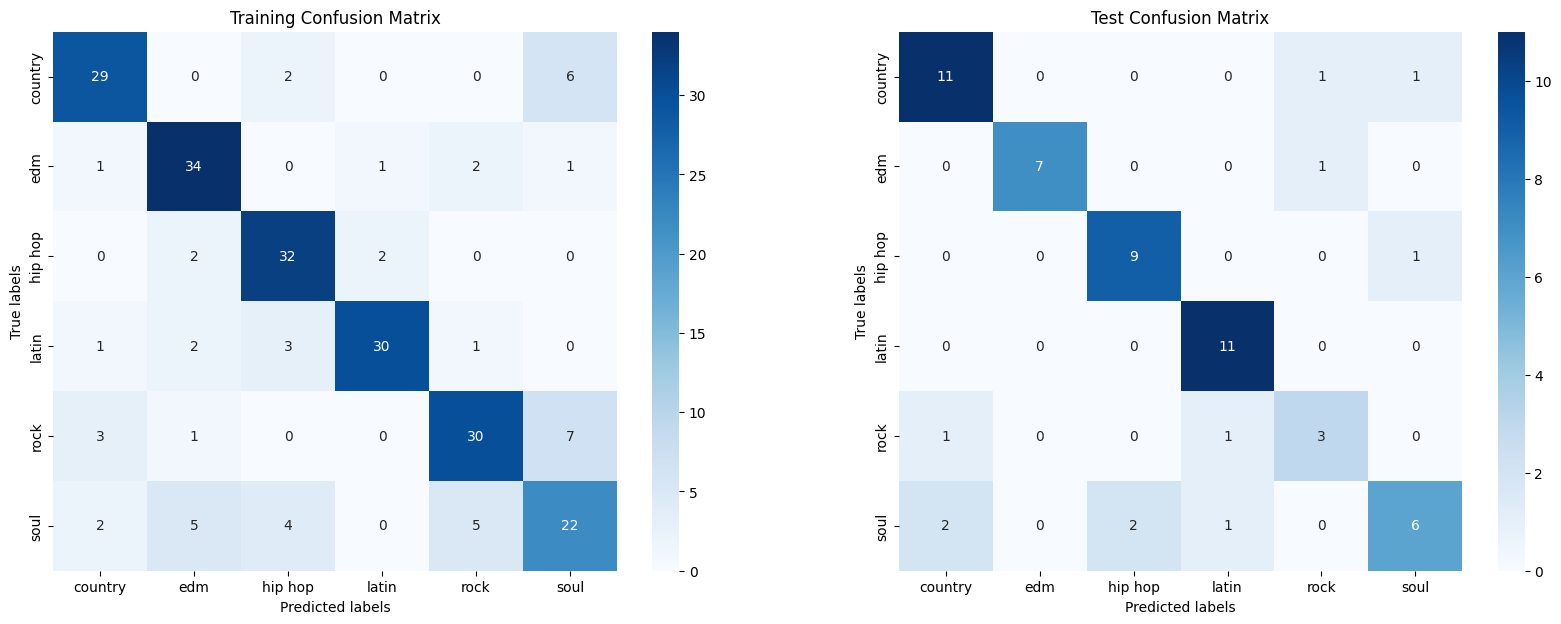

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# training predictions
y_pred_train = best_model.predict(X_train)

# train confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)

# test confusion matrix
cm_test = confusion_matrix(y_test_flat, y_pred)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(y_test_flat)), yticklabels=sorted(set(y_test_flat)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(y_train_flat)), yticklabels=sorted(set(y_train_flat)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')

## SVM

In [276]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Added different kernels to try
    'gamma': ['scale', 'auto']  # Gamma is a parameter for non-linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set
}

# Initialize the SVM model
svm_model = SVC(max_iter=10000, decision_function_shape='ovr')

# Create GridSearchCV with the SVM estimator and the parameter grid
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search_svm.fit(X_train, y_train_flat)

# Get the best model
best_svm_model = grid_search_svm.best_estimator_

# Predict on the test data with the best model
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the best model on the test data
accuracy_svm = accuracy_score(y_test_flat, y_pred_svm)
classification_report_svm = classification_report(y_test_flat, y_pred_svm)

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search_svm.best_params_}")
print(f"Test Accuracy: {accuracy_svm}")
print("SVM Classification Report:")
print(classification_report_svm)

Best Parameters: {'C': 29.763514416313132, 'gamma': 'scale', 'kernel': 'linear'}
Test Accuracy: 0.7758620689655172
SVM Classification Report:
              precision    recall  f1-score   support

     country       0.73      0.85      0.79        13
         edm       0.88      0.88      0.88         8
     hip hop       0.90      0.90      0.90        10
       latin       0.83      0.91      0.87        11
        rock       0.50      0.40      0.44         5
        soul       0.67      0.55      0.60        11

    accuracy                           0.78        58
   macro avg       0.75      0.75      0.75        58
weighted avg       0.77      0.78      0.77        58



Text(0.5, 1.0, 'Training Confusion Matrix')

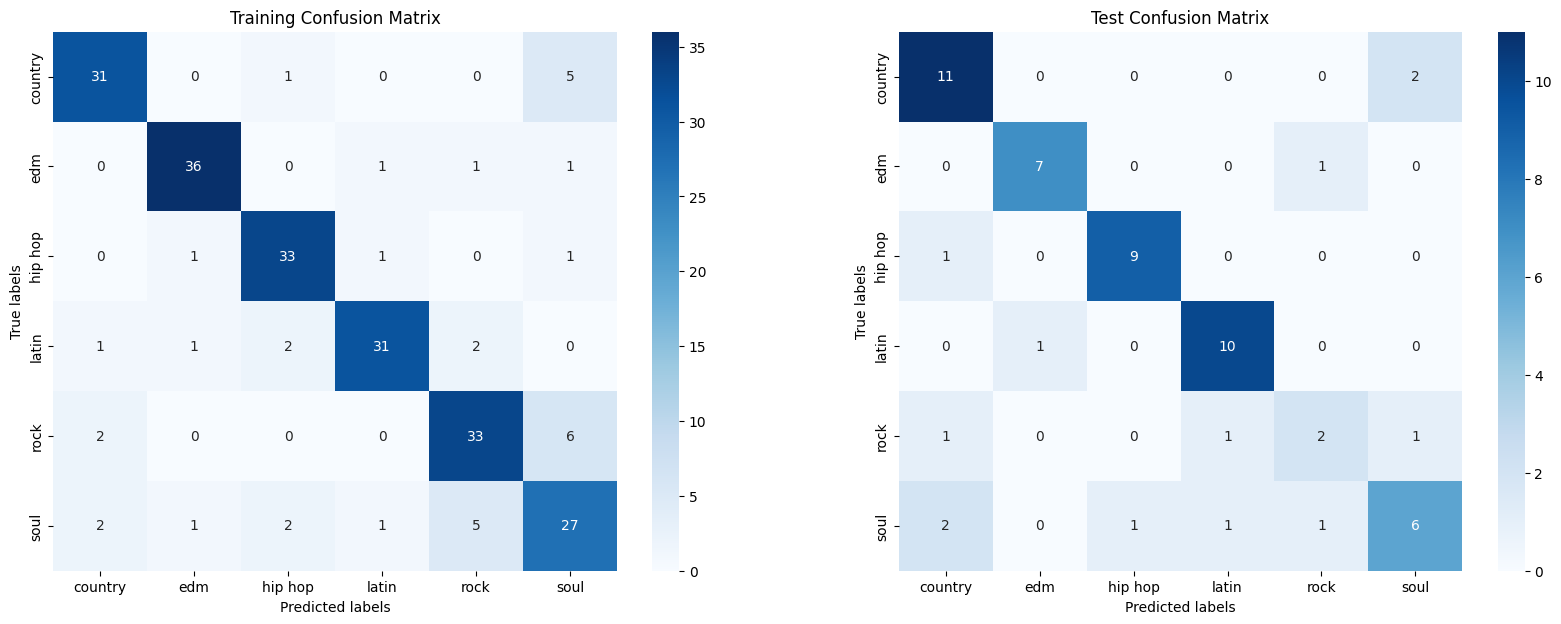

In [277]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# training predictions
y_pred_svm_train = best_svm_model.predict(X_train)

# train confusion matrix
cm_train = confusion_matrix(y_train, y_pred_svm_train)

# test confusion matrix
cm_test = confusion_matrix(y_test_flat, y_pred_svm)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(y_test_flat)), yticklabels=sorted(set(y_test_flat)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(y_train_flat)), yticklabels=sorted(set(y_train_flat)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')

## Neural Network

In [47]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(neurons=128, dropout_rate=0.05, regularization_rate=0.01, hidden_layers=1):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],), 
                    kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(Dropout(dropout_rate))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu', kernel_regularizer=regularizers.l2(regularization_rate)))
        model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(Dense(6, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, verbose=1, neurons=None, dropout_rate=None, regularization_rate=None, hidden_layers=None, batch_size=None, epochs=None)

param_grid = {
    'neurons': [32, 64, 128],
    'dropout_rate': [0.05, 0.1, 0.2],
    'regularization_rate': [0.01, 0.001],
    'hidden_layers': [1, 2, 3],
    'batch_size': [32, 64, 128],
    'epochs': [50]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train, train_target_encoded)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2213 - loss: 1.9227  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1325 - loss: 1.9442  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1785 - loss: 1.9632  
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2500 - loss: 1.8315Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1816 - loss: 2.9501  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1856 - loss: 1.8709 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2212 - loss: 2.7835 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2540 - loss: 1.8482 
Epoch 3/50
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1974 - loss: 1.8712 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1216 - loss: 2.7359  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1664 - loss: 2.9105  
Epoch 2/50
5/5 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1796 - loss: 2.0283  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1639 - loss: 3.0607  
1/5 ━━━━━━━━━━━━━━━━━━━━ 3s 759ms/step - accuracy: 0.2188 - loss: 2.0758Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2355 - loss: 1.8657 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1716 - loss: 2.0500  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1139 - loss: 3.0667  
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2765 - loss: 2.7922 
Epoch 2/50
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1682 - loss: 1.8927 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3136 - loss: 1.8439 
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1898 - loss: 1.9740  
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2188 - loss: 2.7488Epoch 2/50
Epoch 4/50
5/5 ━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7147 - loss: 0.8540 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6642 - loss: 1.3924 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7466 - loss: 0.8330 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/stepEpoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/stepEpoch 1/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/50
Epoch 1/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1644 - loss: 1.9026  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3659 - loss: 1.8288 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2344 - loss: 1.9589  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3834 - loss: 1.7640 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3189 - loss: 1.8388 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4838 - loss: 1.7021 
Epoch 5/50
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2880 - loss: 1.8402 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4642 - loss: 1.6924 
Epoch 4/50
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3188 - loss: 1.7822 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3876 - loss: 1.6706 
Epoch 5/50
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3798 - loss: 1.7645 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4465 - loss: 1.6048 
Epoch 8/50
5/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6930 - loss: 1.0708 
Epoch 43/50
Epoch 45/50
Epoch 44/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5872 - loss: 1.1700 
Epoch 43/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5261 - loss: 1.5868 
Epoch 44/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5759 - loss: 1.1008 
Epoch 44/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6411 - loss: 1.1688 
Epoch 44/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6828 - loss: 1.0106 
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5938 - loss: 1.5904Epoch 44/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5086 - loss: 1.7262 
Epoch 45/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5771 - loss: 1.5957 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6250 - loss: 1.099
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6829 - loss: 1.0478 
Epoch 45/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6502 - loss: 1.0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

Epoch 1/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2068 - loss: 4.1964  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1994 - loss: 4.0893  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1917 - loss: 3.9518 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3049 - loss: 3.7836 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2496 - loss: 3.9112 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3099 - loss: 3.6431 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2906 - loss: 3.7524 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4553 - loss: 3.4719 
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3125 - loss: 3.6024Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3425 - loss: 3.5914 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4550 - loss: 3.3550 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4407 - loss: 3.4501 
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6532 - loss: 1.5619 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  - accuracy: 0.5938 - loss: 1.498
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7390 - loss: 1.4904 
Epoch 44/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6321 - loss: 1.4482 
Epoch 46/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6607 - loss: 1.5192 
Epoch 45/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7199 - loss: 1.3954 
Epoch 47/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6793 - loss: 1.4825 
Epoch 46/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7208 - loss: 1.4093 
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7065 - loss: 1.4243 
Epoch 47/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6875 - loss: 1.416
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6842 - loss: 1.3956 
Epoch 49/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.751

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6798 - loss: 1.4825 
Epoch 50/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7160 - loss: 1.4150 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Epoch 1/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2144 - loss: 5.5158  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1986 - loss: 2.1541  
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3438 - loss: 5.1779Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3445 - loss: 5.0931 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3781 - loss: 2.0703 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3884 - loss: 4.7331 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4194 - loss: 2.0024 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3821 - loss: 1.9616 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1660 - loss: 2.1598  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4281 - loss: 1.8828 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3867 - loss: 4.4092 
Epoch 6/50
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1698 - loss: 2.2234  
Epoch 2/50
5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5244 - loss: 1.6537 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7879 - loss: 0.7765 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6703 - loss: 1.1039 
Epoch 45/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5758 - loss: 1.2491 
Epoch 46/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.6502 - loss: 1.0703
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.6415 - loss: 1.1025
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7207 - loss: 1.0211 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6468 - loss: 1.0232 
Epoch 50/50
Epoch 1/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5559 - loss: 1.1945 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
Epoch 1/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2281 - loss: 1.9831
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1647 - loss: 2.0363
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2808 - loss: 1.9674 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2150 - loss: 1.9647 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2482 - loss: 1.9493 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3062 - loss: 1.9123 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2495 - loss: 1.9573 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2983 - loss: 1.8866 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2521 - loss: 1.9323 
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3750 - loss: 1.8832Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3240 - loss: 1.8895 
1/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2500 - loss: 5.4374Epoch 7/50

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5675 - loss: 1.7304 
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7186 - loss: 0.9565 
Epoch 40/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6747 - loss: 1.0929 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6407 - loss: 1.0927 
Epoch 50/50
Epoch 33/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4688 - loss: 1.7899Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6058 - loss: 1.6323 
Epoch 49/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5733 - loss: 1.7984 
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7326 - loss: 0.9403 
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7130 - loss: 0.8991 
Epoch 41/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5915 - loss: 1.6215 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7147 - loss: 1.0002 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6947 - loss: 1.1176 
Epoch 34/50
5/5 ━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7573 - loss: 0.8445 
Epoch 47/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7595 - loss: 0.9525 
Epoch 40/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7139 - loss: 0.8493 
Epoch 48/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7978 - loss: 0.9205 
Epoch 41/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7717 - loss: 0.8474 
Epoch 49/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7812 - loss: 0.9190 
Epoch 42/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8438 - loss: 0.7312Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7599 - loss: 0.8895 
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7678 - loss: 0.9012 
Epoch 43/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7323 - loss: 1.0004 
Epoch 44/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Epoch 1/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1742 - loss: 8.0071
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2384 - loss: 7.3202 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3672 - loss: 6.6882 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3737 - loss: 6.1068 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1899 - loss: 2.6696  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4102 - loss: 5.5870 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3718 - loss: 5.1250 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.1861 - loss: 2.5840
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2152 - loss: 2.5299 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2806 - loss: 4.7579 
Epoch 8/50
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3170 - loss: 2.4506 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3110 - loss: 4.3909 
Epoch 9/50
5/5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8438 - loss: 0.8252Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8035 - loss: 0.8585 
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8125 - loss: 1.4975Epoch 46/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8284 - loss: 0.8784 
Epoch 46/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7240 - loss: 0.9673 
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7121 - loss: 1.6362 
Epoch 40/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6294 - loss: 1.5071 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.5766 - loss: 1.5194
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8205 - loss: 0.8316 
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6516 - loss: 1.6775 
Epoch 41/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8240 - loss: 0.8407 
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7862 - loss: 0.8931 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8227 - loss: 0.7814 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8062 - loss: 0.8362 
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6786 - loss: 1.5581 
Epoch 45/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8192 - loss: 0.8233 
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7813 - loss: 0.8412 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6555 - loss: 1.5965 
Epoch 46/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/stepEpoch 1/50y: 0.6562 - loss: 1.5111
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6834 - loss: 1.5315 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6875 - loss: 1.437
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6606 - loss: 1.4926 
Epoch 48/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6250 - loss: 1.6448Epoch 1/50
5/5 ━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6603 - loss: 1.5752 
Epoch 50/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5625 - loss: 1.4431Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6633 - loss: 1.4734 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2491 - loss: 2.6017  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2656 - loss: 2.5470 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2360 - loss: 2.5176 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2969 - loss: 2.4522 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1926 - loss: 2.0607  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2614 - loss: 2.4498 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1782 - loss: 1.8697 
Epoch 6/50
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2266 - loss: 1.8989  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3048 - loss: 2.3794 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2926 - loss: 1.8271 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3009 - loss: 2.3703 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1509 - loss: 1.9469  


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6188 - loss: 1.3964 
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6507 - loss: 1.5267 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5923 - loss: 1.5741
Epoch 49/50
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6490 - loss: 1.1096 
Epoch 42/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6181 - loss: 1.4482 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5941 - loss: 1.5377 
Epoch 49/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6820 - loss: 1.4687 
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6329 - loss: 1.1254 
Epoch 1/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/stepEpoch 43/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6266 - loss: 1.4867 
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6542 - loss: 1.4444 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6677 - lo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7299 - loss: 1.0072 
Epoch 49/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6764 - loss: 1.0420 
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6769 - loss: 0.9993 
Epoch 1/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2222 - loss: 1.8890  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2823 - loss: 1.8400 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3280 - loss: 1.7997 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3193 - loss: 1.7715 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3899 - loss: 1.7360 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5121 - loss: 1.7002 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3765 - loss: 1.7307 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1229 - loss: 2.0839  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.4202 - loss: 1.6795
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3125 - loss: 1.9026Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.2264 - loss: 1.8955
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2638 - loss: 1.8320 
Epoch 4/50
5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6553 - loss: 0.9696 
Epoch 45/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7781 - loss: 0.9142 
Epoch 37/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7195 - loss: 0.9256 
Epoch 46/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7217 - loss: 0.8536 
Epoch 44/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7395 - loss: 0.9563 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.7343 - loss: 0.8718
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.7586 - loss: 0.8192
Epoch 45/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7155 - loss: 0.9831 
Epoch 39/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7034 - loss: 0.9107 
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.6968 - loss: 0.8750
Epoch 49/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6794 - loss: 1.3797 
Epoch 49/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7474 - loss: 0.8297 
Epoch 49/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7026 - loss: 0.9604 
Epoch 42/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.7625 - loss: 0.7925
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7230 - loss: 0.8616 
Epoch 43/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7508 - loss: 0.7662 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.7486 - loss: 0.9187
Epoch 44/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/stepEpoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7630 - loss: 0.8794 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6862 - loss: 0.9317 
Epoch 46/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7992 - loss: 0.8555 
Epoch 47/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7188 - loss: 0.8519Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7112 - loss: 0.8838 
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7895 - loss: 0.7879 
Epoch 49/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7188 - loss: 0.951
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7439 - loss: 0.8973 
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7413 - loss: 0.8585 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Epoch 1/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1612 - loss: 3.2921
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2352 - loss: 3.2027 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2618 - loss: 3.1032 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2662 - loss: 3.0222 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3183 - loss: 2.9421 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3771 - loss: 2.8729 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2550 - loss: 2.8491 
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1700 - loss: 3.2760
Epoch 8/50
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3746 - loss: 2.7681 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3702 - loss: 2.6964 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2217 - loss: 2.0396  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6084 - loss: 1.0632 
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5861 - loss: 1.1793 
Epoch 46/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5566 - loss: 1.7439 
Epoch 35/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6681 - loss: 1.0793 
Epoch 44/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6562 - loss: 1.1645Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6907 - loss: 1.0688 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5932 - loss: 1.7433 
Epoch 45/50
Epoch 36/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6428 - loss: 1.0979 
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5954 - loss: 1.2200 
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5355 - loss: 1.6068 
Epoch 49/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5972 - loss: 1.1295 
Epoch 46/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5897 - loss: 1.6443 
1/5 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5950 - loss: 1.5294
Epoch 46/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5340 - loss: 1.8097
Epoch 38/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5896 - loss: 1.7483 
Epoch 39/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6623 - loss: 1.5120 
Epoch 47/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5418 - loss: 1.7936 
Epoch 40/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6181 - loss: 1.5007 
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5874 - loss: 1.7021 
Epoch 41/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5662 - loss: 1.5553 
Epoch 49/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5797 - loss: 1.7156 
Epoch 42/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6389 - loss: 1.4440 
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6136 - loss: 1.6988 
Epoch 43/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5653 - loss: 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2295 - loss: 4.1588
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2844 - loss: 3.9136 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3410 - loss: 3.7508 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3755 - loss: 3.6274 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3728 - loss: 3.5337 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3845 - loss: 3.3835 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3903 - loss: 3.2747 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2127 - loss: 2.0541
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3819 - loss: 3.1437 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2705 - loss: 1.9797 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3856 - loss: 3.0524 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3863 - loss: 2.9637 
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6441 - loss: 1.8205 
Epoch 30/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7160 - loss: 1.0196 
Epoch 49/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7068 - loss: 1.0683 
Epoch 28/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6259 - loss: 1.6067 
Epoch 44/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6520 - loss: 1.4580 
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6098 - loss: 1.8144 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7343 - loss: 0.9500 
Epoch 50/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/stepEpoch 31/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6738 - loss: 1.0605 
Epoch 29/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6824 - loss: 1.5130 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6390 - loss: 1.4857 
Epoch 45/50
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7338 - loss: 0.8591 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7190 - loss: 1.0061 
Epoch 33/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6937 - loss: 1.4646 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6875 - loss: 1.5718
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6485 - loss: 1.7035 
Epoch 36/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7121 - loss: 1.4772 
Epoch 49/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6686 - loss: 1.1019 
Epoch 34/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6580 - loss: 1.6756 
Epoch 37/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7074 - loss: 0.9814 
Epoch 35/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7377 - loss: 1.3992 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5938 - loss: 1.6334Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6783 - loss: 1.0052 
Epoch 36/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7561 - loss: 0.9238 
Epoch 44/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6546 - loss: 1.6283 
Epoch 45/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7460 - loss: 0.8736 
Epoch 45/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6480 - loss: 1.5693 
Epoch 46/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7800 - loss: 0.8770 
Epoch 46/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6838 - loss: 1.5257 
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6926 - loss: 0.9422 
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7152 - loss: 0.8833 
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6716 - loss: 1.5948 
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7683 - loss: 0.9063 
Epoch 49/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6830 - loss: 1.5040 
Epoch 49/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7757 - loss: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4186 - loss: 1.7786 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4423 - loss: 1.9841 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4999 - loss: 1.6960 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3633 - loss: 1.9542 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4578 - loss: 1.6483 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3876 - loss: 1.9565 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4787 - loss: 1.6321 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4038 - loss: 1.8693 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5034 - loss: 1.5490 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4922 - loss: 1.8055 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1924 - loss: 3.8841
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5017 - loss: 1.5812 
Epoch 13/50
5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5053 - loss: 1.7545 
Epoch 49/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6071 - loss: 1.2621 
Epoch 45/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4091 - loss: 1.5846 
Epoch 26/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4664 - loss: 1.7049 
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 1.5673Epoch 50/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4743 - loss: 1.5548 
Epoch 30/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4879 - loss: 1.8226 
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5662 - loss: 1.3175 
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3438 - loss: 1.9695Epoch 46/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4169 - loss: 1.5052 
Epoch 27/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4423 - loss: 1.8211 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5283 - loss: 1.4692 
Epoch 31/50
5/5 ━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6319 - loss: 1.2071 
Epoch 38/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5000 - loss: 1.4267Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5354 - loss: 1.3595 
Epoch 41/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5557 - loss: 1.3076 
Epoch 42/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5653 - loss: 1.1938 
Epoch 39/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5701 - loss: 1.2448 
Epoch 43/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6044 - loss: 1.1517 
Epoch 40/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5897 - loss: 1.2294 
Epoch 44/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6420 - loss: 1.1771 
Epoch 41/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5471 - loss: 1.2941 
Epoch 45/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5610 - loss: 1.2599 
Epoch 42/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5928 - loss: 1.1489 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1817 - loss: 5.3697
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2391 - loss: 5.0937 
Epoch 3/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2653 - loss: 4.8596 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3059 - loss: 4.6224 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1447 - loss: 5.3590
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3048 - loss: 4.4190 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2374 - loss: 5.0747 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3001 - loss: 4.2121 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2852 - loss: 4.8139 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3001 - loss: 4.5633 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2909 - loss: 4.0532 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - a

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.7548 - loss: 0.9672
Epoch 49/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5792 - loss: 1.9924 
Epoch 29/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6559 - loss: 1.7014 
Epoch 46/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6465 - loss: 1.0483 
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6822 - loss: 0.9915 
Epoch 46/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7226 - loss: 0.9821 
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5409 - loss: 1.9650 
Epoch 30/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7365 - loss: 1.0422 
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6889 - loss: 1.6515 
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.7447 - loss: 0.9138
Epoch 49/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.7373 - loss: 0.9457
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.6959 - loss: 0.9510


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5413 - loss: 2.0810
Epoch 27/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5501 - loss: 1.7488
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5312 - loss: 2.0499Epoch 37/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5370 - loss: 2.0111
Epoch 28/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5906 - loss: 1.7240 
Epoch 38/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5918 - loss: 1.9744 
Epoch 29/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5628 - loss: 1.7636 
Epoch 39/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3750 - loss: 2.2739Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5263 - loss: 1.9932 
Epoch 30/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5340 - loss: 1.7549 
Epoch 40/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5979 - loss: 1.8398 
Epoch 31/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5797 - loss: 1.6899 
Epoch 41

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1969 - loss: 8.0126
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1507 - loss: 2.5828 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1943 - loss: 2.4616 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2296 - loss: 7.3575 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1934 - loss: 2.5107 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6411 - loss: 1.5480 
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2500 - loss: 6.9812Epoch 49/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2574 - loss: 2.3185 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2391 - loss: 6.8018 
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1875 - loss: 2.5544Epoch 4/50
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2160 - loss: 2.4887 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6407 - loss: 1.5380 
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3236 - loss: 2.1061 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3753 - loss: 3.7554 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4646 - loss: 1.9315 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2314 - loss: 2.2317 
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4003 - loss: 1.9353 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5282 - loss: 1.8615 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3381 - loss: 3.5664 
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.2948 - loss: 2.1857
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.3572 - loss: 2.1751
Epoch 17/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5151 - loss: 1.8024 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3323 - loss: 2.0801
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4062 - loss: 1.9745Epoch 22/50
5/5 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4977 - loss: 1.9051 
Epoch 28/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6102 - loss: 1.7247 
Epoch 45/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.3507 - loss: 1.7298
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.4012 - loss: 1.9820
Epoch 29/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7069 - loss: 1.0854 
Epoch 37/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3702 - loss: 1.7249 
Epoch 14/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5938 - loss: 1.6878Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3586 - loss: 1.9573 
Epoch 30/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6259 - loss: 1.6162 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6991 - loss: 1.1284 
Epoch 1/50
Epoch 46/50
Epoch 38/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7517 - loss: 0.9518 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7610 - loss: 0.9499 
5/5 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5023 - loss: 1.6965 
Epoch 45/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4605 - loss: 1.5394 
Epoch 30/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5666 - loss: 1.6642 
Epoch 46/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4965 - loss: 1.4694 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5323 - loss: 1.6453 
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4843 - loss: 1.7041 
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5435 - loss: 1.4577  
Epoch 32/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5597 - loss: 1.6127 
Epoch 49/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5195 - loss: 1.4577 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5938 - loss: 1.5239Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5335 - loss: 1.6011
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5101 - loss: 1.4424 
Epoch 34/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5518 - loss: 1.4336 
Epoch 35/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5548 - loss: 1.6213 
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5938 - loss: 1.3150Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5117 - loss: 1.3995 
Epoch 36/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1742 - loss: 2.3376  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1725 - loss: 2.0669 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5726

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5436 - loss: 1.3679 
Epoch 41/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2613 - loss: 1.8460 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3180 - loss: 1.7796 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6027 - loss: 1.3146 
Epoch 42/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2460 - loss: 1.8438 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3775 - loss: 1.7929 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5002 - loss: 1.3966 
Epoch 43/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2408 - loss: 1.8360 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3288 - loss: 1.7325 
Epoch 10/50
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5854 - loss: 1.3438 
Epoch 44/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4046 - loss: 1.7095 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2391 - loss: 1.8458 
Epoch 7/5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1794 - loss: 2.8002 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2966 - loss: 2.6090 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2135 - loss: 1.9064 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4651 - loss: 1.5684 
Epoch 21/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4002 - loss: 1.6408 
Epoch 18/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2235 - loss: 1.8683 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1868 - loss: 2.7573 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4412 - loss: 1.5869 
Epoch 22/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2740 - loss: 2.5637 
Epoch 7/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4033 - loss: 2.3923 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3720 - loss: 1.6519 
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2812 - loss: 2.5828Epoch 19/50
5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 40/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3721 - loss: 1.6814 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5411 - loss: 1.6172 
Epoch 11/50
Epoch 44/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6127 - loss: 1.2259 
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6250 - loss: 1.6416Epoch 30/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5958 - loss: 1.6307 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6250 - loss: 1.6456
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5575 - loss: 1.6063 
Epoch 40/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5531 - loss: 1.6874 
Epoch 37/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3929 - loss: 1.6997 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6490 - loss: 1.2397 
Epoch 31/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4375 - loss: 1.6534Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5977 - loss: 1.1855 
Epoch 41/50
5/5 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6163 - loss: 1.2653 
Epoch 30/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6729 - loss: 0.9999 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6002 - loss: 1.2846 
Epoch 31/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5732 - loss: 1.2722 
Epoch 32/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6167 - loss: 1.2131 
Epoch 33/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6220 - loss: 1.2478 
Epoch 34/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5975 - loss: 1.1969 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7299 - loss: 1.1220 
Epoch 36/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6721 - loss: 1.1564 
Epoch 37/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 3s 886ms/step - accuracy: 0.2500 - loss: 3.1766Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2138 - loss: 3.1264  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7044 - loss: 1.0502 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3127 - loss: 2.6423 
Epoch 40/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0938 - loss: 2.9474Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2105 - loss: 2.8930 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3463 - loss: 2.5817 
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2812 - loss: 2.7765Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6186 - loss: 1.1479 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3349 - loss: 2.7542 
Epoch 41/50
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3049 - loss: 2.5230 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6443 - loss: 1.1543 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3645 - loss: 2.6392 
Epoch 42/50
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3971 - loss: 2.4394 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5479 - loss: 1.6086 
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4375 - loss: 1.4358Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4147 - loss: 2.3691 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4356 - loss: 1.5190 
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3355 - loss: 1.7489 
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5625 - loss: 1.7704Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5417 - loss: 1.5860 
Epoch 12/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3750 - loss: 2.3840Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5235 - loss: 1.8099 
Epoch 26/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4191 - loss: 2.3301 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4450 - loss: 1.6879 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5457 - loss: 1.5281 
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6056 - loss: 1.5955 
Epoch 41/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6590 - loss: 0.9692 
Epoch 41/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6790 - loss: 1.0429 
Epoch 36/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1407 - loss: 3.4442  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3885 - loss: 2.2141 
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5625 - loss: 1.1347Epoch 26/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7790 - loss: 0.8942 
Epoch 42/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6578 - loss: 1.0450 
Epoch 37/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1573 - loss: 3.3048 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3646 - loss: 2.2676 
Epoch 27/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6708 - loss: 0.9496 
Epoch 43/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7272 - loss: 0.8

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3824 - loss: 2.0069 
Epoch 44/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3189 - loss: 2.4631 
Epoch 19/50
Epoch 1/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3750 - loss: 2.0164Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4321 - loss: 1.9433 
Epoch 45/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4234 - loss: 2.3962 
Epoch 20/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3707 - loss: 1.9447 
Epoch 46/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3280 - loss: 2.3773 
Epoch 21/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3438 - loss: 2.3686Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.3694 - loss: 2.3378
Epoch 22/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4351 - loss: 1.9020 
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4176 - loss: 2.3099 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.4688 - loss: 1.9

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4128 - loss: 2.1853 
Epoch 30/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4024 - loss: 2.1114 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4189 - loss: 2.0939 
Epoch 32/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3743 - loss: 2.1171Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3790 - loss: 2.1048
Epoch 33/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4769 - loss: 2.0227 
Epoch 34/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3885 - loss: 2.0133 
Epoch 35/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4233 - loss: 1.9840 
Epoch 36/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4412 - loss: 1.9687 
Epoch 37/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4280 - loss: 1.9862 
Epoch 38/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3682 - loss: 1.9817 
Epoch 39/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4260 - loss: 1.9148 
Epoch 40/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4451 - loss: 1.8996 
Epoch 41/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4216 - loss: 1.9123 
Epoch 42/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5122 - loss: 1.8488 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1830 - loss: 1.9305 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3415 - loss: 2.5813 
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2484 - loss: 2.5823 
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2187 - loss: 1.9077 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3149 - loss: 2.4909 
Epoch 17/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1376 - loss: 1.9982
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2339 - loss: 1.9037 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1572 - loss: 1.9758 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3300 - loss: 2.4674
Epoch 18/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.2635 - loss: 1.8807
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2056 - loss: 1.8769 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2562 - loss: 2.4800 
Epoch 19/50

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4426 - loss: 1.9843 
Epoch 35/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5418 - loss: 1.2715 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4472 - loss: 2.3290 
Epoch 47/50
Epoch 23/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5297 - loss: 1.3966 
Epoch 41/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5133 - loss: 1.9301 
Epoch 36/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5336 - loss: 1.2901 
Epoch 40/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4446 - loss: 2.1225 
Epoch 28/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6170 - loss: 1.2291 
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4784 - loss: 1.3832 
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2500 - loss: 1.9594Epoch 42/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2558 - loss: 1.9565 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3393 - loss: 2.3578 
Epoch 24/50
5/5 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6532 - loss: 1.1305 
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3733 - loss: 1.7422 
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5213 - loss: 2.0255 
Epoch 33/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5938 - loss: 1.7752Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5336 - loss: 1.8043 
Epoch 46/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5360 - loss: 1.8203 
Epoch 40/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6480 - loss: 1.0736 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4940 - loss: 2.0032 
Epoch 34/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4348 - loss: 1.7086 
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5444 - loss: 1.7452 
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4844 - loss: 1.8130 
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6250 - loss: 1.8917Epoch 41/50
5/5 ━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5030 - loss: 1.7561 
Epoch 45/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4774 - loss: 1.5542
Epoch 21/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5312 - loss: 1.9397Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5406 - loss: 1.8865
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5532 - loss: 1.7723 
Epoch 40/50
Epoch 46/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5683 - loss: 1.8871 
Epoch 41/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4703 - loss: 1.5775 
Epoch 22/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5509 - loss: 1.6922 
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5561 - loss: 1.4721 
Epoch 23/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5172 - loss: 1.8753 
Epoch 42/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5205 - loss: 1.7031 
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5501 - loss: 1.4577 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5680 - loss: 1.7293 
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5578 - loss: 1.3357 
Epoch 29/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5284 - loss: 1.7378 
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5344 - loss: 1.3334 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5879 - loss: 1.6924 
Epoch 49/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5413 - loss: 1.3348 
Epoch 31/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6359 - loss: 1.7050 
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5484 - loss: 1.3970 
Epoch 32/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1725 - loss: 2.0157
Epoch 1/50
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5963 - loss: 1.2877 
Epoch 33/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5284 - loss: 1.7072 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2130 - loss: 1.9759 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5815 - loss: 1.2748 
Epoch 34/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3092 - loss: 1.8906 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6015 - loss: 1.3100 
Epoch 35/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5871 - loss: 1.2534 
Epoch 36/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3548 - loss: 1.8850 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4375 - loss: 1.502
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5371 - loss: 1.3470 
Epoch 37/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4344 - loss: 1.8495 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3580 - loss: 1.8625 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6124 - loss: 1.2123 
Epoch 38/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3533 - loss: 1.8523 
Epoch 9/50
5/5 ━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3651 - loss: 1.8022 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5585 - loss: 1.3084 
Epoch 40/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6306 - loss: 1.1651 
Epoch 41/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3663 - loss: 1.8646 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4590 - loss: 1.7000 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5985 - loss: 1.2257 
Epoch 42/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4168 - loss: 1.7241 
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6280 - loss: 1.1139 
Epoch 43/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3994 - loss: 1.7458 
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5955 - loss: 1.2003 
Epoch 44/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2046 - loss: 2.0611
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6303 - loss: 1.1138 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3941 - loss: 4.2745 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1250 - loss: 5.57137
Epoch 2/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4627 - loss: 1.4853 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3780 - loss: 3.4155 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3550 - loss: 1.8345 
Epoch 13/50
Epoch 22/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4175 - loss: 4.0490 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3985 - loss: 1.7736 
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4683 - loss: 1.4952 
Epoch 23/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3454 - loss: 3.8738 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4681 - loss: 3.2293 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1959 - loss: 5.1990 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4024 - loss: 3.6264

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7208 - loss: 1.0229 
Epoch 37/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7221 - loss: 1.0046 
Epoch 35/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7121 - loss: 1.4662 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4926 - loss: 1.6929 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6199 - loss: 1.5866 
Epoch 49/50
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5312 - loss: 1.6157
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5885 - loss: 1.5576 
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6572 - loss: 1.0908 
Epoch 38/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6219 - loss: 1.6566 
Epoch 43/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6969 - loss: 1.0007 
Epoch 36/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5240 - loss: 1.6099 
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6720 - loss: 0.9908 
Epoch 39/50
5/5 ━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6108 - loss: 1.6273
Epoch 49/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6555 - loss: 1.3627 
Epoch 19/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6811 - loss: 0.9293 
Epoch 43/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7253 - loss: 1.0240 
Epoch 43/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6133 - loss: 1.6187 
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6550 - loss: 1.2735 
Epoch 1/50
Epoch 20/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6859 - loss: 0.9456 
Epoch 44/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6273 - loss: 1.5580
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7965 - loss: 0.9523  
Epoch 44/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7703 - loss: 0.9192
Epoch 45/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6054 - loss: 1.4055
Epoch 21/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7674 - loss: 0.9676 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7538 - loss: 0.8799 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6303 - loss: 1.2971 
Epoch 50/50
Epoch 25/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6181 - loss: 1.2251 
Epoch 26/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8009 - loss: 0.8071 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7364 - loss: 0.9126 
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7003 - loss: 1.1682 
Epoch 27/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6638 - loss: 1.1639 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7204 - loss: 0.9243 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6250 - loss: 1.233


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6847 - loss: 1.1430
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7188 - loss: 1.0071Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6920 - loss: 1.0639 
Epoch 30/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6420 - loss: 1.1490 
Epoch 31/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5938 - loss: 1.2056Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6216 - loss: 1.1687 
Epoch 32/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7591 - loss: 0.9803
Epoch 33/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6637 - loss: 1.0646 
Epoch 34/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7264 - loss: 1.1091 
Epoch 35/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7060 - loss: 1.1147 
Epoch 36/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7235 - loss: 1.0821 
Epoch 37/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2718 - loss: 2.4790 
Epoch 24/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1794 - loss: 2.0612
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3315 - loss: 2.8126 
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2103 - loss: 5.4456
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2941 - loss: 1.9061
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1960 - loss: 2.0187 
Epoch 3/50
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2627 - loss: 1.8676 
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2188 - loss: 2.5038Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3075 - loss: 2.7710 
Epoch 17/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2940 - loss: 2.9341 
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2412 - loss: 1.9671 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2883 - loss: 2.9063 
1/5 ━━━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3458 - loss: 2.0718 
Epoch 38/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3860 - loss: 1.9133 
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2287 - loss: 4.3230 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3864 - loss: 1.9310 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3934 - loss: 1.6456 
Epoch 39/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3624 - loss: 1.8872 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5742 - loss: 1.3707 
Epoch 48/50
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5447 - loss: 1.3867 
Epoch 45/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3101 - loss: 4.1232 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5395 - loss: 1.5153 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3667 - loss: 2.0495 
Epoch 39/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3254 - loss: 3.9818 
Epoch 9/50
Epoch 40/50
5/5 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5489 - loss: 1.3699 
Epoch 49/50
Epoch 43/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3633 - loss: 1.8744 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3506 - loss: 3.4373 
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4907 - loss: 1.5229 
Epoch 44/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4552 - loss: 1.4305 
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3903 - loss: 1.9520 
Epoch 43/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5572 - loss: 1.3541 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3955 - loss: 1.9668 
Epoch 44/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4149 - loss: 1.5390 
Epoch 45/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4062 - loss: 2.0445Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3785 - loss: 1.9529 9
Epoch 45/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3397 - loss: 3.3130  
5/5 ━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3681 - loss: 1.9294 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3297 - loss: 3.2351 
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4717 - loss: 1.3649 
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4162 - loss: 1.8606 
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3406 - loss: 3.1593 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4809 - loss: 1.3702 
Epoch 1/50
Epoch 16/50
Epoch 49/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2819 - loss: 3.0650 
Epoch 17/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3576 - loss: 1.8704 
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4813 - loss: 1.4882 
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4228 - loss: 2.9365 
Epoch 18/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3495 - loss: 2.7864  
Epoch 21/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3438 - loss: 2.6422Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3763 - loss: 2.6438
Epoch 22/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3438 - loss: 2.5379Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3519 - loss: 2.5849 
Epoch 23/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3310 - loss: 2.5498 
Epoch 24/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3694 - loss: 2.4593 
Epoch 25/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3747 - loss: 2.4503 
Epoch 26/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3932 - loss: 2.3729 
Epoch 27/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4537 - loss: 2.2659 
Epoch 28/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4189 - loss: 2.2718 
Epoch 29/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3942 - loss: 2.2751 
Epoch 3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3616 - loss: 1.8684
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2580 - loss: 2.5774 
Epoch 26/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4163 - loss: 1.7965
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3284 - loss: 3.9644 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3119 - loss: 2.5476 9
Epoch 27/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3576 - loss: 5.0202 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4177 - loss: 1.7318 
Epoch 19/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2121 - loss: 6.9068  
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3972 - loss: 1.7699 
Epoch 17/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3747 - loss: 1.8626 
Epoch 17/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2980 - loss: 2.5500 
Epoch 28/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4145 - loss: 1.7609 
1/5 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6285 - loss: 1.2298 
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5077 - loss: 2.0744 
Epoch 30/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5597 - loss: 1.9118 
Epoch 34/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5010 - loss: 1.9053 
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4688 - loss: 1.6126Epoch 38/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5855 - loss: 1.3228 
Epoch 49/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6677 - loss: 1.1675 
Epoch 45/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6277 - loss: 1.2070 
Epoch 50/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5506 - loss: 1.7811
Epoch 39/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6302 - loss: 1.1874 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4846 - loss: 2.0777Epoch 46/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5981 - loss: 1.2551 
5/5 ━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5653 - loss: 1.6882 
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2188 - loss: 2.2310Epoch 41/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4723 - loss: 1.9640 
Epoch 36/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2601 - loss: 2.2636 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5396 - loss: 1.6866 
Epoch 46/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2666 - loss: 2.2355 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5195 - loss: 1.8477 
Epoch 37/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2766 - loss: 2.2005 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4706 - loss: 1.8864 
Epoch 38/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6171 - loss: 1.6549 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3125 - loss: 2.177
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5861 - loss: 1.6653 
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3311 - loss: 2.0813 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5596 - loss: 1.6642
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7079 - loss: 1.4979 
Epoch 45/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6006 - loss: 1.7315 
Epoch 42/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4390 - loss: 2.0075 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6450 - loss: 1.6217 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5497 - loss: 1.7405 
Epoch 46/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6250 - loss: 1.5799Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5304 - loss: 1.7448 
Epoch 43/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5850 - loss: 1.6809 
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4147 - loss: 1.9474 
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5826 - loss: 1.7059 
Epoch 4

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5985 - loss: 1.5928 
Epoch 50/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5997 - loss: 1.5483
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5087 - loss: 1.7629
Epoch 17/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5571 - loss: 1.6083  
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5545 - loss: 1.6862
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4256 - loss: 1.7088
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5918 - loss: 1.6082 
Epoch 49/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5731 - loss: 1.6448 
Epoch 19/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4688 - loss: 1.7130Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5223 - loss: 1.6928 
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4979 - loss: 1.6419 
Epoch 20/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - a

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5622 - loss: 1.5368 
Epoch 21/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5645 - loss: 1.5379 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5222 - loss: 1.5691 
Epoch 23/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4375 - loss: 1.6464Epoch 1/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5397 - loss: 1.5203 
Epoch 24/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5563 - loss: 1.5019 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2042 - loss: 2.6859
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5222 - loss: 1.4789 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2055 - loss: 2.6256 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1845 - loss: 2.6396
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2677 - loss: 2.5556 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5662 - loss: 1.4535 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1800 - loss: 2.5847 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6107 - loss: 1.4564
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2107 - loss: 2.5384
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2255 - loss: 2.4425
Epoch 2/50
3/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5510 - loss: 1.7904 
Epoch 45/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6250 - loss: 1.3897 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5189 - loss: 1.8546 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4516 - loss: 1.5892 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5084 - loss: 1.7341 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5190 - loss: 1.7777 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5242 - loss: 1.8247 
Epoch 41/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6824 - loss: 1.2096 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4915 - loss: 1.7285 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5183 - loss: 1.7881 
Epoch 47/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5000 - loss: 1.8473Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5308 - loss: 1.8251 
Epoch 42/50
5/5 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5288 - loss: 1.3701 
Epoch 40/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7234 - loss: 1.1860 
Epoch 37/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7577 - loss: 1.0550 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5732 - loss: 1.3295 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5347 - loss: 1.4012
Epoch 35/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6877 - loss: 1.2464 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7812 - loss: 0.994
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7753 - loss: 0.9977 
Epoch 45/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6747 - loss: 1.2107 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5045 - loss: 1.3898 
Epoch 36/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7812 - loss: 0.9244Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5647 - loss: 1.3283 
Epoch 42

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2670 - loss: 1.8860 
Epoch 3/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7603 - loss: 1.0638 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2833 - loss: 1.8334 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6875 - loss: 1.1982
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3487 - loss: 1.8118 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3227 - loss: 1.8082 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7056 - loss: 1.1242
Epoch 6/50
Epoch 1/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2796 - loss: 1.7986 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3515 - loss: 1.7799 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3554 - loss: 1.7665 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3404 - loss: 1.7537 
Epoch 10/5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1819 - loss: 2.9575  
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3325 - loss: 2.8332 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4750 - loss: 1.7030 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3062 - loss: 2.7461 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1662 - loss: 3.2034  
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4718 - loss: 1.6911 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3324 - loss: 2.6937 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2133 - loss: 2.9160 
Epoch 3/50
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4673 - loss: 1.6622 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3089 - loss: 2.6356 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4254 - loss: 1.6638 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3671 - loss: 2.5596 
Epoch 7/5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5601 - loss: 1.3528 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5516 - loss: 1.6276 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5327 - loss: 1.4674 
Epoch 50/50
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6060 - loss: 1.7045 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4948 - loss: 1.9901 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4837 - loss: 1.4134 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5781 - loss: 1.3187Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4968 - loss: 1.4699 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5420 - loss: 1.7597 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5883 - loss: 1.3351 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5701 - loss: 1.6169 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4948 - loss: 1.9965 
Epoch 25/50
3/3 ━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6270 - loss: 1.2659 
Epoch 41/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6020 - loss: 1.3357 
Epoch 35/50
3/3 ��━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5726 - loss: 1.8147 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5281 - loss: 1.3504 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6151 - loss: 1.2757 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5340 - loss: 1.3228 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6146 - loss: 1.2567 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6229 - loss: 1.2892 
Epoch 43/50
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5609 - loss: 1.8095 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6334 - loss: 1.2919 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6074 - loss: 1.2600 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5753 - loss: 1.5980 
Epoch 47/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6584 - loss: 1.1173 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6139 - loss: 1.5791 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6205 - loss: 1.5602 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1754 - loss: 3.0345  
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6172 - loss: 1.5556 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2147 - loss: 2.9510 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6446 - loss: 1.5242 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3161 - loss: 2.8713 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3220 - loss: 2.8012 
Epoch 1/50
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3881 - loss: 2.7080 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3438 - loss: 2.6865Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3554 - loss: 2.6670 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4115 - loss: 2.5877 
Epoch 8/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3540 - loss: 2.5485 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3587 - loss: 2.5164 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3037 - loss: 3.0711
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4351 - loss: 2.4260 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3763 - loss: 2.9551 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3809 - loss: 2.4205 1
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4201 - loss: 2.3222 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4326 - loss: 2.2216 
Epoch 31/50
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6545 - loss: 1.1119 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6885 - loss: 1.0209 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4012 - loss: 2.3030 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.0938 - loss: 3.2424Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4862 - loss: 2.1781 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1257 - loss: 3.2267 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7031 - loss: 1.058
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6512 - loss: 1.0172 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6983 - loss: 1.0084 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6623 - loss: 1.0633 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3252 - loss: 2.9396 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6637 - loss: 1.0446 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4390 - loss: 2.1652 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4902 - loss: 2.0064
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3404 - loss: 2.8876 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4104 - loss: 2.1557 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3771 - loss: 2.8580 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7454 - loss: 1.0109 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4483 - loss: 2.1200 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3547 - loss: 2.8151 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3921 - loss: 2.1196 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3449 - loss: 2.7213 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4929 - loss: 1.9689 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4416 - loss: 2.0559 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3102 - loss: 2.7055 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4110 - loss: 2.0538 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5478 - loss: 1.9054
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3410 - loss: 2.6586
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4345 - loss: 2.0153 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4752 - loss: 1.9491 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2500 - loss: 2.6436Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2841 - loss: 2.6277 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4688 - loss: 2.2841Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4312 - loss: 2.2914 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4352 - loss: 2.2295 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4973 - loss: 2.2232 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4543 - loss: 2.2204 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4445 - loss: 2.2071 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4583 - loss: 2.1816 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4359 - loss: 2.1586 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5248 - loss: 2.0844 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5132 - loss: 2.1073 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4876 - loss: 2.0641 
1/3 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.25

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5051 - loss: 2.0118 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2473 - loss: 1.9186 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4961 - loss: 2.0318 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2475 - loss: 1.9108 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5079 - loss: 1.9654 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3487 - loss: 1.8397 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5471 - loss: 1.9516 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3101 - loss: 1.8257 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5072 - loss: 1.9276 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3149 - loss: 1.8645 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5247 - loss: 1.9021 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4090 - loss: 1.8305 
Epoch 8/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4300 - loss: 1.6530 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4444 - loss: 1.6031 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4306 - loss: 1.6494 
Epoch 28/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4738 - loss: 1.6094 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4490 - loss: 1.5784  
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5228 - loss: 1.5284 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4555 - loss: 1.5428 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5131 - loss: 1.5115 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4726 - loss: 1.5549 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5196 - loss: 1.5560  
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4954 - loss: 1.5075 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5228 - loss:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4018 - loss: 3.5257 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.4445 - loss: 1.7227
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3796 - loss: 1.6951 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3574 - loss: 3.4337 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3816 - loss: 3.0959
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3874 - loss: 1.8001 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3672 - loss: 1.7874 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4287 - loss: 3.0378 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3795 - loss: 2.9724 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1649 - loss: 4.3229
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3594 - loss: 1.7853Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3816 - loss: 1.7771 
Epoch 15/50
3/3 ━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5177 - loss: 2.1679 
Epoch 37/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5027 - loss: 2.1310 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6112 - loss: 1.1586 
Epoch 38/50
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5858 - loss: 1.3247 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5609 - loss: 1.7641 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6719 - loss: 1.0814Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6610 - loss: 1.0806 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4896 - loss: 2.1124 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6596 - loss: 1.2489 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5837 - loss: 1.7783 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6604 - loss: 1.0731 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6931 - loss: 1.2271 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6388 - loss: 1.1968
Epoch 1/50
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5477 - loss: 1.9851 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5275 - loss: 1.7186 
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6301 - loss: 1.1820
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6394 - loss: 1.0550 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4961 - loss: 1.9704
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6524 - loss: 1.1542
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5099 - loss: 1.9692
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6604 - loss: 1.0495
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6616 - loss: 1.1143 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5354 - loss: 1.9428 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/stepEpoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6885 - loss: 0.9496 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6904 - loss: 1.0895 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7205 - loss: 0.9057 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7031 - loss: 0.9887Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5537 - loss: 1.8451 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6682 - loss: 1.0334 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6518 - loss: 1.1255 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1355 - loss: 2.1190
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6719 - loss: 1.1281Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6577 - loss: 1.0761 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2400 - loss: 1.9975 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6827 - loss: 0.9616  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7153 - loss: 0.9489 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3267 - loss: 1.9248 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7466 - loss: 0.9723 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7094 - loss: 0.9529
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4227 - loss: 1.8990
Epoch 7/50
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3959 - loss: 1.8916 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7186 - loss: 0.9717 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3965 - loss: 1.8719 
Epoch 9/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3515 - loss: 1.8651 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3927 - loss: 1.8162 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4084 - loss: 1.8204 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4450 - loss: 1.7860 
Epoch 13/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4312 - loss: 1.7558 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1944 - loss: 5.6155
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4241 - loss: 1.7452  
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2219 - loss: 5.3256 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4097 - loss: 1.7209 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3638 - loss: 5.0920 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3344 - loss: 4.8736 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4580 - loss: 1.6952 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2814 - loss: 4.6697 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4685 - loss: 1.6789 
Epoch 18/50
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4561 - loss: 1.6377 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3252 - loss: 4.4753

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2159 - loss: 3.9831
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5995 - loss: 1.3004 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6445 - loss: 1.8405 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5616 - loss: 1.9964 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5872 - loss: 1.5597 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1571 - loss: 3.8849 
Epoch 19/50
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5472 - loss: 1.4793 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5510 - loss: 1.9597 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2042 - loss: 3.7839 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6139 - loss: 1.2553 
Epoch 25/50
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6022 - loss: 1.4933 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2409 - loss: 3.70

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6774 - loss: 1.6475 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6250 - loss: 1.1362
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7043 - loss: 0.9979 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3573 - loss: 2.9872 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7512 - loss: 0.9662 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6677 - loss: 1.6227
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7407 - loss: 1.0948
Epoch 37/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2984 - loss: 2.9380 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7500 - loss: 0.9940Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6831 - loss: 1.0907 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6676 - loss: 1.6308 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7649 - loss: 0.9708 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6329 - loss: 1.1492 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2847 - loss: 2.8264 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7441 - loss: 0.9955 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7395 - loss: 0.9106 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6740 - loss: 1.0653 
Epoch 39/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7683 - loss: 0.9964 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3109 - loss: 2.7926
Epoch 41/50
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6774 - loss: 1.0422 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8438 - loss: 0.838
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7401 - loss: 0.9777 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6970 - loss: 1.0194 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3683 - loss: 2.7379 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6884 - loss: 1.0102 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7074 - loss: 1.0267 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7651 - loss: 1.0024 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2763 - loss: 2.7067 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6918 - loss: 0.9904 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7160 - loss: 1.0022 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2703 - loss: 2.6461 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7434 - loss: 0.9827
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7042 - loss: 1.0050
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3278 - loss: 2.6088 
Epoch 28/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7500 - loss: 0.9457Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7448 - loss: 0.9654
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1440 - loss: 3.9192
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3706 - loss: 2.3196 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3718 - loss: 2.3360 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1800 - loss: 3.8118 
Epoch 3/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3840 - loss: 2.2690 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2265 - loss: 3.7365 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4253 - loss: 2.2640 
Epoch 4/50
Epoch 42/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4372 - loss: 2.2106 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1944 - loss: 3.6665 
Epoch 5/50
Epoch 43/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3750 - loss: 2.2674Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4006 - loss: 2.2401 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4162 - loss: 2.8451 
Epoch 20/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1250 - loss: 3.8904Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1499 - loss: 3.8746 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4684 - loss: 2.7920 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2128 - loss: 3.7871 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4594 - loss: 2.7687 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4313 - loss: 2.7318 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2716 - loss: 3.7102 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3350 - loss: 3.6499 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1271 - loss: 2.0948
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3298 - loss: 3.6037 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3770 - loss: 3.5284 
Epoch 8/50
3/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5477 - loss: 1.3333 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4267 - loss: 1.7151 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4065 - loss: 2.2031 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2081 - loss: 5.2042 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3862 - loss: 3.6468 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3260 - loss: 3.0700
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5235 - loss: 1.4360
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4359 - loss: 2.1632 
Epoch 38/50
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4351 - loss: 1.6963 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2121 - loss: 5.0562 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4215 - loss: 3.5351 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5210 - loss: 1.3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4613 - loss: 2.2515 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6414 - loss: 1.1159 
Epoch 37/50
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3972 - loss: 3.5780 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5228 - loss: 1.4002 
Epoch 38/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5156 - loss: 2.5895Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5825 - loss: 1.2012 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4868 - loss: 2.6195 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5312 - loss: 1.3983Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4410 - loss: 2.2329 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5144 - loss: 1.4096 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6439 - loss: 1.0955 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3723 - loss: 3.4888 
Epoch 18/50
3/3 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5773 - loss: 1.1785 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4332 - loss: 2.0420 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4509 - loss: 2.3355 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4280 - loss: 2.9232 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6700 - loss: 1.1269 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4672 - loss: 2.0008 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3966 - loss: 2.8735 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6230 - loss: 1.1726 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3855 - loss: 2.8209 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4796 - loss: 2.2532 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4325 - loss: 2.7553 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4418 - loss: 2.0058
Epoch 47/50
3/3 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5124 - loss: 2.0087 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4575 - loss: 2.4856 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4961 - loss: 1.9731
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4484 - loss: 2.4251 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5301 - loss: 1.9619 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5469 - loss: 1.9135
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5445 - loss: 1.9183 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4549 - loss: 2.3951 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5765 - loss: 1.8776
Epoch 50/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4928 - loss: 2.3390  
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4321 - loss: 2.3519 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5307 - loss: 1.8626
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4647 - loss: 2.2707 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5235 - loss: 2.2412 
Epoch 42/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4375 - loss: 2.2149Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4824 - loss: 2.1871 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4910 - loss: 2.1435 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4993 - loss: 2.0959 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step accuracy: 0.1719 - loss: 2.117
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1787 - loss: 2.1348
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2533 - loss: 2.0975 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5687 - loss: 2.0245 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2624 - loss: 2.0368 
Epoch 6/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5099 - loss: 2.0373 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2795 - loss: 2.0116
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5229 - loss: 1.9917 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3044 - loss: 2.0005 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5530 - loss: 1.9474 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3671 - loss: 1.9564 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3873 - loss: 1.9270
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4375 - loss: 1.860
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4064 - loss: 1.8964 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1879 - loss: 2.2192
Epoch 2/50
3/3 ━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3633 - loss: 2.0639 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4765 - loss: 1.7821 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3855 - loss: 2.0149 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4868 - loss: 1.7823 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3763 - loss: 2.0185 
Epoch 6/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3646 - loss: 1.9940 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5341 - loss: 1.7258 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3698 - loss: 1.9498 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5150 - loss: 1.6809 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4097 - loss: 1.9202 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3954 - loss: 1.8897 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1695 - loss: 2.1974

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4666 - loss: 2.0749 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6073 - loss: 1.5459
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4326 - loss: 2.7958
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5060 - loss: 2.1397
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4375 - loss: 3.0211Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4502 - loss: 2.9764 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7094 - loss: 0.9885 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5189 - loss: 2.1003 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6838 - loss: 1.1699 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4346 - loss: 2.0124
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3828 - loss: 2.9005
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5989 - loss: 1.4984
Epoch 21/50
3/3 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5811 - loss: 2.2090
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5739 - loss: 1.5523 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6682 - loss: 1.2695
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4897 - loss: 1.9256
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5145 - loss: 2.3059
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5628 - loss: 1.5607 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5215 - loss: 2.2105 
Epoch 34/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6875 - loss: 1.4311Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6386 - loss: 1.4618 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5346 - loss: 1.8648 
Epoch 19/50
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5778 - loss: 2.2283 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6127 - loss: 1.3201 
1/3 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6879 - loss: 1.1408 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5950 - loss: 1.8742 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6875 - loss: 1.1244Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7054 - loss: 1.2409 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4863 - loss: 2.0336
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6544 - loss: 1.8570 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7199 - loss: 1.1160
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6787 - loss: 1.2703 
Epoch 26/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5267 - loss: 2.0064 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6322 - loss: 1.8211 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7303 - loss: 1.0709 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5648 - loss: 1.9119 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7375 - loss: 1.0445 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7521 - loss: 1.0289 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7493 - loss: 1.0424
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1610 - loss: 2.7651
Epoch 2/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1562 - loss: 2.6890Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1767 - loss: 2.6617 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7238 - loss: 1.0527
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1807 - loss: 2.6062 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7271 - loss: 1.0230 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2232 - loss: 2.5692 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2684 - loss: 2.5426 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7448 - loss: 1.0406 
Epoch 42/50
3/3 ━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2506 - loss: 2.3903
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7388 - loss: 0.9867 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1826 - loss: 2.4447
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2566 - loss: 2.4653 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6719 - loss: 1.0898Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1184 - loss: 2.87690
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7010 - loss: 1.0400 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3267 - loss: 2.3410 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3017 - loss: 2.3544 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3125 - loss: 2.4186Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3023 - loss: 2.4182 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3272 - loss: 2.3073 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4418 - loss: 1.8330 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4339 - loss: 2.1264
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4168 - loss: 2.0882 
Epoch 21/50
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3089 - loss: 2.3518 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4495 - loss: 2.0724 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5360 - loss: 1.7259 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1289 - loss: 2.0018
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4509 - loss: 2.1219 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3468 - loss: 2.2853 
Epoch 22/50
Epoch 15/50
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3188 - loss: 2.0677 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4065 - loss: 2.0787 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2969 - loss: 2.2879Epoch 23/50
3/3 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7454 - loss: 1.0767 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5045 - loss: 1.8660 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5053 - loss: 1.5533 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1866 - loss: 2.7343 
Epoch 4/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4333 - loss: 1.8904 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4948 - loss: 1.5440 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2704 - loss: 2.6816 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3384 - loss: 1.7352 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.4633 - loss: 1.8783
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5091 - loss: 1.4983
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7931 - loss: 1.0238 
Epoch 42/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3438 - loss: 1.7085Epoch 3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5273 - loss: 1.5476 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7434 - loss: 1.0339 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4857 - loss: 1.4307 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4680 - loss: 1.4553 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5047 - loss: 1.4070 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7812 - loss: 0.9408Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5589 - loss: 1.3964 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3894 - loss: 2.2876
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7801 - loss: 0.9742 
Epoch 15/50
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4537 - loss: 1.5773 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7527 - loss: 1.0298 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3521 - loss: 2.3256 
Epoch 16/50
3/3 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5085 - loss: 1.5589 4
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5601 - loss: 1.3706 
Epoch 32/50
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7723 - loss: 1.0267 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4105 - loss: 2.2099 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5583 - loss: 1.3346 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4542 - loss: 2.1793 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4261 - loss: 1.5402 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5504 - loss: 1.4003 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6150 - loss: 1.3147
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4876 - loss: 1.5214 
Epoch 34/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5942 - loss: 1.2920 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5446 - loss: 1.3767 
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4974 - loss: 2.0282
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6021 - loss: 1.2094 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5478 - loss: 1.4160 
Epoch 42/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6151 - loss: 1.2211 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6218 - loss: 1.2233 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4947 - loss: 2.0195 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5805 - loss: 1.3909 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4661 - loss: 2.0373 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4386 - loss: 1.9985 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5682 - loss: 1.3822 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1813 - loss: 2.8709
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4868 - loss: 1.9580 
Epoch 3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5346 - loss: 1.2703 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5568 - loss: 1.8717 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2827 - loss: 2.5782 
Epoch 1/50
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5949 - loss: 1.2733 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5249 - loss: 1.8649 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5785 - loss: 1.2897 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3005 - loss: 2.5170 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5222 - loss: 1.8649
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3594 - loss: 2.4751 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4811 - loss: 1.8511 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5149 - loss: 1.8044 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3267 - loss: 2.4927 
1/2 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1891 - loss: 2.6727 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3953 - loss: 2.3409
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2579 - loss: 2.6334 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4182 - loss: 2.2985 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2958 - loss: 2.6047 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5367 - loss: 1.7999 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3521 - loss: 2.5597 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4306 - loss: 2.2609 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6137 - loss: 1.7629 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2578 - loss: 1.9760
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5399 - loss: 1.7552 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4339 - loss: 2.2445 
Epoch 17/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4143 - loss: 1.6919
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4431 - loss: 2.1133 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4804 - loss: 2.0002 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2656 - loss: 1.9963Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2624 - loss: 1.9790 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4600 - loss: 1.6750 
Epoch 3/50
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3141 - loss: 1.8620  
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4169 - loss: 1.6664 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5052 - loss: 1.9580 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3678 - loss: 1.8003 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2088 - loss: 1.8972 
Epoch 4/50
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4110 - loss: 2.1288 
Epoch 25/50
3/3 ━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4654 - loss: 1.5386 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5602 - loss: 1.3490 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4248 - loss: 2.1241 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5596 - loss: 1.2874 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4391 - loss: 2.0849 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5772 - loss: 1.3056 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5250 - loss: 2.0737
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5379 - loss: 1.4986 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5589 - loss: 1.3269 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6340 - loss: 1.2026 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3247 - loss: 2.6962
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4375 - loss: 2.1081Epoch 42/50
3/3 ━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5745 - loss: 1.4303 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2344 - loss: 2.4743Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6204 - loss: 1.2253 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3169 - loss: 2.4496 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5666 - loss: 1.8875 
Epoch 12/50
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5889 - loss: 1.9475 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5910 - loss: 1.2630 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3855 - loss: 2.3900 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5047 - loss: 1.8965 
Epoch 27/50
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6041 - loss: 1.2206 
Epoch 43/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.7344 - loss: 1.1235Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6687 - loss: 1.1704  
Epoch 45/50
3/3 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6217 - loss: 1.1212 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4882 - loss: 2.0849 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5139 - loss: 1.7537 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6139 - loss: 1.2695 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6303 - loss: 1.1260 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4542 - loss: 2.0400 
Epoch 23/50
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6518 - loss: 1.2562 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5562 - loss: 1.6532 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5752 - loss: 1.7498 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5850 - loss: 1.1090 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6040 - loss: 1.2369 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5759 - loss: 1.6513 
Epoch 38/50
3/3 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6747 - loss: 1.5977 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5469 - loss: 1.8004Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5550 - loss: 1.8225 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5312 - loss: 1.5204Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5629 - loss: 1.5256 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6335 - loss: 1.5841 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6184 - loss: 1.5011
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5307 - loss: 1.7996
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6256 - loss: 1.5665
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.1793 - loss: 1.9873
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6016 - loss: 1.6096 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2272 - loss: 1.8918 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4809 - loss: 1.7371 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5726 - loss: 1.7270
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2031 - loss: 1.8490Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2462 - loss: 1.8304 
Epoch 4/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4688 - loss: 1.7243Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4620 - loss: 1.7273 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4339 - loss: 1.7180 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3961 - loss: 1.7238 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5872 - loss: 1.6989  
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4588 - loss: 1.6944 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4177 - loss: 1.6754 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.375

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4495 - loss: 1.7048  
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5793 - loss: 1.3421 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5132 - loss: 1.4212
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4375 - loss: 1.6662Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4319 - loss: 1.6681 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5588 - loss: 1.3021 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3940 - loss: 1.6914 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1290 - loss: 3.3078
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2238 - loss: 3.2146 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4449 - loss: 1.6305 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5164 - loss: 1.3772  
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5517 - loss: 1.3679 
Epoch 26/50
3/3 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3102 - loss: 2.4440 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3587 - loss: 2.5834 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3527 - loss: 2.3017 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6406 - loss: 1.1116Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6637 - loss: 1.1372 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3260 - loss: 2.4344 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3423 - loss: 2.2910 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6748 - loss: 0.9910 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3926 - loss: 1.7322 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3141 - loss: 2.5586 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3396 - loss: 2.2683 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3939 - loss: 1.7183 
Epoch 18/50
3/3 ━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6524 - loss: 1.0811 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3666 - loss: 2.3383 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2911 - loss: 1.9787
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3906 - loss: 1.6414Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4274 - loss: 1.6451 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4383 - loss: 2.3960 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3729 - loss: 2.1853 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4346 - loss: 1.6164 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3737 - loss: 2.3881 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3299 - loss: 2.1421 
Epoch 28/50
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2907 - loss: 1.9351 
Epoch 3/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5026 - loss: 1.5750 
Epoch 25/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4802 - loss: 2.0228
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3906 - loss: 1.6797Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3861 - loss: 1.7025 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3921 - loss: 1.9376 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5706 - loss: 1.3697 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3999 - loss: 1.6990 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4555 - loss: 2.0456 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5583 - loss: 1.3802 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4535 - loss: 1.6836 
Epoch 18/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4601 - loss: 1.9885 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5706 - loss: 1.3416 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4405 - loss: 2.0017 
1/3 ━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3816 - loss: 2.1338 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4385 - loss: 1.6778
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3705 - loss: 2.1111 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4595 - loss: 1.9344
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4432 - loss: 1.6205 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6015 - loss: 1.2543 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4064 - loss: 2.0929 
Epoch 47/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6250 - loss: 1.2321Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4319 - loss: 1.5992 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5994 - loss: 1.2733 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4876 - loss: 1.9343 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3240 - loss: 2.1176 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4790 - loss: 1.4280 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2188 - loss: 1.920
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2593 - loss: 1.9178 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4379 - loss: 1.4901 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2501 - loss: 1.9042 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5105 - loss: 1.4282 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.3435 - loss: 1.8708
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3090 - loss: 1.8687 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5177 - loss: 1.3793
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3540 - loss: 1.8486 
Epoch 8/50
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4876 - loss: 1.3847 
Epoch 39/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5469 - loss: 1.3211Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5084 - loss: 1.3802 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3057 - loss: 1.8550 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4712 - loss: 1.3487 
Epoch 41/50
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5145 - loss: 1.3675 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5360 - loss: 1.3393 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3227 - loss: 1.8370 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3600 - loss: 1.8145 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5150 - loss: 1.3450
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3815 - loss: 1.7916 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.0968 - loss: 4.2189
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5466 - loss: 1.3048 
Epoch 45

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4189 - loss: 3.1438 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3594 - loss: 2.8916Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3554 - loss: 2.8498 
Epoch 21/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2031 - loss: 4.0871Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3993 - loss: 2.7644 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1898 - loss: 4.0732 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4287 - loss: 3.0682 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4017 - loss: 2.7371 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4706 - loss: 1.5328 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3836 - loss: 2.6898 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4375 - loss: 2.9861Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4090 - loss: 2.9972 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4857 - loss: 1.6735 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3697 - loss: 2.5773 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4764 - loss: 2.0549 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4711 - loss: 1.6658 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4927 - loss: 1.5684 
Epoch 20/50
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4817 - loss: 2.0779 
Epoch 46/50
3/3 ━━━━━━���━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3469 - loss: 2.5605 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5639 - loss: 1.4960 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4633 - loss: 1.6582 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5706 - loss: 2.0067 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4384 - loss: 2.0390 
Epoch 39/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3999 - loss:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5832 - loss: 1.2910 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5098 - loss: 2.1069 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5883 - loss: 1.2563 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6747 - loss: 1.1799 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5753 - loss: 1.3764  
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5556 - loss: 2.0888 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5938 - loss: 1.2868Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6362 - loss: 1.2130 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.2088 - loss: 5.5964
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5622 - loss: 1.3547 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5457 - loss: 2.0600 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1899 - loss: 5.3211 
Epoch 3/50
3/3 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6472 - loss: 1.2221
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3907 - loss: 4.2834 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6204 - loss: 1.2147 
Epoch 39/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6734 - loss: 1.0483 
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.1394 - loss: 2.0624
Epoch 42/50
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6125 - loss: 1.1768 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5334 - loss: 1.9661 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6688 - loss: 1.1166 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3573 - loss: 4.0955 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5975 - loss: 1.9395 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1774 - loss: 2.0085 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6473 - loss: 1.064

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5091 - loss: 2.4467 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5182 - loss: 2.3913 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4811 - loss: 2.3587 
Epoch 27/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5469 - loss: 2.339
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5418 - loss: 2.2936
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4680 - loss: 1.6286 
Epoch 21/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4933 - loss: 1.5982
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5189 - loss: 2.2807  
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4554 - loss: 1.5833 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5084 - loss: 2.1923 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3906 - loss: 1.6115Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4222 - loss: 1.5844 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5288 - loss: 2.1641 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5000 - loss: 1.5293Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5210 - loss: 1.5087 
Epoch 25/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5267 - loss: 2.1097 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5210 - loss: 1.5129 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4947 - loss: 2.0913 
Epoch 33/50
3/3 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.1604 - loss: 5.6142
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2808 - loss: 5.2939 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3410 - loss: 5.0667 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3953 - loss: 4.8225 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4469 - loss: 4.6178 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4227 - loss: 4.4313 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4548 - loss: 4.2295 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4692 - loss: 4.0407 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4620 - loss: 3.8956 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4378 - loss: 3.7445 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3776 - loss: 3.6144 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4462 - loss: 3.4778 
E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2846 - loss: 3.5224
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5111 - loss: 1.6539 
Epoch 8/50
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6015 - loss: 1.8517
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4429 - loss: 1.7637 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6741 - loss: 1.0831 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3097 - loss: 3.4769 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4804 - loss: 1.6350 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6355 - loss: 1.8036 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3986 - loss: 1.7724 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2664 - loss: 3.2979
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6408 - loss: 1.7933 
Epoch 48/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4844 - loss: 1.6894Epoch 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6223 - loss: 1.2701 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3174 - loss: 2.7545 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3438 - loss: 2.6720Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3449 - loss: 2.6634 
Epoch 28/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6635 - loss: 1.2456 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3241 - loss: 2.7239 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2656 - loss: 2.6870Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2958 - loss: 2.6673 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3861 - loss: 2.6537 7
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6112 - loss: 1.2425 
Epoch 27/50
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6584 - loss: 1.2174 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3069 - loss: 2.6049 
Epoch 30/50
3/3 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1872 - loss: 3.6269 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1852 - loss: 3.5787 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1722 - loss: 3.5126 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.2969 - loss: 3.40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2774 - loss: 3.4183 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2716 - loss: 3.3978 
Epoch 10/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.2344 - loss: 3.358
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2376 - loss: 3.3474 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3279 - loss: 3.2675 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3311 - loss: 3.2347 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3241 - loss: 3.1736 
Epoch 14/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3449 - loss: 3.0238 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3076 - loss: 2.9772 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2815 - loss: 2.9561 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.1851 - loss: 2.0203
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3278 - loss: 2.9115 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3122 - loss: 2.8674 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1951 - loss: 1.9984 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3260 - loss: 2.8390 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1898 - loss: 1.9559
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3149 - loss: 2.8029 
Epoch 23/50
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3396 - loss: 2.7415 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2388 - loss: 1.9

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3612 - loss: 1.7315 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.5312 - loss: 1.4051Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4888 - loss: 1.4363  
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4901 - loss: 1.5415 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3586 - loss: 4.7586 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4777 - loss: 1.4225
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3239 - loss: 4.8041 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3286 - loss: 4.6336 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5569 - loss: 1.3673 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4332 - loss: 1.7039 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3657 - loss: 4.5086 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3181 - loss: 4.6508 
Epoch 7/50
3/3 ━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2861 - loss: 3.2805 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4660 - loss: 1.7909 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4116 - loss: 2.8877 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4456 - loss: 2.9719  
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3613 - loss: 2.8414 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5784 - loss: 1.4521  
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5451 - loss: 1.4564 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3442 - loss: 3.1679
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4574 - loss: 1.4753 
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4688 - loss: 1.7487Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4581 - loss: 1.7620
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5406 - loss: 2.1397
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4482 - loss: 2.2159
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5817 - loss: 2.0687 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4273 - loss: 2.0479 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6145 - loss: 1.2474 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4025 - loss: 2.2035
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6328 - loss: 1.2081 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5746 - loss: 2.0855 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5196 - loss: 1.9516 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4516 - loss: 2.1881 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5052 - loss: 1.9344 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4064 - loss: 2.1798 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5208 - loss: 1.9397 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3438 - loss: 1.9133 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3843 - loss: 1.9031
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1929 - loss: 2.1380
Epoch 2/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4267 - loss: 1.8320  
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1499 - loss: 2.1129 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2709 - loss: 2.0961
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3999 - loss: 1.8207
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2461 - loss: 2.0960 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3836 - loss: 1.7988  
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3332 - loss: 2.0640 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4581 - loss: 1.7481 
Epoch 16/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.3281 - loss: 2.0441Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3082 - loss: 2.0392  
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4124 - loss: 1.7115 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2834 - loss: 2.0175 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4340 - loss: 1.7130 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3167 - loss: 2.0095 
Epoch 9/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3455 - loss: 1.9937 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3292 - loss: 4.3386  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4822 - loss: 1.6739
Epoch 15/50
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step- accuracy: 0.5469 - loss: 2.026
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3685 - loss: 2.0591 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4828 - loss: 2.0773 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4560 - loss: 4.0964 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5385 - loss: 1.5529 7
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.4219 - loss: 2.0816Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4731 - loss: 1.9160  
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4974 - loss: 2.0208 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5385 - loss: 1.5745 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4477 - loss: 1.8582 
Epoch 13/50
3/3 ━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5132 - loss: 2.3870 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.6250 - loss: 1.3379Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6198 - loss: 1.3351  
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4837 - loss: 2.3699
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6610 - loss: 1.3686
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5870 - loss: 1.2820
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7009 - loss: 1.0900 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6616 - loss: 1.3647 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4477 - loss: 1.8072  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6459 - loss: 1.3794
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7571 - loss: 1.0826 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5746 - loss: 2.2631  
Epoch 35/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6329 - loss: 1.3544 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2172 - loss: 2.6482 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5679 - loss: 2.1335 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1289 - loss: 2.7743
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7108 - loss: 1.1203
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6584 - loss: 1.3080
Epoch 30/50
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2598 - loss: 2.5236 
Epoch 7/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5312 - loss: 2.1321Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1538 - loss: 2.6692 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5577 - loss: 2.1075 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6630 - loss: 1.2838 
Epoch 39/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1875 - loss: 2.5950Epoch 31/50
3/3 ━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3678 - loss: 2.2693 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5968 - loss: 1.8752 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7002 - loss: 1.1835 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6651 - loss: 1.1941  
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3156 - loss: 2.2748 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5923 - loss: 1.8598 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4031 - loss: 2.2030 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3141 - loss: 2.3089 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7219 - loss: 1.1089
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7023 - loss: 1.1827
Epoch 41/50
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3357 - loss: 2.2788 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2984 - loss: 2.2880 
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7885 - loss: 0.9721
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4410 - loss: 2.0416 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3173 - loss: 2.4407 
Epoch 9/50
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4398 - loss: 2.0301 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4235 - loss: 2.0823
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2623 - loss: 2.4301 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4190 - loss: 2.0769 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4423 - loss: 2.0287 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2107 - loss: 2.4071 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3967 - loss: 2.0025 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4227 - loss: 2.0670 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4607 - loss: 1.9442 
Epoch 36/50
2/2 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4077 - loss: 2.0136
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2969 - loss: 2.2643Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2755 - loss: 2.2858 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4105 - loss: 1.9810  
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2788 - loss: 2.2737 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4561 - loss: 1.9935 
Epoch 17/50
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4907 - loss: 1.9112 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1421 - loss: 1.9199
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3252 - loss: 2.2381 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1821 - loss: 1.9234 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4423 - loss: 1.9805 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2499 - loss: 1.8555 
Epoch 4/50
3/3 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4044 - loss: 1.6774 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2121 - loss: 1.9282 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4202 - loss: 1.9877 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1845 - loss: 2.9908
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4050 - loss: 1.6639
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3901 - loss: 1.6691
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2828 - loss: 1.8563 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4038 - loss: 1.6396 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4057 - loss: 1.6551 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2788 - loss: 1.8284 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4096 - loss: 1.9807 
Epoch 37/50
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.4129 - loss: 1.6052
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.1545 - loss: 2.8187
Epoch 4/50
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2612 - loss: 1.8326
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3763 - loss: 1.6289 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3587 - loss: 1.9564 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2357 - loss: 1.8227
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4285 - loss: 1.6141 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2389 - loss: 2.7321 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1695 - loss: 2.9067
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3600 - loss: 1.9702 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1787 - loss: 2.8268 
Epoch 3/50
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2212 - loss: 2.6943 
Epoch 6/5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3823 - loss: 1.7065 
1/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.2656 - loss: 2.9253Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3954 - loss: 2.2067 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1936 - loss: 2.9238
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4719 - loss: 1.4609 
Epoch 44/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6250 - loss: 1.2613Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5817 - loss: 1.3352 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4797 - loss: 1.4868 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4110 - loss: 2.1923
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2031 - loss: 2.8524Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4130 - loss: 2.1598
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2035 - loss: 2.8513
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3129 - loss: 1.7873 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5248 - loss: 1.8909 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4339 - loss: 1.5596 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4130 - loss: 1.9081 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4189 - loss: 2.2845 
Epoch 36/50
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3090 - loss: 1.7855 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4673 - loss: 1.5500 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4967 - loss: 1.8271 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4052 - loss: 1.6107 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4490 - loss: 1.9523
Epoch 39/50
Epoch 1/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3684 - loss: 2.3255 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.375

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4790 - loss: 1.5625 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4921 - loss: 1.5603 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4530 - loss: 2.0272
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4823 - loss: 1.7952 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4273 - loss: 1.5587 
Epoch 28/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4375 - loss: 1.5635Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4661 - loss: 1.8728 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4568 - loss: 1.5618 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4221 - loss: 1.9697 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5469 - loss: 1.484
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5274 - loss: 1.5173 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4784 - loss: 1.9571 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4863 - loss: 1.4496 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2566 - loss: 1.8470  
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4836 - loss: 1.9048
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2807 - loss: 1.8340 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3213 - loss: 1.7948 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3187 - loss: 1.7675 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5360 - loss: 1.4257  
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3089 - loss: 1.7729 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2958 - loss: 1.7673 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5654 - loss: 1.4212 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1695 - loss: 3.1172
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4980 - loss: 1.4048 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4934 - loss: 1.5022 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1839 - loss: 3.1904
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4287 - loss: 2.2500 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4123 - loss: 1.6641 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5171 - loss: 1.4901 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4698 - loss: 2.1899 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1583 - loss: 3.1268
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2782 - loss: 2.9838 
Epoch 3/50
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4634 - loss: 1.4668 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3940 - loss: 1.6472 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4732 - loss: 1.4560 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accu

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5543 - loss: 1.3520 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5412 - loss: 1.7439 
Epoch 42/50
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4432 - loss: 2.1362 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4789 - loss: 2.1763 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5583 - loss: 1.7443 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4085 - loss: 2.1041 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4857 - loss: 1.5426 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4692 - loss: 2.1565 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4568 - loss: 2.0638 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4400 - loss: 1.5510 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5294 - loss: 2.0028 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5189 - loss: 1.5154 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3770 - loss: 1.6991 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5306 - loss: 1.7674 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5000 - loss: 1.8259Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5380 - loss: 1.7762 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5156 - loss: 1.3716Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5714 - loss: 1.2752 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3900 - loss: 1.6543 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5746 - loss: 1.7093 
Epoch 44/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4051 - loss: 1.6245 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4057 - loss: 1.6151 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4586 - loss: 1.5970 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4391 - loss: 1.5969 
Epoch 15/50
3/3 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5312 - loss: 1.338
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2193 - loss: 3.3449
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5924 - loss: 1.2683 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6099 - loss: 1.3375 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2290 - loss: 3.2156 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5288 - loss: 1.2330 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5772 - loss: 1.2243 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6445 - loss: 1.2957 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1466 - loss: 3.2108 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2337 - loss: 3.1320 
Epoch 5/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6361 - loss: 1.1996 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accur

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6426 - loss: 1.1286 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6139 - loss: 1.2618 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1886 - loss: 3.0607 
Epoch 7/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.1719 - loss: 3.0452Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2095 - loss: 3.0127
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2728 - loss: 2.9344 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6160 - loss: 1.2473 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6461 - loss: 1.1647  
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6570 - loss: 1.1921 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2762 - loss: 2.9362 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2887 - loss: 2.8999 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5936 - loss: 1.1827 
Epoch 4

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2062 - loss: 2.9711 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1611 - loss: 3.1301 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3207 - loss: 2.4900
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.1859 - loss: 2.9194
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3128 - loss: 2.4561 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2638 - loss: 2.8951 
Epoch 26/50
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2748 - loss: 2.8439 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2893 - loss: 2.8155 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2894 - loss: 2.4426 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2421 - loss: 3.0786 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2304 - loss: 3.0413 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - a

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2729 - loss: 1.8196 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3827 - loss: 2.1443 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3840 - loss: 2.1964 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3193 - loss: 1.7711 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3933 - loss: 1.7294 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3038 - loss: 1.8139 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3690 - loss: 2.1762 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3677 - loss: 1.7416 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2933 - loss: 1.8114 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3547 - loss: 2.1891 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3881 - loss: 1.6946 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2827 - loss: 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4399 - loss: 1.5893 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2656 - loss: 3.3033Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4248 - loss: 1.5939 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3024 - loss: 3.2809 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2645 - loss: 3.4446 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3932 - loss: 1.7079 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3115 - loss: 3.1754 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4062 - loss: 1.4839Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4261 - loss: 1.5344 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2774 - loss: 3.3291 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2508 - loss: 3.2082 
Epoch 15/50
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3776 - loss: 1.7038 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4712 - loss: 1.4981 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3984 - loss: 1.6447 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3645 - loss: 3.0634 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3071 - loss: 2.9721 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4621 - loss: 1.5062 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3599 - loss: 2.9366 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4287 - loss: 1.5386 
Epoch 47/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3829 - loss: 1.6676
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4660 - loss: 1.4671 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5163 - loss: 1.4981 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4162 - loss: 1.6241 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3520 - loss: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3960 - loss: 2.7569 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4038 - loss: 2.5175 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4183 - loss: 2.7056 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4254 - loss: 2.5308 
Epoch 32/50
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3594 - loss: 2.7081Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3698 - loss: 2.6911 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4280 - loss: 2.4429 
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1873 - loss: 4.1712
Epoch 33/50
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4149 - loss: 2.6059 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2361 - loss: 4.0617 
Epoch 3/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5156 - loss: 2.4107Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accur

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4882 - loss: 2.2736
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4071 - loss: 2.4298 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4660 - loss: 2.3072 
Epoch 40/50
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3449 - loss: 3.5123
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3416 - loss: 3.4517 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3423 - loss: 3.3844 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4869 - loss: 2.2772  
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3495 - loss: 3.3091 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4816 - loss: 2.2104 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3940 - loss: 3.2264 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3507 - loss: 3.1867 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4960 - loss: 2.2312 
1/3 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3508 - loss: 1.8351 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4219 - loss: 2.4561Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4096 - loss: 2.4440 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4032 - loss: 1.8618
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3561 - loss: 2.4199 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4399 - loss: 1.9685 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4150 - loss: 1.7866 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4966 - loss: 1.9506 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4378 - loss: 2.3659 
Epoch 47/50
Epoch 32/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4219 - loss: 1.8372Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4686 - loss: 1.9587 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4444 - loss: 1.8346
Epoch 11/50
3/3 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2356 - loss: 5.3580 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2061 - loss: 2.0187 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5346 - loss: 1.5551 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4321 - loss: 1.6259 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2755 - loss: 1.9610 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2468 - loss: 5.1517 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4738 - loss: 2.1324 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4817 - loss: 1.6233 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2938 - loss: 1.9547 
Epoch 28/50
Epoch 6/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2812 - loss: 4.9868Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2821 - loss: 4.9642 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5046 - loss: 1.5849 
Epoch 29/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6021 - loss: 1.2652 
Epoch 40/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4423 - loss: 3.0149 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3762 - loss: 3.6773 
Epoch 20/50
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3782 - loss: 1.8230 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5609 - loss: 1.4291 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4351 - loss: 2.9591 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4235 - loss: 3.5605 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3546 - loss: 1.7831 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5156 - loss: 1.5056Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5452 - loss: 1.4399 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3960 - loss: 1.7647 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3893 - loss: 3.4215
3/3 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5477 - loss: 2.2616 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4503 - loss: 2.3271 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5052 - loss: 2.1720
Epoch 38/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3554 - loss: 3.6278 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5182 - loss: 2.1121 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5655 - loss: 1.4208
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2460 - loss: 2.1171  
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4843 - loss: 2.1403 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5445 - loss: 1.4292 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2278 - loss: 2.1279 0
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5020 - loss: 2.2454  
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3462 - loss: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5785 - loss: 1.5516 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4313 - loss: 1.7880 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5483 - loss: 2.3371 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6420 - loss: 1.6868  
Epoch 1/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5469 - loss: 1.5463Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5307 - loss: 1.5719 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4829 - loss: 1.7455 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5910 - loss: 1.4798 
Epoch 15/50
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4967 - loss: 2.3328 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5439 - loss: 1.5095 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4293 - loss: 1.7013
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5125 - loss: 1.6893 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5150 - loss: 2.1628 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5230 - loss: 1.4713 
Epoch 28/50
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5190 - loss: 1.5315 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5740 - loss: 1.3932 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5569 - loss: 2.1052 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5223 - loss: 1.5617 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6406 - loss: 2.1291Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5582 - loss: 1.3986 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5973 - loss: 2.1053 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5701 - loss: 1.4512
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6407 - loss: 1.3524
Epoch 24/50
Epoch 31/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5981 - loss: 2.0418
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6225 - loss: 1.1975 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5976 - loss: 1.2033 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2272 - loss: 3.3272 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6971 - loss: 1.0790 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3912 - loss: 1.8529  
Epoch 13/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6441 - loss: 1.2115 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4684 - loss: 1.8000 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6467 - loss: 1.1308 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2499 - loss: 3.2522 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6910 - loss: 1.0951
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6858 - loss: 1.0989 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4219 - loss: 1.8500Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2520 - loss: 2.8253 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5759 - loss: 1.5596 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2572 - loss: 2.7810 
Epoch 27/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7031 - loss: 0.9813Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6878 - loss: 1.0282 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2684 - loss: 2.7349 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5195 - loss: 1.5500
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5503 - loss: 1.5015 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1905 - loss: 3.9173
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1773 - loss: 3.8542 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5602 - loss: 1.5267 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/stepEpoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2239

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2632 - loss: 3.3693 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5733 - loss: 1.3324 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2768 - loss: 2.5519 
Epoch 36/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2029 - loss: 3.6022 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2369 - loss: 3.5551 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1767 - loss: 3.3348
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2265 - loss: 3.4800 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5781 - loss: 1.3455Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5989 - loss: 1.3296
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2775 - loss: 2.5279 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1885 - loss: 3.3099 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2598 - loss: 3.2585 
1/3 ━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2094 - loss: 1.9449 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2350 - loss: 1.9382 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3473 - loss: 2.7112 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6367 - loss: 1.1154
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2872 - loss: 2.6669 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2245 - loss: 1.9296 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2290 - loss: 2.6261 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6604 - loss: 1.1477 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2873 - loss: 2.6979 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2743 - loss: 2.6156 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2774 - loss: 1.9079 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2879 - loss: 2.5701 
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3004 - loss: 1.9018 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2933 - loss: 1.8468 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2501 - loss: 2.3026 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2593 - loss: 2.2602 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3698 - loss: 2.2672 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2394 - loss: 1.9321 
Epoch 9/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2969 - loss: 2.2714Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2415 - loss: 1.9423 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3325 - loss: 2.2549 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1872 - loss: 1.9559 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3292 - loss: 1.8369 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3646 - loss: 2.2418 
Epoch 4

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2971 - loss: 1.8963 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2861 - loss: 1.8545 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2847 - loss: 1.8683 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3233 - loss: 1.7791  
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.4219 - loss: 2.0739Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3999 - loss: 2.0927  
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2049 - loss: 5.5121
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3123 - loss: 1.8814 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1793 - loss: 5.3194 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3559 - loss: 1.7749 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4032 - loss: 1.7916 
Epoch 30/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2035 - loss: 5.1634 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2951 - loss: 1.8543 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3934 - loss: 1.7014 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2729 - loss: 4.4341 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2812 - loss: 1.8612Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3050 - loss: 1.8167 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3514 - loss: 1.8186 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3476 - loss: 1.7416 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2984 - loss: 1.8172 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2801 - loss: 4.3613
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3777 - loss: 1.7739 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3894 - loss: 1.7531
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3835 - loss: 1.7360 
Epoch 37/50
3/3 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3370 - loss: 3.4916 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2402 - loss: 4.9512 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3796 - loss: 1.7900 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4135 - loss: 1.6247 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2906 - loss: 3.4690 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1951 - loss: 4.8381 
Epoch 22/50
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4155 - loss: 1.6066 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3906 - loss: 1.6810Epoch 48/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3717 - loss: 1.7055 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3023 - loss: 3.3645 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2879 - loss: 4.7399 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3920 - loss: 1.6969 
3/3 ━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1605 - loss: 5.0893 
Epoch 4/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2812 - loss: 2.8557Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3430 - loss: 2.8002 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2551 - loss: 4.9537 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3023 - loss: 3.6119 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3744 - loss: 2.7333 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2487 - loss: 4.8294 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3252 - loss: 3.5398 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4482 - loss: 2.7011 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3057 - loss: 3.4623
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1846 - loss: 4.7020
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3893 - loss: 2.6555 
Epoch 37/5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2972 - loss: 3.2109 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2500 - loss: 4.3059 
Epoch 10/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4089 - loss: 2.5662 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2440 - loss: 4.2169 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4065 - loss: 2.5520 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3992 - loss: 3.1311 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4195 - loss: 2.5082 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2990 - loss: 4.1192
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3396 - loss: 3.1011 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3783 - loss: 2.4793 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3618 - loss: 3.0359 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4561 - loss: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4273 - loss: 2.4562
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2990 - loss: 2.9824 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1807 - loss: 2.0857 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3979 - loss: 2.4260
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2911 - loss: 2.9342
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2316 - loss: 2.0805 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4531 - loss: 2.3953Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4273 - loss: 2.3863 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2918 - loss: 2.0665 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4254 - loss: 2.3548 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2664 - loss: 2.9019 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2703 - loss: 2.0740 
Epoch 8/50
Epoch 1/5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3037 - loss: 2.2057 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1630 - loss: 7.7544 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3252 - loss: 1.9842  
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4417 - loss: 1.7827 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2245 - loss: 7.3977 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3600 - loss: 1.7860 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3567 - loss: 1.9621 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4194 - loss: 2.1441 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3889 - loss: 1.7471 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1878 - loss: 7.0568 
Epoch 5/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4375 - loss: 1.6293Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3593 - loss: 1.9442 
Epoch 16

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3096 - loss: 4.2760 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3030 - loss: 6.1220 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3972 - loss: 1.8252 
Epoch 8/50
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5139 - loss: 1.5183 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5104 - loss: 1.4642 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2428 - loss: 5.8547 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3405 - loss: 1.8790
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2762 - loss: 4.0881
Epoch 17/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4405 - loss: 1.5411 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4045 - loss: 1.8541 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3266 - loss: 5.5662 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2984 - loss: 3.9

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4692 - loss: 1.6664 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4699 - loss: 1.6458
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5122 - loss: 1.6409 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5052 - loss: 1.6772 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4902 - loss: 1.6290 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5241 - loss: 1.5632 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5464 - loss: 1.6072 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5712 - loss: 1.5129 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4869 - loss: 1.5788 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4817 - loss: 1.6079 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5156 - loss: 1.45
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5078 - loss: 1.5202 
Epoch 42/50
3/3 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5667 - loss: 1.4103 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/stepEpoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.1486 - loss: 2.7361
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.2061 - loss: 8.1128
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1705 - loss: 2.6803  
Epoch 3/50
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2255 - loss: 2.6113 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1601 - loss: 2.5911 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2342 - loss: 2.5454 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1767 - loss: 7.7305 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2570 - loss: 2.5294 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2258 - loss: 7.3520 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2159 - loss: 2.5180 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2438 - loss: 2.4826 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1873 - loss: 7.0448 
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4607 - loss: 1.9184 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4862 - loss: 2.3976 
Epoch 37/50
3/3 ━━━━���━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4463 - loss: 2.3708 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4856 - loss: 2.2958 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4712 - loss: 2.3076 
Epoch 40/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4620 - loss: 2.2434 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4615 - loss: 2.2103 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5060 - loss: 2.1640 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4511 - loss: 2.2762 
Epoch 44/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4888 - loss: 2.0968 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5569 - loss: 2.0780 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2233 - loss: 2.3698 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2002 - loss: 2.3449 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3076 - loss: 2.2816 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2801 - loss: 2.3012 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2795 - loss: 2.2478 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2957 - loss: 2.2130 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2716 - loss: 2.1776 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3029 - loss: 2.1798 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3226 - loss: 2.1378 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3404 - loss: 2.1231 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4037 - loss: 2.0712 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2913 - loss: 2.0825 
Epoch 15/5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5425 - loss: 1.6327
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5896 - loss: 1.5489 
Epoch 28/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5478 - loss: 1.5360 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4863 - loss: 1.6481 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5943 - loss: 1.4903 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5883 - loss: 1.5184 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6086 - loss: 1.5396 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6138 - loss: 1.4137 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6002 - loss: 1.4738 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6184 - loss: 1.4102
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5564 - loss: 1.5327 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5485 - loss: 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4868 - loss: 1.4829 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3610 - loss: 1.7603 
Epoch 16/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4650 - loss: 1.4833 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3750 - loss: 1.7318Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3575 - loss: 1.7393 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4834 - loss: 1.4697 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3558 - loss: 1.7579 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5140 - loss: 1.4500 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4100 - loss: 1.7230 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5018 - loss: 1.4603 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4056 - loss: 1.7089 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5070 - loss: 1.4360 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3462 - loss: 1.7342 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4065 - loss: 1.5848 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3165 - loss: 1.7418 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.1859 - loss: 2.4261
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4729 - loss: 1.5450 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4030 - loss: 1.5564 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3033 - loss: 1.7368 
Epoch 17/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.2344 - loss: 2.3757Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3269 - loss: 1.7056 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3995 - loss: 1.5736 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2290 - loss: 2.3667
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3566 - loss: 1.7009 
Epoch 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4195 - loss: 1.5791 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4993 - loss: 1.6686 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4659 - loss: 1.5582 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.1695 - loss: 2.9697
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4822 - loss: 1.6766 
Epoch 2/50
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2194 - loss: 2.8584 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4555 - loss: 1.7224 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.4816 - loss: 1.5434
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2710 - loss: 2.7962 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4948 - loss: 1.6016 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4816 - loss: 1.5561 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4729 - loss: 1.5610
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4038 - loss: 2.2571 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6735 - loss: 1.1673 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3908 - loss: 2.2649 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3610 - loss: 2.2482 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6668 - loss: 1.1625 
Epoch 43/50
2/2 ━━━━━━━━━━���━━━━━━━━━ 0s 3ms/step - accuracy: 0.3864 - loss: 2.2290 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6846 - loss: 1.2010
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3838 - loss: 2.2098 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3828 - loss: 2.2084 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6570 - loss: 1.1335 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4361 - loss: 2.1659 
Epoch 30/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4375 - loss: 2.1466Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2438 - loss: 2.5292 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2728 - loss: 2.4958 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3095 - loss: 2.4832 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4073 - loss: 2.4493 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3934 - loss: 2.4377 
Epoch 18/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4423 - loss: 2.4128 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4537 - loss: 2.3976 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4387 - loss: 2.3729 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4431 - loss: 2.3507 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4239 - loss: 2.3266 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3890 - loss: 2.3181 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4615 - loss: 2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4153 - loss: 1.9528 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1967 - loss: 1.8598 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2334 - loss: 1.8598 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4091 - loss: 1.9640 
Epoch 6/50
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4415 - loss: 1.9426 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1871 - loss: 1.8609 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2142 - loss: 1.8697 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2412 - loss: 1.8459 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2736 - loss: 1.8228 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3758 - loss: 1.8089 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3340 - loss: 1.8009
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3636 - loss: 1.7882 
Epoch 13/50
2/2 ━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4633 - loss: 1.6468 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4833 - loss: 1.6189 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4650 - loss: 1.6120 
Epoch 29/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5681 - loss: 1.5775 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5192 - loss: 1.5988 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5533 - loss: 1.5498 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5280 - loss: 1.5620 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5036 - loss: 1.5657 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5761 - loss: 1.5359 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5402 - loss: 1.5382 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5158 - loss: 1.5335 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5062 - loss: 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2011 - loss: 1.8818 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4297 - loss: 2.1155Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4239 - loss: 2.1451
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4371 - loss: 2.1045 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1276 - loss: 2.0137 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4039 - loss: 2.1378 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4660 - loss: 2.0877 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2031 - loss: 1.8717Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1547 - loss: 1.9500 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2081 - loss: 1.8702 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2019 - loss: 3.0496
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4449 - loss: 2.1153 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4816 - loss: 2.1441 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3882 - loss: 2.3522 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4790 - loss: 1.5166 
Epoch 19/50
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4764 - loss: 1.6213 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4415 - loss: 2.7526 
Epoch 8/50
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5360 - loss: 1.6204 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 1.5894 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4213 - loss: 2.3280 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4746 - loss: 2.1290 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4405 - loss: 2.7102 
Epoch 9/50
2/2 ��━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4712 - loss: 1.5735 
Epoch 35/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6373 - loss: 1.4653 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5026 - loss: 1.5457 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6439 - loss: 1.4273 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5158 - loss: 2.1770 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4109 - loss: 2.5407 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4982 - loss: 1.4333 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4816 - loss: 2.0057 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4956 - loss: 1.4499 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5078 - loss: 2.1320Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3898 - loss: 2.5228 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5070 - loss: 2.1367 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6381 - loss: 1.4906 
Epoch 31/50
2/2 ━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5603 - loss: 1.7813 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6937 - loss: 1.2413 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4537 - loss: 2.1201 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5639 - loss: 1.7608 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4529 - loss: 2.1171 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6884 - loss: 1.2178 
Epoch 1/50
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5481 - loss: 1.7475
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4195 - loss: 2.0977 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4485 - loss: 2.0638 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5847 - loss: 1.7438
Epoch 49/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7028 - loss: 1.2697
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6198 - loss: 1.7198 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4755 - loss: 2.0312
Epoch 38/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4633 - loss: 2.0140 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6767 - loss: 1.1831
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4825 - loss: 1.9966 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1084 - loss: 1.9845
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4297 - loss: 2.0064Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4546 - loss: 1.9900 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6990 - loss: 1.2357
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4886 - loss: 1.9565 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2150 - loss: 1.9164
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6160 - loss: 1.2835
Epoch 49/50
2/2 ━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4415 - loss: 1.6417 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3924 - loss: 1.7578 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4616 - loss: 1.6419 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4387 - loss: 1.7304 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4511 - loss: 1.6191 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4169 - loss: 1.7040 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4607 - loss: 1.6059 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4677 - loss: 1.5803 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4607 - loss: 1.5950 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3760 - loss: 1.6900 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4537 - loss: 1.5614 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4249 - loss: 1.6855
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4563 - loss: 1.6640 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4878 - loss: 1.5468 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4387 - loss: 1.6516 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4948 - loss: 1.5065 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4459 - loss: 1.6345 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4537 - loss: 1.5248 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4100 - loss: 1.6177 
Epoch 17/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5008 - loss: 1.4953 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4205 - loss: 1.6149 
Epoch 30/50
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4607 - loss: 1.5891 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5166 - loss: 1.4905 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4397 - loss: 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4581 - loss: 1.4993
Epoch 1/50
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5735 - loss: 1.4019
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4720 - loss: 1.4901  
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5447 - loss: 1.4059
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5018 - loss: 1.4559 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5463 - loss: 1.4236 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5621 - loss: 1.3828 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5647 - loss: 1.3911 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5437 - loss: 1.4105 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5437 - loss: 1.3881 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5184 - loss: 1.4174
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5900 - loss: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3602 - loss: 1.7443 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5883 - loss: 1.2262 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5918 - loss: 1.2083 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3978 - loss: 1.7249
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3968 - loss: 1.7085 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6416 - loss: 1.1847
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4195 - loss: 1.7069 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6302 - loss: 1.1655 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4064 - loss: 1.6851 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6058 - loss: 1.1908 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4519 - loss: 1.6522 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6486 - loss: 1.1197
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5297 - loss: 1.4209 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2229 - loss: 3.1112 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5709 - loss: 1.4041 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2334 - loss: 3.0685 
Epoch 36/50
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2823 - loss: 3.0522 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5839 - loss: 1.3683 
Epoch 37/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2945 - loss: 2.9953 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3069 - loss: 2.9866 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5900 - loss: 1.3920
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2492 - loss: 2.9615 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5927 - loss: 1.3751 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2963 - loss: 2.93

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3357 - loss: 1.8466 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3173 - loss: 1.8363 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3427 - loss: 1.8436 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3313 - loss: 2.6242 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3059 - loss: 2.6483
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3261 - loss: 1.8358 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3139 - loss: 1.8108
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3969 - loss: 2.3256 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3732 - loss: 1.8140 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3217 - loss: 2.6162 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3033 - loss: 1.8139 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2893 - loss: 2.6055 
Epoch 2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4143 - loss: 2.3207 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3978 - loss: 2.3188 
Epoch 43/50
2/2 ━━━━���━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2019 - loss: 4.0671 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5132 - loss: 1.5831 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3443 - loss: 1.8495 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4397 - loss: 1.6704
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4345 - loss: 2.3008
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3644 - loss: 2.2994
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3960 - loss: 2.3058 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1600 - loss: 3.9977 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3461 - loss: 1.8527
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4135 - loss: 1.6682
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5280 - loss: 1.4175 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3969 - loss: 1.6926 
Epoch 40/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5156 - loss: 1.5531Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5052 - loss: 1.5596 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5445 - loss: 1.4072 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4615 - loss: 1.6718 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5000 - loss: 1.5389Epoch 30/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4825 - loss: 1.5427 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3191 - loss: 3.1828 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3995 - loss: 1.6782 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5236 - loss: 1.5239 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5350 - loss: 1.3833 
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3217 - loss: 3.6229 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4624 - loss: 1.5532 
Epoch 9/50
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4152 - loss: 2.6364
Epoch 32/50
2/2 ��━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3173 - loss: 3.5692 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4720 - loss: 1.5321 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3165 - loss: 3.5247 
Epoch 11/50
2/2 ━━━━━━��━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4948 - loss: 1.5243 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4047 - loss: 2.6049 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4948 - loss: 1.5049 
Epoch 48/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4117 - loss: 2.5781 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3594 - loss: 3.4534Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4379 - loss: 2.7889 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5385 - loss: 2.2354 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4205 - loss: 2.7579 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5096 - loss: 2.2130 
Epoch 48/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4309 - loss: 2.7247 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5008 - loss: 2.1802 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4379 - loss: 2.6843 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4012 - loss: 2.6406 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5201 - loss: 2.1769 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4317 - loss: 2.6265 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5254 - loss: 2.1639 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4407 - loss: 2.5799
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 46/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4904 - loss: 2.2336 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4852 - loss: 2.1915 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.1923 - loss: 4.1868
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4283 - loss: 2.1724 
Epoch 2/50
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4607 - loss: 2.1577 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2124 - loss: 4.0845 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4589 - loss: 2.1503 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1879 - loss: 4.0095 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2203 - loss: 3.9242 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2841 - loss: 3.8563 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3584 - loss: 3.7780 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3313 - loss: 3.7109 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3960 - loss: 3.1374 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2614 - loss: 1.9487 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4449 - loss: 3.0677 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3758 - loss: 3.0616 
Epoch 21/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2841 - loss: 1.9382 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4239 - loss: 3.0159 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2945 - loss: 1.9254 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4135 - loss: 2.9646 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2981 - loss: 1.9189 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4519 - loss: 2.9236 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3348 - loss: 1.8891 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4387 - loss: 2.8915

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3724 - loss: 4.1926 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5543 - loss: 1.3847 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3978 - loss: 1.8659 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5367 - loss: 1.4604
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1853 - loss: 5.4290 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3838 - loss: 4.0865 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6022 - loss: 1.4178 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2142 - loss: 5.2795 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5166 - loss: 1.4220 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2850 - loss: 5.1222 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5673 - loss: 1.3155
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4213 - loss: 3.9627 
Epoch 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4283 - loss: 3.3960 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4257 - loss: 4.3918
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.2019 - loss: 2.1664
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3906 - loss: 3.3278Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3934 - loss: 3.3227 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4467 - loss: 1.5953
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4677 - loss: 3.2315 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4431 - loss: 2.7663  
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.3750 - loss: 4.2962Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3750 - loss: 4.2958
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6434 - loss: 1.2096 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5280 - loss: 2.7109 
Epoch 49/50
Epoch 31/50
2/2 ━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3994 - loss: 1.9105 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4249 - loss: 2.8357 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4694 - loss: 2.4371
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5595 - loss: 1.4377 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3828 - loss: 3.4744Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3776 - loss: 3.4747 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4581 - loss: 1.8911 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3899 - loss: 2.7898 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3261 - loss: 3.3998
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4187 - loss: 1.8757 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5595 - loss: 1.4378
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5236 - loss: 2.3945
2/2 ━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6049 - loss: 2.0505 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5010 - loss: 2.5499 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2736 - loss: 2.1005 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5988 - loss: 2.0534
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5481 - loss: 2.4908 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2728 - loss: 2.0779 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4790 - loss: 2.4669 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5280 - loss: 1.4702
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4982 - loss: 2.0812 
Epoch 27/50
Epoch 46/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5086 - loss: 2.0459 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4004 - loss: 2.4495 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4100 - loss: 2.0324
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5469 - loss: 1.4236Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5551 - loss: 1.4045 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5429 - loss: 1.4012 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.3125 - loss: 2.1214Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5158 - loss: 2.1970 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3191 - loss: 2.1178  
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5700 - loss: 1.3628 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5673 - loss: 2.1174 
Epoch 36/50
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3706 - loss: 1.8379  
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3199 - loss: 2.0865 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5822 - loss: 1.3205 
Epoch 4/50
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4441 - loss: 1.8198 
1/2 ━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3784 - loss: 1.9580 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6425 - loss: 1.9532
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4213 - loss: 1.9223
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4633 - loss: 1.6518  
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6478 - loss: 1.2692  
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4370 - loss: 1.9001 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4826 - loss: 1.6020 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6530 - loss: 1.2297 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6328 - loss: 1.2300 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5008 - loss: 1.5934 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6695 - loss: 1.1920 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5036 - loss: 1.5814
Epoch 22/50
2/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3383 - loss: 1.8145 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5569 - loss: 1.5130 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3942 - loss: 1.7921 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5463 - loss: 1.4844 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6879 - loss: 1.1361  
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4453 - loss: 1.7578Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4204 - loss: 1.7779
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5821 - loss: 1.4104 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6889 - loss: 1.1166 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4257 - loss: 1.7786 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6058 - loss: 1.3827 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6801 - loss: 1.1322 
Epoch 50/50
2/2 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6232 - loss: 1.3251 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6923 - loss: 1.1066 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7133 - loss: 1.0700 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6014 - loss: 1.3311 
Epoch 45/50
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6154 - loss: 1.3282 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6897 - loss: 1.0596 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.1879 - loss: 3.9384
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6817 - loss: 1.0885 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6284 - loss: 1.3072 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1749 - loss: 3.8668 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6705 - loss: 1.0482 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5857 - loss: 1.3034
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2588 - loss: 3.2701 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6521 - loss: 1.1386  
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2378 - loss: 3.2294 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6843 - loss: 1.2068 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2893 - loss: 3.1989 
Epoch 18/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2728 - loss: 3.1565  
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3374 - loss: 3.1232 
Epoch 20/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3610 - loss: 3.0945 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3566 - loss: 3.0615 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.1547 - loss: 3.9840
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.3828 - loss: 3.0125Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2342 - loss: 3.7434 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2194 - loss: 3.6977 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1915 - loss: 3.6619
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3007 - loss: 2.9424  
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2300 - loss: 3.6113 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3496 - loss: 2.9097
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.1276 - loss: 3.9373
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3103 - loss: 2.8813 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2098 - loss: 3.5601
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2386 - loss: 3.5094 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1626 - loss: 3.8447
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3243 - loss: 2.8547 
Epoch 29/50
Epoch 3/5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3786 - loss: 1.7591 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2945 - loss: 1.9078
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3059 - loss: 2.7208 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3898 - loss: 1.7543 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3742 - loss: 2.5267  
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2911 - loss: 2.7015 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3654 - loss: 2.5066 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4563 - loss: 1.7476
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3121 - loss: 2.6853 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2710 - loss: 1.9045 
Epoch 13/50
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4073 - loss: 1.7523 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2989 - loss: 1.8803 
2/2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3872 - loss: 1.7389 
Epoch 31/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5341 - loss: 1.5685 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3374 - loss: 4.8197 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4956 - loss: 1.5743 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.3203 - loss: 4.1187Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5122 - loss: 1.5160 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3129 - loss: 4.1215 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3121 - loss: 4.7151 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5140 - loss: 1.5079 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3558 - loss: 1.7136 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3339 - loss: 4.6214 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2632 - loss: 4.0450 
Epoch 16/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2937 - loss: 3.7813 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5210 - loss: 1.5093
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5280 - loss: 1.4177 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3594 - loss: 4.1777Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3522 - loss: 4.1718 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3015 - loss: 3.6969 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2562 - loss: 3.6485 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5445 - loss: 1.4151 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3017 - loss: 3.5951
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4038 - loss: 1.6787 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3331 - loss: 4.0777
Epoch 37/50
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4441 - loss: 1.4444 
Epoch 44/50
2/2 ━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3680 - loss: 3.0768 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4301 - loss: 3.3455 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3724 - loss: 3.0313 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4249 - loss: 3.2955 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4062 - loss: 3.0029Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4030 - loss: 2.9994 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4056 - loss: 3.2230 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4677 - loss: 2.9387 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4852 - loss: 1.5334
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3864 - loss: 3.1804 
Epoch 29/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5393 - loss: 1.5354 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3698 - loss: 3.1342 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1949 - loss: 5.2774 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4345 - loss: 2.8515 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4004 - loss: 3.0923 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2500 - loss: 5.1596 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4694 - loss: 1.5586 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4257 - loss: 2.8169 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3750 - loss: 3.0663Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3794 - loss: 3.0588 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2344 - loss: 5.0690Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2404 - loss: 5.0594 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4860 - loss: 1.5140 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/s

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3480 - loss: 3.8922
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5140 - loss: 2.5052 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4476 - loss: 2.4963
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3199 - loss: 3.8296 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4825 - loss: 2.4821 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4772 - loss: 2.4641 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3139 - loss: 3.7615 
Epoch 20/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4531 - loss: 2.4789Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4493 - loss: 2.4847 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3129 - loss: 3.6963 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4459 - loss: 2.4335 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3121 - loss: 3.6228 
1/2 ━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3968 - loss: 2.9800
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4169 - loss: 2.9322 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4161 - loss: 2.8822 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4100 - loss: 2.8372 
Epoch 37/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4143 - loss: 2.8204 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4537 - loss: 2.7429 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4283 - loss: 2.7127 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4677 - loss: 2.6565 
Epoch 41/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1016 - loss: 2.2089Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.1128 - loss: 2.2012
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4379 - loss: 2.6440 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accu

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3584 - loss: 1.9760 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4030 - loss: 1.9125 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.1573 - loss: 2.2239
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4064 - loss: 1.9563 
Epoch 10/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4021 - loss: 1.8896 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2430 - loss: 2.1197 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4012 - loss: 1.9455 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4579 - loss: 1.8388 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4039 - loss: 1.8284 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3802 - loss: 2.0938
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4327 - loss: 1.8216 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4117 - loss: 1.934

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4493 - loss: 1.9383
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3584 - loss: 3.5047 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3672 - loss: 3.1567
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6188 - loss: 1.1768 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4966 - loss: 1.9089 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3908 - loss: 3.4042 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4327 - loss: 4.0241 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4790 - loss: 1.8752 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6547 - loss: 1.3028
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4038 - loss: 3.2961 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4624 - loss: 3.0788 
Epoch 30/50
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6661 - loss: 1.2524 
Epoch 46/50
2/2 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4020 - loss: 2.6766 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4493 - loss: 3.4096
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3890 - loss: 2.1767 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3444 - loss: 2.6813 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4249 - loss: 3.3033 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4974 - loss: 2.8340 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4004 - loss: 2.1371 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4143 - loss: 2.5934
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4581 - loss: 3.2357 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3732 - loss: 2.1235 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4781 - loss: 2.7853 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4668 - loss: 2.5595 5
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4291 - loss: 2.6568 
Epoch 40/50
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3960 - loss: 2.0118
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5271 - loss: 2.9106 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5280 - loss: 1.6806 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4485 - loss: 2.5909 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4056 - loss: 2.4357 
Epoch 47/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4825 - loss: 2.5300 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4012 - loss: 1.9660 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4886 - loss: 1.6821 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4790 - loss: 2.8460 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4511 - loss: 2.3954
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.39

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5865 - loss: 2.1723 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6136 - loss: 1.4000
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6066 - loss: 1.4891 
Epoch 30/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6328 - loss: 2.0937
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6547 - loss: 1.2936 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6144 - loss: 2.1211 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5735 - loss: 1.4376
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6626 - loss: 1.3131 
Epoch 41/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5927 - loss: 1.4347 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6190 - loss: 1.3013
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5725 - loss: 1.4361 
Epoch 33/50
Epoch 42/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6783 - loss: 1.2888 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6538 - loss: 1.3265 
Epoch 36/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7109 - loss: 1.2353Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7063 - loss: 1.2338 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1495 - loss: 2.8570
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6757 - loss: 1.3188 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1573 - loss: 2.7782 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6398 - loss: 1.2907 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6739 - loss: 1.2314 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1879 - loss: 2.6480 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6608 - loss: 1.3066
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7299 - loss: 1.1838
Epoch 47/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6721 - loss: 1.2124
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3680 - loss: 2.1765 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1695 - loss: 2.7254  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4004 - loss: 2.1480 
Epoch 10/50
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2246 - loss: 2.4277 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6765 - loss: 1.2175 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2534 - loss: 2.3887 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4091 - loss: 2.1198 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6600 - loss: 1.1686 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1434 - loss: 2.6569 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6084 - loss: 1.2875 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2290 - loss: 2.3929 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3051 - loss: 2.3210 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3281 - loss: 2.1897Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3287 - loss: 2.1894 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2412 - loss: 1.8912
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5751 - loss: 1.7313  
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2448 - loss: 2.5684 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5088 - loss: 1.7226 
Epoch 22/50
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3059 - loss: 2.2883 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2378 - loss: 1.8925 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2762 - loss: 2.5225 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3505 - loss: 2.1727
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5498 - loss: 1.6569 
Epoch 23/50
2/2 ━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3059 - loss: 2.5769 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3584 - loss: 1.7367 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7316 - loss: 1.2247 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4667 - loss: 1.6000
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3942 - loss: 2.0822 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7692 - loss: 1.1250 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4493 - loss: 1.6115 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4598 - loss: 1.6391
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4073 - loss: 2.0435 
Epoch 28/50
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4073 - loss: 2.0613 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3313 - loss: 2.5594 
Epoch 44/50
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3183 - loss: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3951 - loss: 2.0257
Epoch 48/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3732 - loss: 1.6039 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4922 - loss: 1.5689Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4711 - loss: 1.5967 
Epoch 33/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4219 - loss: 1.5907
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4126 - loss: 1.6036 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2666 - loss: 2.4787
Epoch 38/50
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3960 - loss: 1.7141
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4746 - loss: 1.5741 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4571 - loss: 1.6046 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4433 - loss: 1.6007 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2893 - loss: 2.4478 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3706 - loss: 2.2959 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3916 - loss: 1.6472  
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4571 - loss: 1.5597  
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3514 - loss: 2.3029 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4327 - loss: 1.6654 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4694 - loss: 1.5474 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3854 - loss: 2.2787 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4475 - loss: 2.2519 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4755 - loss: 1.5507 
Epoch 26/50
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4563 - loss: 1.6409 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4930 - loss: 1.5480  
Epoch 40/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4519 - loss

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5052 - loss: 2.0429 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3007 - loss: 2.5833 
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4921 - loss: 1.5293 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4982 - loss: 2.0647 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4581 - loss: 1.5547 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1530 - loss: 2.9769
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4922 - loss: 2.0593 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3680 - loss: 2.5523 
Epoch 12/50
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4938 - loss: 1.5111 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1442 - loss: 2.8969 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3400 - loss: 2.5217 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.42

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2736 - loss: 1.9332 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2876 - loss: 2.6417 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 1.9454 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2754 - loss: 2.3864 
Epoch 47/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2500 - loss: 1.8868Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2632 - loss: 1.8861 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2456 - loss: 2.6547 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5280 - loss: 1.9540 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3427 - loss: 2.3359 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5106 - loss: 1.9414 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3724 - loss: 2.3339 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2893 - loss: 1.8502 
Epoch 21/50
Epoch 5/5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4493 - loss: 2.0525 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4607 - loss: 1.6995 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2999 - loss: 2.4042  
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4921 - loss: 2.0284 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4555 - loss: 1.6918 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4065 - loss: 2.3620 
Epoch 22/50
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4720 - loss: 1.6963 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3732 - loss: 1.7364
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4537 - loss: 2.0320 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3706 - loss: 1.7472 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4688 - loss: 1.6558Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4781 - loss: 1.9898 
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4860 - loss: 1.5243 
Epoch 38/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.3672 - loss: 2.5947Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3724 - loss: 2.5910
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5306 - loss: 1.9890 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4966 - loss: 1.5510 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4065 - loss: 1.6618 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5210 - loss: 1.9920 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5008 - loss: 1.5195 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4790 - loss: 2.0081 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5280 - loss: 1.5368 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4141 - loss: 2.5502Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5018 - loss: 1.5453 
Epoch 41/50
2/2 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2570 - loss: 2.7653
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5078 - loss: 2.2158 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2823 - loss: 2.7103 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4389 - loss: 2.3663 
Epoch 20/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step- accuracy: 0.5625 - loss: 1.32
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5603 - loss: 1.3489 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2981 - loss: 2.6724 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5218 - loss: 2.3118 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2640 - loss: 2.6551 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3041 - loss: 2.5994 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4799 - loss: 1.5286  
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4886 - loss: 2.1799 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5262 - loss: 1.5051
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5350 - loss: 2.0888  
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4423 - loss: 2.2891  
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5559 - loss: 2.0625 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4650 - loss: 2.2411 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5210 - loss: 1.4759 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5323 - loss: 2.0432 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4519 - loss: 2.2227 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5813 - loss: 1.4670 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4380 - loss: 2.2047 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2666 - loss: 2.5788  
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5254 - loss: 1.4958 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2544 - loss: 1.8033 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4433 - loss: 1.6406 
Epoch 19/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4746 - loss: 1.6161 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2744 - loss: 1.7983 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4685 - loss: 1.5996 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5567 - loss: 1.8758 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4860 - loss: 1.6058 
Epoch 22/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2360 - loss: 1.7772
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5158 - loss: 1.7830  
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5018 - loss: 1.5837 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3305 - loss: 1.7663 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5341 - loss: 1.7702 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5691 - loss: 1.8657 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3899 - loss: 1.7411 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3592 - loss: 1.7493 
Epoch 11/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5866 - loss: 1.8498
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5655 - loss: 1.7684 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3802 - loss: 1.7039 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5322 - loss: 1.5235
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5707 - loss: 1.8398 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6040 - loss: 1.8308 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5200 - loss: 1.5234 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3199 - loss: 1.7140 
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1923 - loss: 3.3309
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1915 - loss: 3.2549 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1993 - loss: 3.2286 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4283 - loss: 1.6612 
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5280 - loss: 1.5007  
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.1765 - loss: 1.9992
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4423 - loss: 1.6565 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5419 - loss: 1.4830 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2430 - loss: 1.8778 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4091 - loss: 1.6460 
Epoch 18/50
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5655 - loss: 1.4499 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2177 - loss: 3.1704  
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4467 - loss: 1.6154 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2220 - loss: 3.1511 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4607 - loss: 1.5999 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5603 - loss: 1.4378 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5158 - loss: 1.5626 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1941 - loss: 1.8499 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2684 - loss: 3.1072 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5883 - loss: 1.4169 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2806 - loss: 3.0673 
Epoch 8/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5234 - loss: 1.4437Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5341 - loss: 1.4316 
Epoch 34/5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2893 - loss: 3.1871  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3846 - loss: 2.4206 
Epoch 37/50
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5751 - loss: 1.4715 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5831 - loss: 1.2231 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3566 - loss: 2.4237 
Epoch 38/50
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2124 - loss: 3.1796 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2116 - loss: 3.1178 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2526 - loss: 1.8581 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5900 - loss: 1.2202 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5629 - loss: 1.4624 
Epoch 46/50
Epoch 9/50
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2823 - loss: 3.0507 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6128 - loss: 1.4010 
Epoch 3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3698 - loss: 1.7940  
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4039 - loss: 2.2784 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2754 - loss: 2.7923 
Epoch 47/50
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6765 - loss: 1.2706 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4117 - loss: 1.7592 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4581 - loss: 2.2557 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3217 - loss: 2.7676 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6565 - loss: 1.2709 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4563 - loss: 2.2398 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2937 - loss: 2.7472 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4161 - loss: 1.7590 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4239 - loss

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4047 - loss: 2.4131
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3672 - loss: 1.6872 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2919 - loss: 1.8191 
Epoch 16/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3620 - loss: 1.8142 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4178 - loss: 1.6283 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3838 - loss: 1.8161 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3846 - loss: 2.3953  
Epoch 37/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step- accuracy: 0.3984 - loss: 1.7820
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3960 - loss: 1.7919
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4353 - loss: 2.4000 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4082 - loss: 1.6690  
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3820 - loss: 1.7811 
1/2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4615 - loss: 1.7369 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3742 - loss: 2.3170 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4265 - loss: 1.6035 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4990 - loss: 1.7132 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4143 - loss: 2.3164 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4265 - loss: 2.2788
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4379 - loss: 1.6029
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4483 - loss: 1.7204 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4397 - loss: 1.6947 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4405 - loss: 1.6976 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4353 - loss: 1.6061 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4607 - loss: 1.7217
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4126 - loss: 1.7660  
Epoch 26/50
Epoch 1/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4397 - loss: 1.7358 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3662 - loss: 1.7198 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1268 - loss: 4.1584
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4187 - loss: 1.7249 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1993 - loss: 4.0417 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4423 - loss: 1.7373 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2526 - loss: 3.9556 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3688 - loss: 1.7508 
Epoch 31/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4143 - loss: 1.7118 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4126 - loss: 1.7203 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accura

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3438 - loss: 3.6090Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3339 - loss: 3.6069 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4134 - loss: 3.1852 
Epoch 18/50
2/2 ���━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2754 - loss: 3.5644 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3636 - loss: 3.1387 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4345 - loss: 2.5998
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2710 - loss: 3.4912 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3934 - loss: 3.0987 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4335 - loss: 2.5967 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2326 - loss: 3.4523 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4143 - loss: 3.0500 
Epoch 13/50
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4327 - loss: 2.5506 
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3776 - loss: 1.7722 
Epoch 19/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3898 - loss: 1.7535 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4117 - loss: 1.7314 
Epoch 21/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4274 - loss: 1.7169 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3846 - loss: 1.7209 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4327 - loss: 1.6912 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5097 - loss: 1.6744 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4449 - loss: 1.6691
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4405 - loss: 1.6463 
Epoch 27/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4826 - loss: 1.6429 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4860 - loss: 1.5932 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5062 - loss: 1.5855 
Epoch 30/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5393 - loss: 1.5664 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4729 - loss: 1.6075 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5026 - loss: 1.5501 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5376 - loss: 1.5330 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5114 - loss: 1.5142 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 1.4978 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5236 - loss: 1.4835 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5166 - loss: 1.4652 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5350 - loss: 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3680 - loss: 4.8372 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4283 - loss: 4.6876 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3856 - loss: 4.5837 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3846 - loss: 4.4642 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3618 - loss: 4.3415 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4073 - loss: 4.2203 
Epoch 12/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4073 - loss: 4.1103 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4100 - loss: 4.0074 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4397 - loss: 3.8896 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4187 - loss: 3.7907 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4178 - loss: 3.7017 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4301 - loss: 3.61

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2107 - loss: 3.0173 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4842 - loss: 2.1780 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5717 - loss: 1.4832 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2850 - loss: 2.9777 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5262 - loss: 1.4746
Epoch 33/50
2/2 ━━━━━━━━━━━━━━���━━━━━ 0s 5ms/step - accuracy: 0.2081 - loss: 2.9558 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5839 - loss: 1.4224 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2710 - loss: 2.9240 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5149 - loss: 1.4887 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2316 - loss: 2.8963 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6076 - loss: 1.4438 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2876 - loss: 2.8692 
Epoch 16/50
2/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3610 - loss: 2.5389 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3269 - loss: 2.5336 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3688 - loss: 2.4919 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3357 - loss: 2.5408 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3847 - loss: 2.4816 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3366 - loss: 2.4573 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3690 - loss: 2.4622 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4004 - loss: 2.4385 
Epoch 38/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4117 - loss: 2.4184 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4239 - loss: 2.3926 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3872 - loss: 2.3873 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1504 - loss: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4345 - loss: 2.2795 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2989 - loss: 1.9410 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4117 - loss: 2.2491 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3847 - loss: 1.9298 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3908 - loss: 2.2357 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4423 - loss: 1.8834 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3916 - loss: 1.8576 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4143 - loss: 1.8474 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4126 - loss: 1.8046 
Epoch 13/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4371 - loss: 1.7623 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4772 - loss: 1.7518 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4353 - loss: 1.7230 
Epoch 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5995 - loss: 1.3544 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6198 - loss: 1.3491 
Epoch 35/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6058 - loss: 1.3461 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6294 - loss: 1.3443 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6092 - loss: 1.3127 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6171 - loss: 1.2699 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6136 - loss: 1.2324 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6739 - loss: 1.2438 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5944 - loss: 1.2560 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6913 - loss: 1.1786 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6731 - loss: 1.2223 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6504 - loss: 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3636 - loss: 1.8965 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3802 - loss: 1.8812 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3592 - loss: 1.8570 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4493 - loss: 1.8169 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4397 - loss: 1.8227 
Epoch 16/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4248 - loss: 1.7930
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4633 - loss: 1.7522 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4353 - loss: 1.7476 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5262 - loss: 1.7046 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4860 - loss: 1.6803 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4938 - loss: 1.6612 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5831 - loss: 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.1556 - loss: 2.1284
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1547 - loss: 2.0889  
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1451 - loss: 2.0524 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1643 - loss: 2.0118 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2342 - loss: 1.9709 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2640 - loss: 1.9698 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2902 - loss: 1.9493 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2464 - loss: 1.9432 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2334 - loss: 1.9434 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2876 - loss: 1.9326 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2614 - loss: 1.9299 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2334 - loss: 1.9274 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.1600 - loss: 2.0828
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1573 - loss: 2.0434 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1915 - loss: 2.0241 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2177 - loss: 1.9914 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2412 - loss: 1.9636
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1757 - loss: 1.9798 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2867 - loss: 1.9549 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2474 - loss: 1.9519 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3147 - loss: 1.9285 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3085 - loss: 1.9203 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3121 - loss: 1.9239 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3654 - loss: 1.8898 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5691 - loss: 1.4204 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2955 - loss: 1.9061 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5953 - loss: 1.3790 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3706 - loss: 1.8977 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5437 - loss: 1.4348 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2963 - loss: 1.8970 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5900 - loss: 1.3697 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3575 - loss: 1.8852 
Epoch 20/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5647 - loss: 1.3604 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3305 - loss: 1.8725 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5551 - loss: 1.3863 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3199 - loss: 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - accuracy: 0.1897 - loss: 5.6257
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1993 - loss: 5.4411 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 0.2596 - loss: 5.2871
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2370 - loss: 5.1240 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3129 - loss: 4.9781
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3025 - loss: 4.8319
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3305 - loss: 4.7204 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3033 - loss: 4.5849 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3129 - loss: 4.4839
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3295 - loss: 4.3337 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2963 - loss: 4.2413
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3199 -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4169 - loss: 2.5925 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4187 - loss: 2.5405 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4423 - loss: 2.4732 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4633 - loss: 2.4728 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4073 - loss: 2.4223 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4860 - loss: 2.3813 
Epoch 48/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4729 - loss: 2.3925 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4267 - loss: 2.3853 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4301 - loss: 2.3005 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.1731 - loss: 3.9783
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.1390 - loss: 2.1573
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1887 - loss: 3.8927 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2290 - loss: 2.1343 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2344 - loss: 3.8162Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2272 - loss: 3.8178 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3121 - loss: 2.1133 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1967 - loss: 3.7597 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3383 - loss: 2.0890 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2342 - loss: 3.7047 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3051 - loss: 2.0653 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3125 - loss: 3.6814Epoch 6/50
2/2 ━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3960 - loss: 5.7738
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3409 - loss: 3.6302 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4493 - loss: 1.4931 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3235 - loss: 1.8382 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3427 - loss: 2.6531 
Epoch 43/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3978 - loss: 5.6126 5
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5315 - loss: 1.4982 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4581 - loss: 1.7961 
Epoch 44/50
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3435 - loss: 3.5426 5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3287 - loss: 2.6298 
Epoch 44/50
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4335 - loss: 5.3947 
Epoch 14/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3453 - loss: 2.5724 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4844 - loss: 1.4809Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4992 - loss: 1.4701 
Epoch 47/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3121 - loss: 3.1096 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4161 - loss: 4.7650 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3427 - loss: 2.5609 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4948 - loss: 1.4573 
Epoch 49/50
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4379 - loss: 1.7560 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3400 - loss: 2.5326 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3628 - loss: 4.6337 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5625 - loss: 1.3940Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3644 - loss: 3.0305 
Epoch 36/50
2/2 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4589 - loss: 2.8631
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4441 - loss: 1.5669 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4485 - loss: 2.8772 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4590 - loss: 1.5625 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4816 - loss: 1.5419 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4231 - loss: 2.7920
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4956 - loss: 1.5159 
Epoch 50/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4529 - loss: 2.7654 
Epoch 40/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5312 - loss: 2.6368Epoch 1/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5060 - loss: 2.6562 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4485 - loss: 1.5165
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4834 - loss: 2.6566 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4992 - loss: 2.5557 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5288 - loss: 2.5312 
Epoch 1/50
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5008 - loss: 2.5583
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4834 - loss: 2.4878 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5367 - loss: 2.4271 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5297 - loss: 2.3625
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5515 - loss: 2.3802 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5717 - loss: 2.32

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.1819 - loss: 8.2939
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2290 - loss: 7.8776 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1757 - loss: 7.6059
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1819 - loss: 7.3571 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2404 - loss: 7.1132 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2989 - loss: 6.8849 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2885 - loss: 6.6649 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3007 - loss: 6.4349 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2710 - loss: 6.2303 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2945 - loss: 6.0098 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.1713 - loss: 2.8722
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3121 - loss: 5.8182 
Ep

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3942 - loss: 2.1621  
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6835 - loss: 1.3106 
2/2 ━━━━━━━���━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4371 - loss: 1.9939 
Epoch 49/50
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6669 - loss: 1.2892 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4852 - loss: 1.8258 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4677 - loss: 2.0804 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4633 - loss: 1.9864 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6661 - loss: 1.3623
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5193 - loss: 1.7985 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3576 - loss: 2.1778 
Epoch 40/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.3516 - loss: 1.7058Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5857 - loss: 1.6103
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4537 - loss: 1.5807
Epoch 40/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7194 - loss: 1.1797 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4938 - loss: 1.5605 
Epoch 50/50
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6040 - loss: 1.5157
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4766 - loss: 1.5566Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4790 - loss: 1.5483 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7097 - loss: 1.2192
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4519 - loss: 1.5262 
Epoch 43/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5078 - loss: 1.5878Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5114 - loss: 1.5724 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5044 - loss: 1.5712
Epoch 33/50
2/2 ━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6180 - loss: 1.4240 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6172 - loss: 1.4023 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4834 - loss: 1.5160  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6434 - loss: 1.4585 
Epoch 41/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6669 - loss: 1.3326 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5735 - loss: 1.3856 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6066 - loss: 1.3831 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6993 - loss: 1.2831 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6573 - loss: 1.3395 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6652 - loss: 1.2877 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6356 - loss: 1.3389 
Epoch 48/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6346 - loss: 1.3339 
Epoch 1/50
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1661 - loss: 2.0744
Epoch 2/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1486 - loss: 1.9303 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1294 - loss: 1.8959 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1530 - loss: 1.8766 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.1749 - loss: 2.2659
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1897 - loss: 1.8560 
Epoch 6/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2203 - loss: 1.8148 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1600 - loss: 2.0938 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2684 - loss: 1.8243 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2246 - loss: 1.7946 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2264 - loss: 1.9507 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2098 - loss: 1.9250 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2963 - loss: 1.8582 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3942 - loss: 1.6985 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3540 - loss: 1.7174 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3610 - loss: 1.8129 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3846 - loss: 2.2971 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4135 - loss: 1.6946 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4317 - loss: 1.6665 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4353 - loss: 2.0859 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3295 - loss: 1.8093 
Epoch 35/50
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3994 - loss: 2.2607 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2981 - loss: 1.7338 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4257 - loss: 2.0792 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3680 - loss: 2.1523 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3776 - loss: 1.7447 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4555 - loss: 2.0127 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3899 - loss: 2.1963
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3898 - loss: 2.1551 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4781 - loss: 1.9949 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4239 - loss: 1.6247 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3784 - loss: 1.6653 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3305 - loss: 1.7924 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3934 - loss: 2.1895 
Epoch 20/50
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4423 - loss: 1.9973 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3978 - loss: 1.6644 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4930 - loss: 1.5524 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4624 - loss: 1.5690 
Epoch 45/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4704 - loss: 1.5519 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4930 - loss: 1.5232 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4729 - loss: 1.5418 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2159 - loss: 3.0473
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4537 - loss: 1.5315 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2230 - loss: 2.9912 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4772 - loss: 1.4977 
Epoch 50/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2500 - loss: 2.9316Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2368 - loss: 2.9293 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5130 - loss: 1.4549 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1661 - loss: 3.0786
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2797 - loss: 2.5235 
Epoch 16/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3383 - loss: 2.4720 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1530 - loss: 3.0077 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2474 - loss: 2.9493 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3095 - loss: 2.4662 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3295 - loss: 2.4328 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2588 - loss: 2.8716 
Epoch 5/50
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3077 - loss: 2.4106 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2640 - loss: 2.8573 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3558 - loss: 2.3950 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3479 - lo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2893 - loss: 1.8162 
Epoch 8/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3047 - loss: 1.8235Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3165 - loss: 1.8146 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5184 - loss: 1.7536
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4205 - loss: 1.7443 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3129 - loss: 2.5185 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3007 - loss: 1.8091 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3802 - loss: 1.7713 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4283 - loss: 1.7380 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3566 - loss: 2.4573 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3540 - loss: 1.7621 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4219 - loss: 1.7465Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4091 - loss: 1.6022 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5088 - loss: 1.5981 
Epoch 1/50
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4485 - loss: 1.6618 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2325 - loss: 3.1016 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2266 - loss: 3.1297Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2071 - loss: 3.1309 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3810 - loss: 2.1974 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4415 - loss: 1.6500 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4624 - loss: 1.6329 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4293 - loss: 1.6136
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3986 - loss: 2.1681 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5052 - loss: 1.5869
Epoch 26

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5953 - loss: 1.3066 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3636 - loss: 2.3960 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2063 - loss: 3.1368 
Epoch 40/50
Epoch 7/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3514 - loss: 2.3965 
Epoch 41/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6328 - loss: 1.2268
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6144 - loss: 1.2302 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3776 - loss: 2.3487 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5639 - loss: 1.2597 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2063 - loss: 3.1205 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3522 - loss: 2.3642 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5927 - loss: 1.2416 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2109 - loss: 3.1121Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2089 - loss: 3.0401
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1294 - loss: 2.0111 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1643 - loss: 1.9742 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2150 - loss: 3.0201 
Epoch 4/50
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3575 - loss: 2.4987  
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1364 - loss: 1.9484 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4091 - loss: 2.2931  
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3724 - loss: 2.4529
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1783 - loss: 2.9985
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2107 - loss: 2.9673 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3207 - loss: 2.4794  
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1923 - loss: 1.9255  
2/2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3400 - loss: 2.3996 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2526 - loss: 2.8461 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3051 - loss: 1.8735 
Epoch 11/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3820 - loss: 2.3736 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2238 - loss: 2.8368 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2266 - loss: 1.8933Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2378 - loss: 1.8961 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2544 - loss: 2.7998 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2614 - loss: 1.8750 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2342 - loss: 1.8725 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2150 - loss: 2.8170 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3095 - loss: 2.3659 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3111 - loss: 2.6510 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3444 - loss: 1.8316 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3732 - loss: 2.6065 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3217 - loss: 1.8293 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3776 - loss: 1.8041 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3051 - loss: 2.6258
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3331 - loss: 1.7997 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2885 - loss: 2.5744 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3251 - loss: 2.5662 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3409 - loss: 1.8271 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2929 - loss: 2.5866 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4265 - loss: 1.7375 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3514 - loss: 1.7444 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3085 - loss: 2.5067 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3794 - loss: 1.7427 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3085 - loss: 2.4494 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3217 - loss: 1.7645
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3085 - loss: 2.4740 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3261 - loss: 2.4449 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3610 - loss: 1.7456 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3007 - loss: 2.4313 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3960 - loss: 1.7371 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2684 - loss: 2.4326
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3716 - loss: 1.7385 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2188 - loss: 1.9075Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2045 - loss: 1.9170 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1915 - loss: 1.9745 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1739 - loss: 1.9607 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1835 - loss: 1.9191 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1232 - loss: 4.0999
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2203 - loss: 1.9365 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1905 - loss: 1.9186 
Epoch 6/50
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2544 - loss: 1.9178 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2019 - loss: 4.0288
Epoch 1/50
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2456 - loss: 1.8759 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2666 - loss: 1.9041 
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3592 - loss: 1.8856  
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3698 - loss: 2.5297 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3732 - loss: 1.7177 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3383 - loss: 1.8808 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4065 - loss: 2.4239 
Epoch 14/50
Epoch 46/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3427 - loss: 1.8647 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3672 - loss: 2.4564Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3584 - loss: 2.5195 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4720 - loss: 1.7039 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3812 - loss: 2.4420 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3438 - loss: 1.8950Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3427 - loss: 1.8905 
Epoch 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3760 - loss: 1.7491 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3898 - loss: 1.7667 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5140 - loss: 1.5745 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3890 - loss: 1.7409
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4475 - loss: 1.7814 
Epoch 27/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4868 - loss: 1.5620 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4221 - loss: 1.7294 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4423 - loss: 1.7246 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3802 - loss: 1.7728 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5078 - loss: 1.5495 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4537 - loss: 1.7341 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5312 - loss: 1.4985Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5323 - loss: 1.5033 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4056 - loss: 1.6984 
Epoch 32/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3924 - loss: 1.7004 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4860 - loss: 1.5249
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4143 - loss: 1.6762
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3968 - loss: 1.6886
Epoch 34/50
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4205 - loss: 1.6989
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4231 - loss: 1.6637 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3331 - loss: 1.6787 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4126 - loss: 1.6867 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4877 - loss: 1.6630
Epoch 3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 47/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4293 - loss: 1.5293 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4878 - loss: 1.5127 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4519 - loss: 1.5339 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5104 - loss: 1.4980 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4703 - loss: 1.4992 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5262 - loss: 1.4545 
Epoch 50/50
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5018 - loss: 1.4876 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5228 - loss: 1.4616 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.1591 - loss: 5.6076
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2351 - loss: 5.4166 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2342 - loss: 5.2704
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2963 - loss: 5.1180 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.1879 - loss: 5.6010
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.1827 - loss: 5.6317
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3095 - loss: 4.9924
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3051 - loss: 4.8803
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2031 - loss: 5.4461Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2081 - loss: 5.4289 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.1364 - loss: 2.2773
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2360 - loss: 5.4391 
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5803 - loss: 1.4345 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2780 - loss: 3.1749 
Epoch 23/50
2/2 ���━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2438 - loss: 3.3737 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2308 - loss: 3.1442 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5691 - loss: 1.4627
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5979 - loss: 1.2834
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6224 - loss: 1.4050 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1451 - loss: 3.3489 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5787 - loss: 1.3017 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6101 - loss: 1.3550
2/2 ━��━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2159 - loss: 3.3082 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.2188 - loss: 3.1410Epoch 44/50
Ep

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

�━━━━━━ 0s 2ms/step - accuracy: 0.2552 - loss: 2.6538 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2893 - loss: 2.7531 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2622 - loss: 2.6234 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2326 - loss: 2.7388 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2518 - loss: 2.5966 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3147 - loss: 2.6792 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2500 - loss: 2.5940 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2719 - loss: 2.6882 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2508 - loss: 2.5673 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2780 - loss: 2.5830 
Epoch 50/50
2/2 ━━━━━���━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3129 - loss: 2.6808 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1967 - loss: 2.1577
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1495 - loss: 2.1217 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1442 - loss: 2.0738 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1408 - loss: 2.0474 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1338 - loss: 4.0053
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1641 - loss: 2.0338Epoch 2/50
2/2 ━━━━━━━━━━━━━━��━━━━━ 0s 1ms/step - accuracy: 0.1819 - loss: 2.0310 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1739 - loss: 2.0086
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1853 - loss: 1.9942 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1294 - loss: 3.9115 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2133 - loss: 1.9998  
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.2107 - loss: 3.8556
Epoch 4/50
2/2 ━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2534 - loss: 1.8871 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2614 - loss: 4.1264 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2658 - loss: 1.8881 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3025 - loss: 1.8500 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3750 - loss: 4.0144Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3443 - loss: 4.0390 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3129 - loss: 1.8789 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3007 - loss: 1.8646 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3427 - loss: 3.9628 
Epoch 19/50
2/2 ━━━━���━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2342 - loss: 1.9242 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2632 - loss: 1.8706 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2552 - loss: 3.9259 
Epoch 20/50
2/2 ━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3453 - loss: 1.8493 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3281 - loss: 1.8574Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2850 - loss: 3.6596 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3243 - loss: 1.8505 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3077 - loss: 1.8690 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3033 - loss: 1.8576 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2666 - loss: 3.6521 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2945 - loss: 1.8826 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2989 - loss: 1.8275 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2981 - loss: 3.5818 5
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3496 - loss: 1.8381 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3129 - loss: 1.8143 
Epoch 31/50
2/2 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4265 - loss: 1.8551 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3688 - loss: 1.8798 
Epoch 32/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3104 - loss: 1.8749 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3357 - loss: 1.8759 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3644 - loss: 1.8198 
Epoch 35/50
2/2 ━━━━━━━━━━���━━━━━━━━━ 0s 3ms/step - accuracy: 0.3636 - loss: 1.8250 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3986 - loss: 1.8244 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3925 - loss: 1.8108 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3662 - loss: 1.8266 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3627 - loss: 1.8087 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4187 - loss: 1.7899 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3383 - loss:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2063 - loss: 2.1403 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4187 - loss: 1.9127 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4309 - loss: 1.8611 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1783 - loss: 2.1377 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4257 - loss: 1.8437 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1687 - loss: 2.1240 
Epoch 21/50
Epoch 6/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3906 - loss: 1.8588Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3846 - loss: 1.8676 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2203 - loss: 2.0840 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3820 - loss: 1.8408 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2081 - loss: 2.0946 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4423 - loss: 1.8295 
Epoch 24/50

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2684 - loss: 6.5973 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3339 - loss: 4.4667 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4239 - loss: 1.6319 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3960 - loss: 4.1818 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2954 - loss: 4.3572 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2588 - loss: 6.4117 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4589 - loss: 1.6566 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3033 - loss: 4.2489 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2780 - loss: 6.2037 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Epoch 49/50
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3496 - loss: 4.0557 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2963 - loss: 4.1547 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2098 - loss: 2.1800
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.3080 - loss: 2.0689
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.3404 - loss: 2.0086
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.3987 - loss: 1.9428
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.3668 - loss: 1.9060
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.4111 - loss: 1.7962
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.4222 - loss: 1.7384
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.4477 - loss: 1.6493
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.4660 - loss: 1.6419
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.5000 - loss: 1.5839
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.5250 - loss: 1.4991
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5994 - loss: 

In [49]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.671053 using {'batch_size': 32, 'dropout_rate': 0.1, 'epochs': 50, 'hidden_layers': 2, 'neurons': 256, 'regularization_rate': 0.001}


Best parameters found:  {'batch_size': 32, 'dropout_rate': 0.1, 'epochs': 50, 'hidden_layers': 2, 'neurons': 256, 'regularization_rate': 0.001}


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


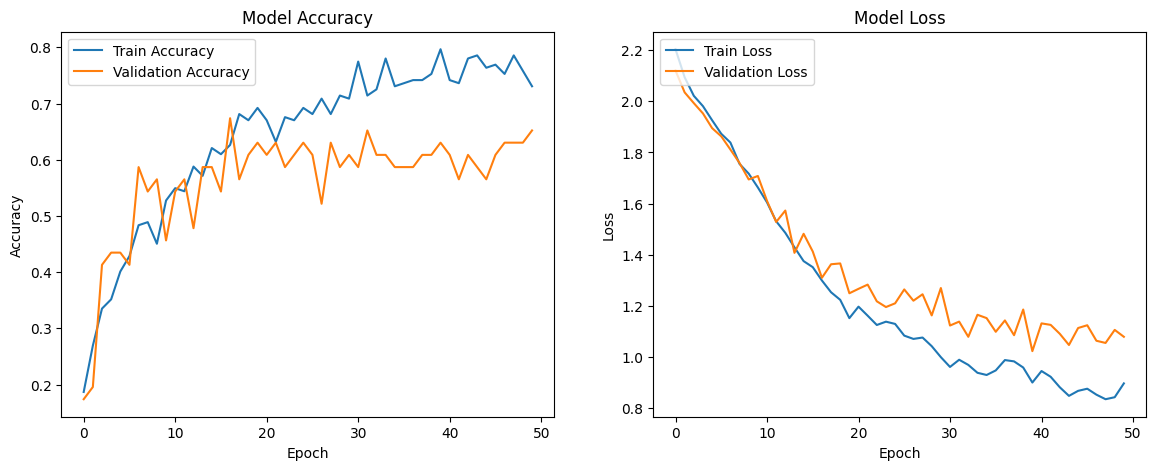

In [50]:
import matplotlib.pyplot as plt

# Retrieve the best hyperparameters
best_params = grid_result.best_params_
print("Best parameters found: ", best_params)

# Create a new model with the best parameters
best_model = create_model(
    neurons=best_params['neurons'],
    dropout_rate=best_params['dropout_rate'],
    regularization_rate=best_params['regularization_rate'],
    hidden_layers=best_params['hidden_layers']
)

# Train the best model
history = best_model.fit(
    X_train, 
    train_target_encoded, 
    epochs=best_params['epochs'], 
    batch_size=best_params['batch_size'],
    validation_split=0.2,  # Use 20% of the data for validation
    verbose=0  # Turn off training log
)

# Plotting the training and validation accuracy
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()
